<a href="https://colab.research.google.com/github/JoaoVictorNH/PucMinasTCC/blob/main/Nootebook_PUC_MINAS_JOAO_VICTOR_HOLANDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LINK PARA ARQUIVOS UTILIZADOS NESTE TRABALHO

---

https://drive.google.com/drive/folders/1GsKlldLWd8kH0PJiljWqgsWLEJI8qa9_?usp=sharing

# IMPORTANDO BIBLIOTECAS E MODELOS

---

## Manipulação e visualização dos dados

In [ ]:
# Manipular vetores
import numpy as np

# Manipular dataframe
import pandas as pd

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Gerar gráficos
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

%matplotlib inline

# Carregar arquivo do drive
from google.colab import drive

# Verificar desvio padrao
from scipy import stats

# Ignorar mensagens de erros
import warnings
warnings.filterwarnings("ignore")

## Bibliotecas de Machine Learning

In [ ]:
# Biblioteca para reducao de dimensionalidade uso do MCA e FAMD
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ALGORITIMOS DE ML para Clusterizacao

# DBSCAN - dados mistos e densos
from sklearn.cluster import DBSCAN

# REDUCAO DE DIMENSIONALIDADE

# Aplicar o FAMD para dados ja convertidos por one hot encoding
from sklearn.decomposition import FactorAnalysis

# MCA - dados categoricos
from prince import MCA

# METRICAS DE AVALIACAO DOS CLUSTERS
from sklearn.metrics import silhouette_score


# IMPORTANDO OS DADOS


---

Permitindo o acesso do Colab aos arquivos do drive

In [ ]:
# Carregar arquivo do drive - Permitir o acesso do Colab ao drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importando o arquivo da base de dados do Cad. Unico

In [ ]:
# Indicar o caminho para o arquivo da base de dados no drive.
# Obs* alterar o caminho para a pasta que você salvou a base de dados no seu drive.
arquivo = '/content/drive/MyDrive/PROJETO INTEGRADO/Notebook_PUC-MINAS_JOAO_VICTOR_HOLANDA/CadUnico2020-ANONIMIZADOS_PUC2023.csv'

#lendo o arquivo csv e salvando na variavel dados
dados = pd.read_csv(arquivo)

#visualizando a base de dados
print('Tamanho da base de dados: ', dados.shape)
dados.head()


Tamanho da base de dados:  (37857, 29)


ID_Familiar Localização Nome_da_localidade  \
0            1    DISTRITO           JAIBARAS   
1            2    DISTRITO           CARACARA   
2            3    DISTRITO           BILHEIRA   
3            4    DISTRITO          TAPERUABA   
4            5    DISTRITO           CARACARA   

   Valor_da_renda_familiar_per_capita faixa_da_renda_familiar_per_capita  \
0                                 133         Entre R$89,01 ate R$178,00   
1                                 665                  Acima de 1/2 S.M.   
2                                 998                  Acima de 1/2 S.M.   
3                                   5                        Até R$89,00   
4                                 500        Entre R$178,01 ate 1/2 S.M.   

   Valor_da_renda_total_da_familia Recebe_PBF_familia Situacao_do_domicilio  \
0                            399.0                Sim                Rurais   
1                           1995.0                Nao                Rurais   
2                           1996.0                Nao                Rurais   
3                             15.0                Sim               Urbanas   
4                           1500.0                Nao                Rurais   

    Especie_do_domicilio  Quantidade_de_comodos_do_domicilio  \
0  Particular Permanente                                 5.0   
1  Particular Permanente                                 4.0   
2  Particular Permanente                                 4.0   
3  Particular Permanente                                 5.0   
4  Particular Permanente                                 6.0   

   Comodo_servindo_como_dormitorio_do_domicilio  \
0                                           2.0   
1                                           2.0   
2                                           1.0   
3                                           2.0   
4                                           2.0   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
1                                    Cimento   
2                  Ceramica, lajota ou pedra   
3                                    Cimento   
4                                    Cimento   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
1                                Taipa nao revestida                  Nao   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                  Alvenaria/tijolo com revestimento                  Sim   

           abastecimento_agua Existencia_de_banheiro  \
0  Rede geral de distribuicao                    Sim   
1                    Cisterna                    Nao   
2  Rede geral de distribuicao                    Sim   
3  Rede geral de distribuicao                    Sim   
4                    Cisterna                    Sim   

        Forma_de_escoamento_sanitario  \
0                    Fossa rudimentar   
1                       Nao informado   
2                    Fossa rudimentar   
3  Rede coletora de esgoto ou pluvial   
4                       Fossa septica   

                             forma_de_coleta_do_lixo  \
0                             E coletado diretamente   
1             E queimado ou enterrado na propriedade   
2                             E coletado diretamente   
3                             E coletado diretamente   
4  E jogado em terreno baldio ou logradouro (rua,...   

             Tipo_de_iluminacao calcamento_em_frente_ao_seu_domicilio  \
0  Eletrica com medidor proprio                            Nao existe   
1  Eletrica com medidor proprio                            Nao existe   
2  Eletrica com medidor proprio                            Nao existe   
3  Eletrica com medidor proprio                                 Total   
4  Eletrica com medidor proprio               

# TRATAMENTO DOS DADOS
---

## Tratamento Geral.

Visualizando as características iniciais dos dados disponíveis e possíveis ausências de informações.

In [ ]:
#Visualizando os tipos de dados, a quantidade e a existência de valores nulos.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37857 entries, 0 to 37856
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID_Familiar                                              37857 non-null  int64  
 1   Localização                                              37857 non-null  object 
 2   Nome_da_localidade                                       37857 non-null  object 
 3   Valor_da_renda_familiar_per_capita                       37857 non-null  int64  
 4   faixa_da_renda_familiar_per_capita                       37857 non-null  object 
 5   Valor_da_renda_total_da_familia                          37856 non-null  float64
 6   Recebe_PBF_familia                                       37857 non-null  object 
 7   Situacao_do_domicilio                                    37857 non-null  object 
 8   Especie_do_domicilio      

In [ ]:
# Verificando a porcentagem de valores vazios por categoria.
dados_faltantes = round(dados.isnull().sum() / len(dados) * 100, 2)

# Ordenando pelo valor de dados ausentes
dados_faltantes.sort_values(ascending=False)

Quantidade_de_comodos_do_domicilio                         0.54
Comodo_servindo_como_dormitorio_do_domicilio               0.54
Quantidade_de_familias_no_domicilio                        0.49
Quantidade_de_pessoas_no_domicilio                         0.49
Existencia_de_banheiro                                     0.01
agua_canalizada                                            0.01
abastecimento_agua                                         0.01
Forma_de_escoamento_sanitario                              0.01
Valor_de_despesas_com_energia                              0.00
forma_de_coleta_do_lixo                                    0.00
Valor_de_despesas_com_agua                                 0.00
Valor_de_despesas_com_gas                                  0.00
Valor_de_despesas_com_alimentacao                          0.00
calcamento_em_frente_ao_seu_domicilio                      0.00
Valor_de_despesas_com_transporte                           0.00
Tipo_de_iluminacao                      

Devido os dados nulos representarem valores inferiores a 1% nas categorias, optei por armazena-los em uma variavel, para atualização posterior, e removelos da base de dados analizadas.                    

In [ ]:
# Verificando a quantidade de dados nulos
dados_faltantes = dados[dados.isnull().any(axis=1)]
dados_faltantes.shape

(211, 29)

In [ ]:
# Retirando as instancias com valores faltantes

sem_dadosnull = dados.dropna().copy()

print(sem_dadosnull.shape)

# Verificando se as instâncias com dados nulos foram eliminados
sem_dadosnull.isnull().sum()

(37646, 29)


ID_Familiar                                                0
Localização                                                0
Nome_da_localidade                                         0
Valor_da_renda_familiar_per_capita                         0
faixa_da_renda_familiar_per_capita                         0
Valor_da_renda_total_da_familia                            0
Recebe_PBF_familia                                         0
Situacao_do_domicilio                                      0
Especie_do_domicilio                                       0
Quantidade_de_comodos_do_domicilio                         0
Comodo_servindo_como_dormitorio_do_domicilio               0
Material_predominante_no_piso_do_domicilio                 0
Material_predominante_nas_paredes_externas_do_domicilio    0
agua_canalizada                                            0
abastecimento_agua                                         0
Existencia_de_banheiro                                     0
Forma_de_escoamento_sani

## Tratamento dos Dados Categoricos

### Removendo inconsitências dos dados categoricos.

Foram identificadas valores fora dos campos de preenchimento correto nos dados categoricos, como pode ser visto logo abaixo:

In [ ]:
sem_dadosnull['Material_predominante_nas_paredes_externas_do_domicilio'].unique()

array(['Alvenaria/tijolo com revestimento', 'Taipa nao revestida',
       'Taipa revestida', 'Alvenaria/tijolo sem revestimento',
       'Outro Material', 'Madeira aparelhada', 'LOCALIDADE', 'ARACATIAÇU',
       'SUMARÉ', 'CAMPO DOS VELHOS', 'Madeira aproveitada'], dtype=object)

Para eliminar essas inconsistências nas caracteristicas categoricas foi criada uma função de limpeza, que basicamente so retorna as instancias com valores esperados:

In [ ]:
def limpeza_cat(dados):
    # Cria um dataframe vazio para armazenar os dados inconsistentes
    dataframe_incons = pd.DataFrame()
    # Define as categorias válidas para cada coluna
    categorias = {
        'Situacao_do_domicilio': ['Urbanas', 'Rurais'],
        'Material_predominante_no_piso_do_domicilio': ['Ceramica, lajota ou pedra',
                                                       'Cimento', 'Terra', 'Madeira aproveitada',
                                                       'Carpete', 'Madeira aparelhada'],
        'Material_predominante_nas_paredes_externas_do_domicilio': ['Alvenaria/tijolo com revestimento',
                                                                    'Alvenaria/tijolo sem revestimento',
                                                                    'Taipa revestida',
                                                                    'Taipa nao revestida',
                                                                    'Madeira aparelhada',],
        'agua_canalizada': ['Sim', 'Nao'],
        'abastecimento_agua': ['Rede geral de distribuicao', 'Cisterna', 'Poco ou nascente'],
        'Existencia_de_banheiro': ['Sim', 'Nao'],
        'Forma_de_escoamento_sanitario': ['Rede coletora de esgoto ou pluvial',
                                          'Fossa rudimentar', 'Fossa septica',
                                          'Vala a ceu aberto', 'Direto para um rio, lago ou mar'],
        'forma_de_coleta_do_lixo': ['E coletado diretamente', 'E coletado indiretamente',
                                    'E queimado ou enterrado na propriedade',
                                    'E jogado em terreno baldio ou logradouro (rua, avenida, etc.)',
                                    'E jogado em rio ou mar'],
        'Tipo_de_iluminacao': ['Eletrica com medidor proprio', 'Eletrica com medidor comunitario',
                               'Eletrica sem medidor', 'Oleo, querosene ou gas', 'Vela'],
        'calcamento_em_frente_ao_seu_domicilio': ['Nao existe', 'Parcial', 'Total']
    }

    # Para cada coluna, identifica os valores únicos e compara com as categorias válidas
    for col in categorias:
        unique_values = set(dados[col].unique())
        wrong_cats = unique_values.difference(categorias[col])
        # Remove categorias não válidas
        dados.loc[dados[col].isin(wrong_cats), col] = np.nan
        # Armazena os dados inconsistentes no dataframe_incons
        dados_inconsistentes = dados[dados[col].isna()].copy()
        dataframe_incons = dataframe_incons.append(dados_inconsistentes)
        # Armazena os dados consistentes no dataframe dados_consistentes
        dados_consistentes = dados[dados[col].notna()].copy()
        dados = dados_consistentes

    # Retorna o dataframe com os dados consistentes e o dataframe com os dados inconsistentes
    return dados_consistentes, dataframe_incons


Vale ressaltar que foram retiradas instancias das categorias que possuiam informações como "nao informado" e "outros", uma vez que não constituem dado relevante para a análise de vulnerabilidades.

In [ ]:
# Armazenamento das familias com consistencias
dados_tratados, dados_inconsistentes = limpeza_cat(sem_dadosnull)
dados_tratados.shape

(34510, 29)

In [ ]:
# Dados categóricos que contém erros no preenchimento
print('Foram encontradas', 37646 - 34510, 'familias inconsistentes')
print('-'*30)
dados_inconsistentes.shape

Foram encontradas 3136 familias inconsistentes
------------------------------


(3136, 29)

In [ ]:
# Juntando os dados inconsistentes com os dados faltantes até o momento para que possam ser revisados ou
# atualizados pela assistência social

dados_revisao = pd.concat([dados_inconsistentes, dados_faltantes], axis=0)
dados_revisao.shape

(3347, 29)

### Criando uma copia dos dados tratados

In [ ]:
dados_tratados_cp = dados_tratados.copy()

Dividindo os dados númericos e categoricos para a verificação de inconsistências, levando em consideração o tipo do dado.

In [ ]:
dados_categoricos = dados_tratados_cp[['Localização', 'Nome_da_localidade',
                  'Recebe_PBF_familia', 'Situacao_do_domicilio',
                  'Especie_do_domicilio', 'Material_predominante_no_piso_do_domicilio',
                  'Material_predominante_nas_paredes_externas_do_domicilio',
                  'agua_canalizada', 'Existencia_de_banheiro', 'Forma_de_escoamento_sanitario',
                  'forma_de_coleta_do_lixo', 'Tipo_de_iluminacao',
                  'calcamento_em_frente_ao_seu_domicilio',
                  'faixa_da_renda_familiar_per_capita']]

dados_categoricos.shape

(34510, 14)

### Análise Inicial

Como ja ocorreu uma limpeza inicial dos dados categoricos, podemos avançar para a análise das caracteristicas relevantes.

In [ ]:
dados_categoricos.describe()

Localização                                 Nome_da_localidade  \
count        34510                                              34510   
unique           2                                                 53   
top           SEDE  CIDADE DOUTOR JOSE EUCLIDES FERREIRA GOMES JUNIOR   
freq         25585                                               4706   

       Recebe_PBF_familia Situacao_do_domicilio   Especie_do_domicilio  \
count               34510                 34510                  34510   
unique                  2                     2                      1   
top                   Nao               Urbanas  Particular Permanente   
freq                21139                 30470                  34510   

       Material_predominante_no_piso_do_domicilio  \
count                                       34510   
unique                                          6   
top                     Ceramica, lajota ou pedra   
freq                                        18529   

       Material_predominante_nas_paredes_externas_do_domicilio  \
count                                               34510        
unique                                                  5        
top                     Alvenaria/tijolo com revestimento        
freq                                                31678        

       agua_canalizada Existencia_de_banheiro  \
count            34510                  34510   
unique               2                      1   
top                Sim                    Sim   
freq             33480                  34510   

             Forma_de_escoamento_sanitario forma_de_coleta_do_lixo  \
count                                34510                   34510   
unique                                   5                       5   
top     Rede coletora de esgoto ou pluvial  E coletado diretamente   
freq                                 27179                   31911   

                  Tipo_de_iluminacao calcamento_em_frente_ao_seu_domicilio  \
count                          34510                                 34510   
unique                             5                                     3   
top     Eletrica com medidor proprio                                 Total   
freq                           34283                                 28190   

       faixa_da_renda_familiar_per_capita  
count                               34510  
unique                                  4  
top                           Até R$89,00  
freq                                12254

Com base nos dados fornecidos no arquivo CSV, podemos extrair algumas informações:

1. Quantidade total de registros: 34.510

2. Localização:
   - Existem duas categorias de localização presentes nos dados.
   - O valor "SEDE" é o mais frequente na coluna "Localização", ocorrendo 25.585 vezes. Demontrando que a maior parte das familias presentes na base se encontram na cidade.
   - A localidade mais frequente é o bairro "CIDADE DOUTOR JOSE EUCLIDES FERREIRA GOMES JUNIOR", com 4.706 ocorrências.

3. Recebe_PBF_familia:
   - Existem duas categorias nessa coluna: "Sim" e "Não".
   - A maioria das famílias (21.139) não recebe o Programa Bolsa Família (PBF).

4. Situação do domicílio:
   - Existem duas categorias: "Urbanas" e "Rurais".
   - A maioria dos domicílios (30.470) está em áreas urbanas.

5. Espécie do domicílio:
   - Existe apenas uma categoria nessa coluna, indicando que todos os domicílios são "Particular Permanente".

6. Material predominante no piso do domicílio:
   - Existem seis categorias diferentes de materiais predominantes no piso.
   - O material mais frequente é "Cerâmica, lajota ou pedra", com 18.529 ocorrências.

7. Material predominante nas paredes externas do domicílio:
   - Existem cinco categorias diferentes de materiais predominantes nas paredes externas.
   - A opção mais comum é "Alvenaria/tijolo com revestimento", presente em 31.678 domicílios.

8. Abastecimento de água:
   - A maioria dos domicílios (33.480) possui abastecimento de água canalizada.

9. Existência de banheiro:
   - Todos os domicílios (34.510) possuem banheiro.

10. Forma de escoamento sanitário:
    - A maioria dos domicílios (27.179) possui rede coletora de esgoto ou pluvial.

11. Forma de coleta do lixo:
    - A forma mais comum de coleta de lixo é "É coletado diretamente", presente em 31.911 domicílios.

12. Tipo de iluminação:
    - A opção mais frequente é "Elétrica com medidor próprio", ocorrendo em 34.283 domicílios.

13. Calçamento em frente ao domicílio:
    - Todos os domicílios (34.510) possuem algum tipo de calçamento em frente.

14. Faixa da renda familiar per capita:
    - Existem quatro categorias diferentes de faixas de renda familiar per capita.
    - A faixa mais comum é "Até R$89,00", com 12.254 ocorrências.

É importante analisar mais a fundo os dados e considerar o contexto específico para uma interpretação mais precisa e completa.

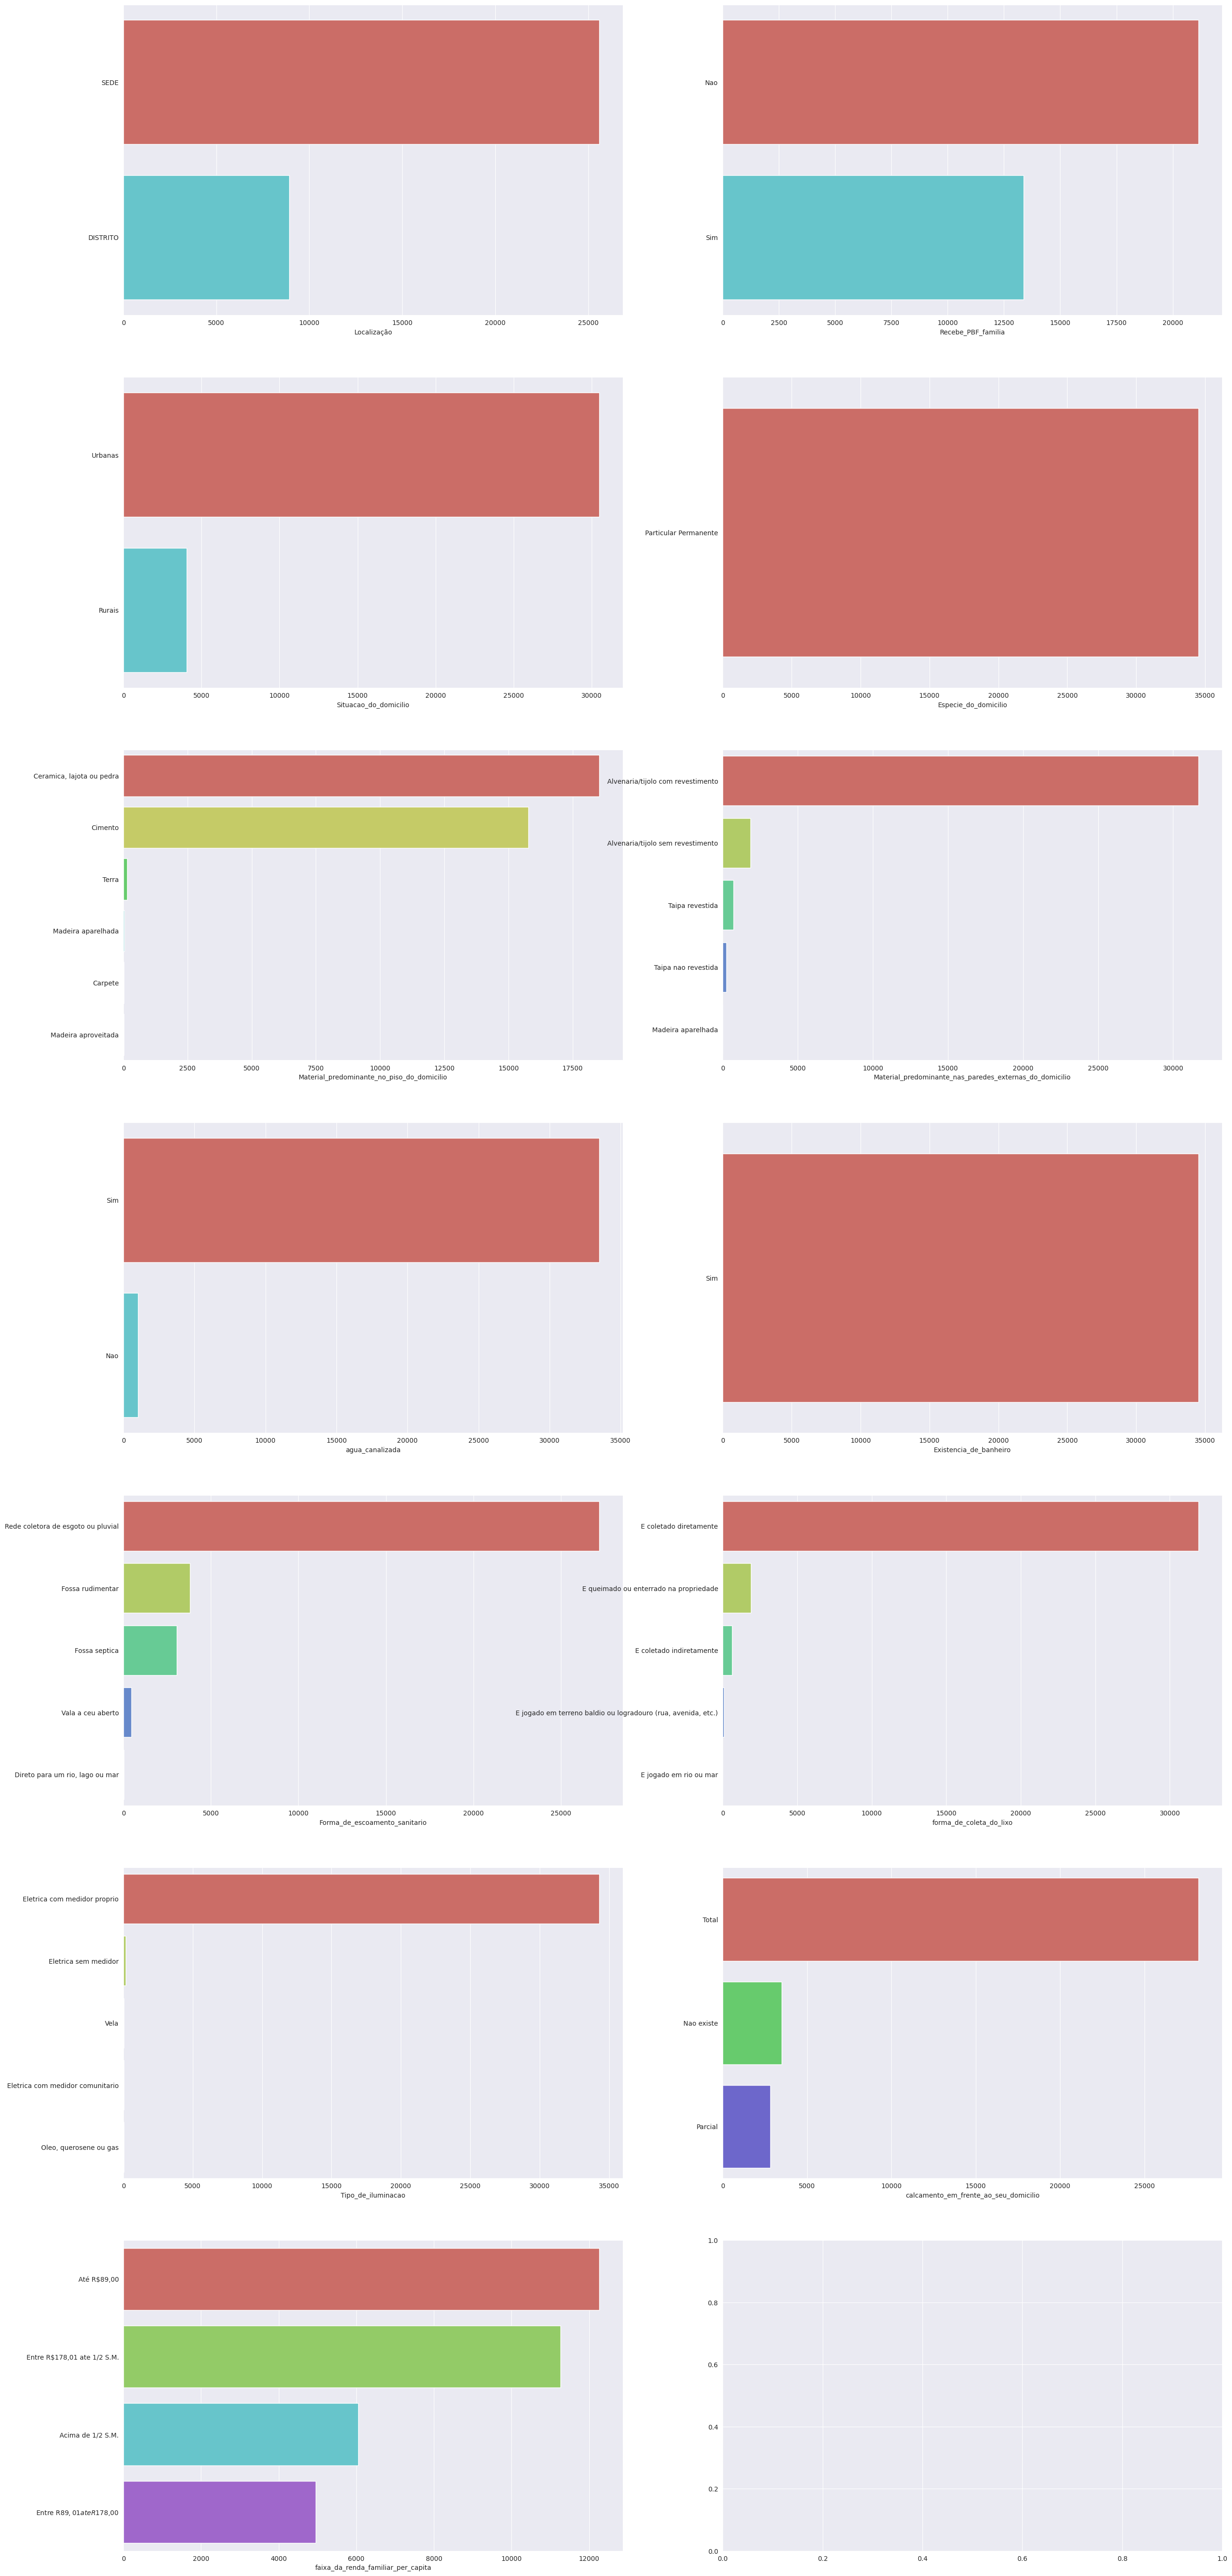

In [ ]:
# Criando a figura com um grid de 7 linhas por 2 colunas
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(30, 70))

# Colocando cada coluna da base numerica em uma respectiva posição no grid
coluna = 0
for i in range(0, 7):
  for j in range(0, 2):
    if coluna >= len(dados_categoricos.columns):
        break
    k = dados_categoricos.columns[coluna]

    if k != 'Nome_da_localidade':
      sns.barplot(y = dados_categoricos[k].value_counts().index, x = dados_categoricos[k].value_counts(),
                  palette='hls', ax=axs[i,j])
      coluna = coluna + 1

    else:
      coluna = coluna + 1
      k = dados_categoricos.columns[coluna]
      sns.barplot(y = dados_categoricos[k].value_counts().index, x = dados_categoricos[k].value_counts(),
                  palette='hls', ax=axs[i,j])
      coluna = coluna + 1

# Plotando o Histograma das variaveis numéricas
plt.show()


Verificando as localidades com maior número de inscritos do cadastro único.

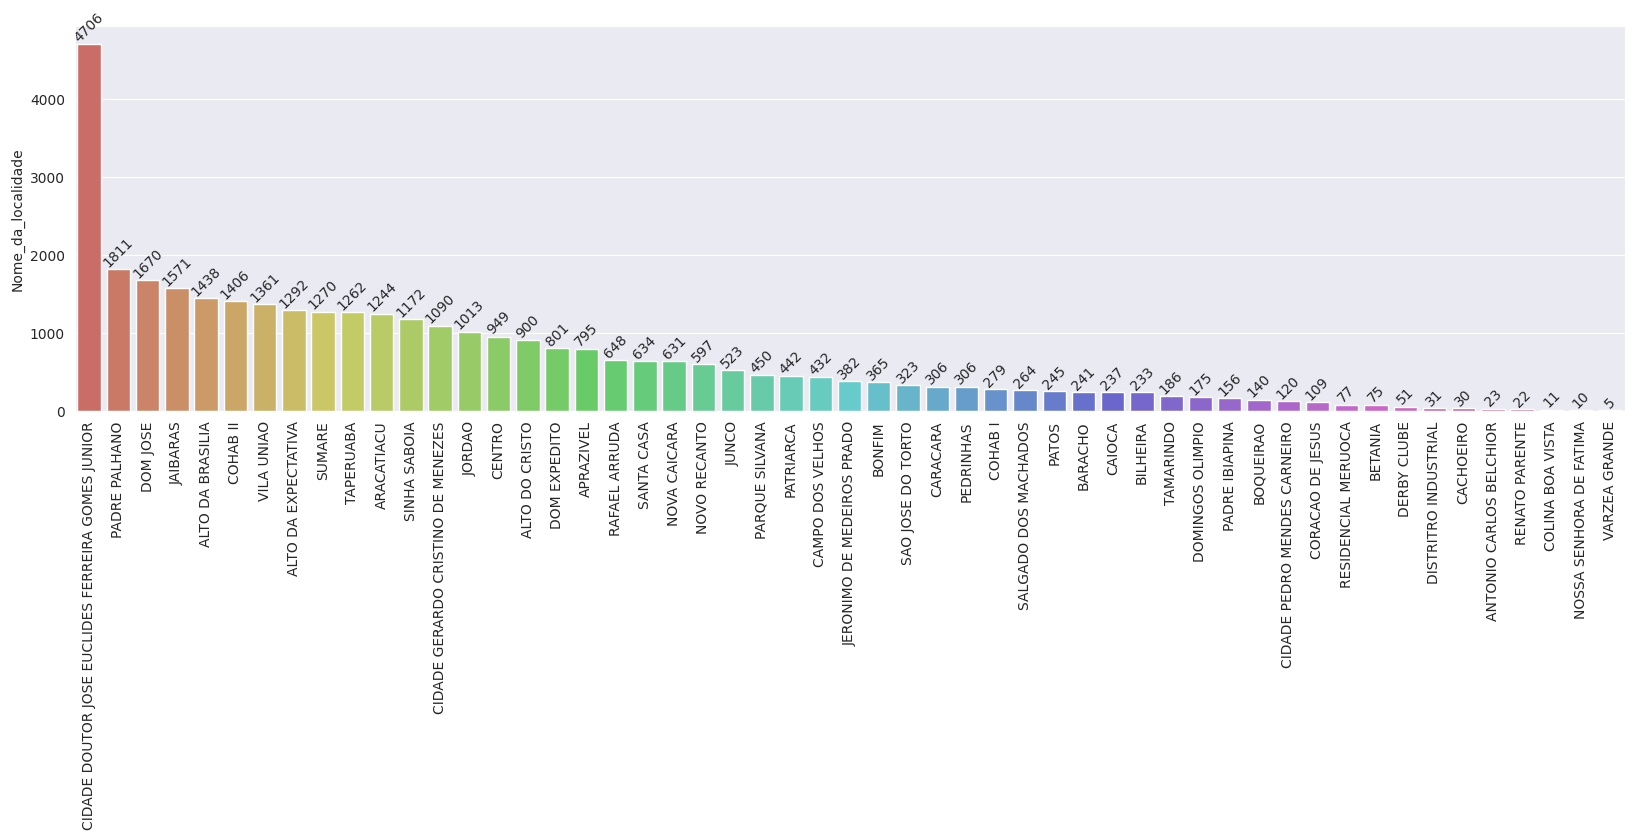

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x = dados_tratados_cp['Nome_da_localidade'].value_counts().index,
                 y = dados_tratados_cp['Nome_da_localidade'].value_counts(), palette='hls')
plt.xticks(fontsize=10, rotation=90)

# Adicionando os rótulos numéricos das colunas
for i in range(len(dados_tratados_cp['Nome_da_localidade'].value_counts())):
    ax.annotate(dados_tratados_cp['Nome_da_localidade'].value_counts()[i],
                xy=(i, dados_tratados_cp['Nome_da_localidade'].value_counts()[i]),
                ha='center', va='bottom', fontsize=10, rotation=45)

plt.show()



Verificando as 10 localidades com maiores quantidades de familias com renda per capita de Até R$89,00.

In [ ]:
# Filtrar os dados pela faixa de renda "Até R$89,00"
dados_faixa_renda = dados_tratados_cp[dados_tratados_cp['faixa_da_renda_familiar_per_capita'] == 'Até R$89,00']

# Contar a frequência de cada faixa de renda por localidade
pivot_renda_localidade = dados_faixa_renda.groupby(['Nome_da_localidade']).size().sort_values(ascending=False)

# Imprimir as localidades com maiores quantidades de pessoas na faixa de renda "Até R$89,00"
print(pivot_renda_localidade.head(10))


Nome_da_localidade
CIDADE DOUTOR JOSE EUCLIDES FERREIRA GOMES JUNIOR    2111
PADRE PALHANO                                         685
JAIBARAS                                              613
VILA UNIAO                                            535
ARACATIACU                                            530
DOM JOSE                                              515
TAPERUABA                                             502
CIDADE GERARDO CRISTINO DE MENEZES                    468
COHAB II                                              431
SUMARE                                                430
dtype: int64


### Removendo caracteristicas desnecessarias dos dados categoricos para o treinamento de ML.

Inicialmente para a definição das vulnerabilidades sociais, serão ignoradas alguns fatores como a localização, situação do domicilio e o nome da localizade, tendo em vista que poderá ocorrer uma análise mais aprofundada destes items, posterior aos agrupamentos com os algoritimos de clusterização.

Para além disso, também serão removidas as caracteristicas de especie do domicilio e a existencia de banheiro, uma vez que estas caracteristicas possuem apenas um item de composição.

In [ ]:
# Removendo as características que não serão mais utilizadas
dados_tratados_cp.drop(['Especie_do_domicilio', 'Existencia_de_banheiro'], axis=1, inplace=True)


## Tratamento dos Dados Númericos.

Dividindo os dados númericos e categoricos para a verificação de inconsistências, levando em consideração o tipo do dado.

In [ ]:
# Criando variaveis conforme os tipos de dados encontrados

dados_numericos = dados_tratados_cp[['Valor_da_renda_total_da_familia',
                                  'Valor_da_renda_familiar_per_capita',
                                  'Quantidade_de_comodos_do_domicilio',
                                  'Comodo_servindo_como_dormitorio_do_domicilio',
                                  'Quantidade_de_pessoas_no_domicilio',
                                  'Quantidade_de_familias_no_domicilio',
                                  'Valor_de_despesas_com_energia',
                                  'Valor_de_despesas_com_agua', 'Valor_de_despesas_com_gas',
                                  'Valor_de_despesas_com_alimentacao', 'Valor_de_despesas_com_transporte',
                                  'Valor_de_despesas_com_aluguel', 'Valor_de_despesas_com_medicamentos']]

Verificando as distribuições dos dados por caracteristica.

In [ ]:
# Verificando informações númericas das categorias
dados_numericos.describe().round(2)

Valor_da_renda_total_da_familia  Valor_da_renda_familiar_per_capita  \
count                         34510.00                            34510.00   
mean                            766.38                              303.65   
std                             725.32                              315.56   
min                               0.00                                0.00   
25%                             198.00                               70.00   
50%                             540.00                              180.00   
75%                             998.00                              468.00   
max                           10150.00                             4998.00   

       Quantidade_de_comodos_do_domicilio  \
count                            34510.00   
mean                                 4.80   
std                                  1.28   
min                                  0.00   
25%                                  4.00   
50%                                  5.00   
75%                                  5.00   
max                                 52.00   

       Comodo_servindo_como_dormitorio_do_domicilio  \
count                                      34510.00   
mean                                           1.71   
std                                            0.84   
min                                            0.00   
25%                                            1.00   
50%                                            2.00   
75%                                            2.00   
max                                           51.00   

       Quantidade_de_pessoas_no_domicilio  \
count                            34510.00   
mean                                 3.08   
std                                  1.40   
min                                  0.00   
25%                                  2.00   
50%                                  3.00   
75%                                  4.00   
max                                 21.00   

       Quantidade_de_familias_no_domicilio  Valor_de_despesas_com_energia  \
count                             34510.00                       34510.00   
mean                                  1.01                          81.46   
std                                   0.13                         289.36   
min                                   0.00                           0.00   
25%                                   1.00                          47.00   
50%                                   1.00                          68.00   
75%                                   1.00                         100.00   
max                                  11.00                       50112.00   

       Valor_de_despesas_com_agua  Valor_de_despesas_com_gas  \
count                    34510.00                   34510.00   
mean                        34.19                      48.88   
std                         53.82                      38.74   
min                          0.00                       0.00   
25%                         20.00                      30.00   
50%                         30.00                      58.00   
75%                         40.00                      70.00   
max                       8090.00                    5235.00   

       Valor_de_despesas_com_alimentacao  Valor_de_despesas_com_transporte  \
count                           34510.00                          34510.00   
mean                              284.76                             19.05   
std                               211.49                             53.95   
min                                 0.00                              0.00   
25%                               120.00                              0.00   
50%                               240.00                              0.00   
75%                               400.00                              0.00   
max                              3660.00                           2000.00   

       Valor_de_despes

Criando um gráfico de dispersão para analisar as relações entre as informações

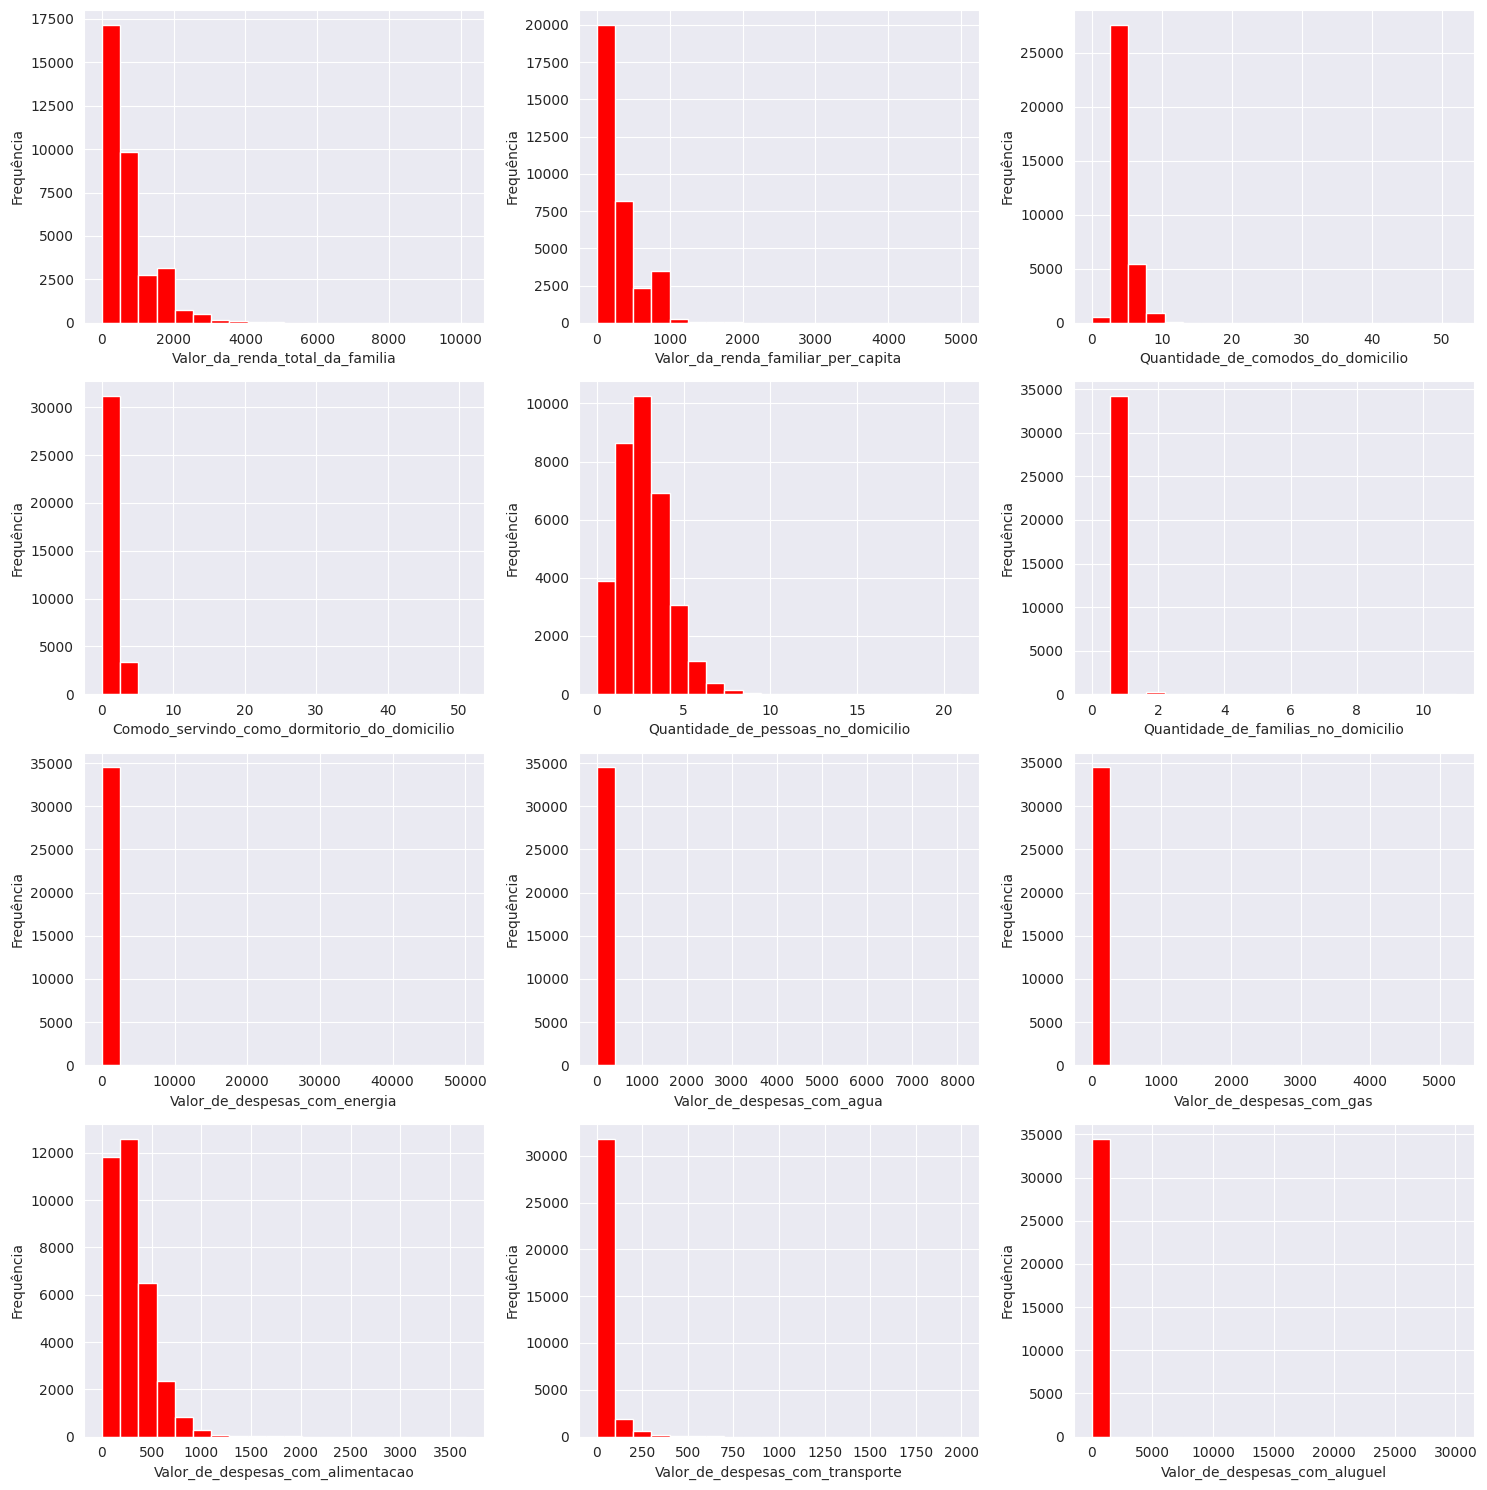

In [ ]:
# Criando a figura com um grid de 3 linhas por 4 colunas
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Colocando cada coluna da base numerica em uma respectiva posição no grid
coluna = 0
for i in range(0, 4):
  for j in range(0, 3):
    if coluna >= len(dados_numericos.columns):
      break
    k = dados_numericos.columns[coluna]
    axs[i, j].hist(dados_numericos[k], bins=20, color='red')
    axs[i, j].set_xlabel(k)
    axs[i, j].set_ylabel('Frequência')
    coluna = coluna + 1

# Ajustando o layout da figura
plt.tight_layout()

# Mostrando o histograma das variáveis numéricas
plt.show()


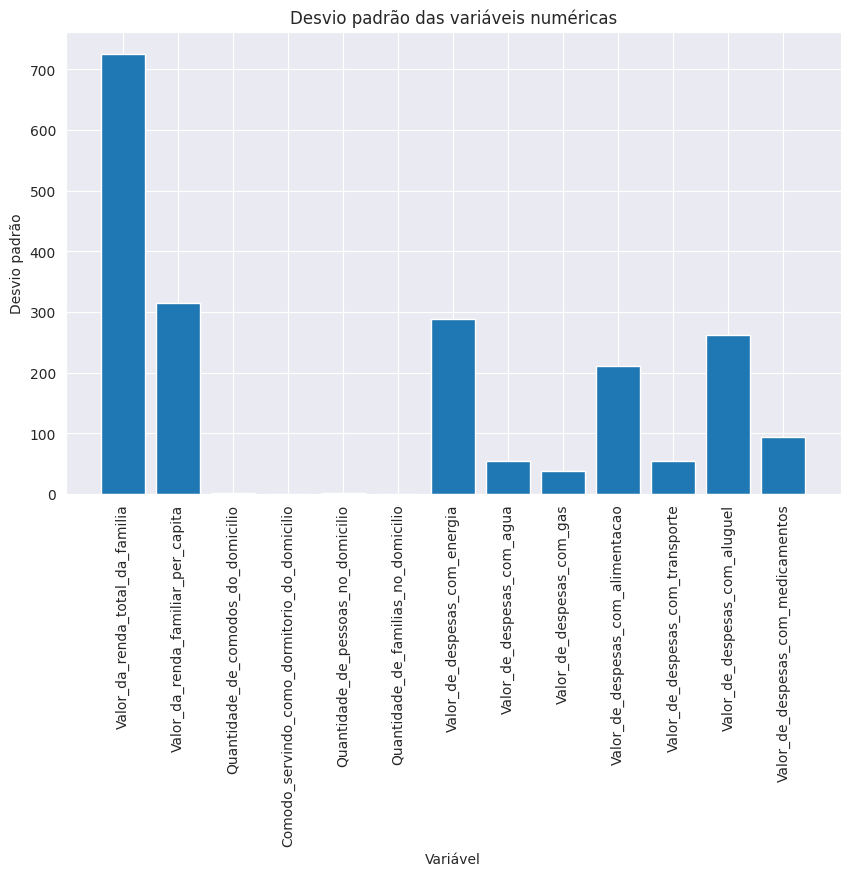

In [ ]:
# Calculando o desvio padrão de cada variável
stds = dados_numericos.std()

# Criando o gráfico de barras verticais
plt.figure(figsize=(10,6))
plt.bar(stds.index, stds.values)
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Desvio padrão')
plt.title('Desvio padrão das variáveis numéricas')
plt.show()


In [ ]:
# Visualizar a quantidade de instancias fora do desvio padrao e verificar se
# são condições reais ou se possuem inconcistencias

destoantes = dados_numericos[
    (np.abs(stats.zscore(dados_numericos)) > 3).any(axis=1)
]

print(destoantes.shape)
destoantes.head()

(2876, 13)


Valor_da_renda_total_da_familia  Valor_da_renda_familiar_per_capita  \
24                           2168.0                                 542   
34                            100.0                                  20   
35                            220.0                                  44   
39                           2860.0                                 572   
58                           1014.0                                 338   

    Quantidade_de_comodos_do_domicilio  \
24                                10.0   
34                                10.0   
35                                10.0   
39                                 5.0   
58                                 9.0   

    Comodo_servindo_como_dormitorio_do_domicilio  \
24                                           2.0   
34                                           3.0   
35                                           4.0   
39                                           3.0   
58                                           2.0   

    Quantidade_de_pessoas_no_domicilio  Quantidade_de_familias_no_domicilio  \
24                                 4.0                                  1.0   
34                                 4.0                                  1.0   
35                                 5.0                                  1.0   
39                                 5.0                                  1.0   
58                                 2.0                                  1.0   

    Valor_de_despesas_com_energia  Valor_de_despesas_com_agua  \
24                             60                           4   
34                             60                           0   
35                              0                           0   
39                             86                          18   
58                            150                          25   

    Valor_de_despesas_com_gas  Valor_de_despesas_com_alimentacao  \
24                         35                                400   
34                          0                                200   
35                         25                                300   
39                         72                               1800   
58                          0                                560   

    Valor_de_despesas_com_transporte  Valor_de_despesas_com_aluguel  \
24                                50                              0   
34                                 0                              0   
35                                 0                              0   
39                                 0                              0   
58                                 0                              0   

    Valor_de_despesas_com_medicamentos  
24                                   0  
34                                   0  
35                                   0  
39                                 150  
58                                   0

### Investingando as possiveis inconsistencias

O código abaixo verifica se existem instâncias na variável "dados_tratados_cp" em que o valor da coluna "Comodo_servindo_como_dormitorio_do_domicilio" é maior do que o valor da coluna "Quantidade_de_comodos_do_domicilio". Essa verificação é importante, pois é inviável que uma casa tenha mais quartos do que cômodos.

In [ ]:
dados_num_inconsistentes1 = dados_tratados_cp[dados_tratados_cp['Comodo_servindo_como_dormitorio_do_domicilio'] > dados_tratados_cp['Quantidade_de_comodos_do_domicilio']]
dados_num_inconsistentes1.shape


(26, 27)

In [ ]:
# Cria o dataframe de dados inconsistentes
dados_num_inconsistentes = pd.DataFrame()

# Armazena os dados inconsistentes
dados_num_inconsistentes = pd.concat([dados_num_inconsistentes1], axis=0)

# Remove os dados inconsistentes da base de dados tratados
dados_tratados_cp = dados_tratados_cp.drop(dados_num_inconsistentes1.index)

print(dados_num_inconsistentes.shape)
print('-' * 50)
print(dados_tratados_cp.shape)

(26, 27)
--------------------------------------------------
(34484, 27)


O código abaixo verifica se existem instâncias na variável "dados_tratados_cp" em que o valor da coluna "Quantidade_de_familias_no_domicilio" é maior do que o valor da coluna "Quantidade_de_pessoas_no_domicilio". Essa verificação é importante, pois é inviável que uma casa tenha mais familias do que pessoas.

In [ ]:
dados_num_inconsistentes2 = dados_tratados_cp[dados_tratados_cp['Quantidade_de_familias_no_domicilio'] > dados_tratados_cp['Quantidade_de_pessoas_no_domicilio']]
dados_num_inconsistentes2.shape

(42, 27)

In [ ]:
# Armazena os dados inconsistentes
dados_num_inconsistentes = pd.concat([dados_num_inconsistentes, dados_num_inconsistentes2], axis=0)

# Remove os dados inconsistentes da base de dados tratados
dados_tratados_cp = dados_tratados_cp.drop(dados_num_inconsistentes2.index)

print(dados_num_inconsistentes.shape)
print('-' * 50)
print(dados_tratados_cp.shape)

(68, 27)
--------------------------------------------------
(34442, 27)


In [ ]:
dados_num_inconsistentes3 = dados_tratados_cp[dados_tratados_cp['Quantidade_de_comodos_do_domicilio'] > 12]
print(dados_num_inconsistentes3['Quantidade_de_comodos_do_domicilio'].shape)
dados_num_inconsistentes3['Quantidade_de_comodos_do_domicilio'].unique

(10,)


<bound method Series.unique of 17608    40.0
21319    14.0
21541    13.0
24309    52.0
25495    45.0
27621    41.0
28733    50.0
33183    13.0
36339    13.0
37100    16.0
Name: Quantidade_de_comodos_do_domicilio, dtype: float64>

In [ ]:
dados_num_inconsistentes3.head()

ID_Familiar Localização  \
17608        17609        SEDE   
21319        21320    DISTRITO   
21541        21542        SEDE   
24309        24310        SEDE   
25495        25496    DISTRITO   

                                      Nome_da_localidade  \
17608                                      PADRE PALHANO   
21319                                           JAIBARAS   
21541                 CIDADE GERARDO CRISTINO DE MENEZES   
24309  CIDADE DOUTOR JOSE EUCLIDES FERREIRA GOMES JUNIOR   
25495                                           JAIBARAS   

       Valor_da_renda_familiar_per_capita faixa_da_renda_familiar_per_capita  \
17608                                 100         Entre R$89,01 ate R$178,00   
21319                                 650                  Acima de 1/2 S.M.   
21541                                 750                  Acima de 1/2 S.M.   
24309                                 440        Entre R$178,01 ate 1/2 S.M.   
25495                                   4                        Até R$89,00   

       Valor_da_renda_total_da_familia Recebe_PBF_familia  \
17608                            300.0                Sim   
21319                           2600.0                Nao   
21541                           4500.0                Nao   
24309                            880.0                Nao   
25495                             12.0                Sim   

      Situacao_do_domicilio  Quantidade_de_comodos_do_domicilio  \
17608               Urbanas                                40.0   
21319               Urbanas                                14.0   
21541               Urbanas                                13.0   
24309               Urbanas                                52.0   
25495                Rurais                                45.0   

       Comodo_servindo_como_dormitorio_do_domicilio  \
17608                                           1.0   
21319                                           3.0   
21541                                           2.0   
24309                                          51.0   
25495                                           1.0   

      Material_predominante_no_piso_do_domicilio  \
17608                  Ceramica, lajota ou pedra   
21319                                    Cimento   
21541                  Ceramica, lajota ou pedra   
24309                  Ceramica, lajota ou pedra   
25495                                    Cimento   

      Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
17608                  Alvenaria/tijolo com revestimento                  Sim   
21319                  Alvenaria/tijolo com revestimento                  Sim   
21541                  Alvenaria/tijolo com revestimento                  Sim   
24309                  Alvenaria/tijolo com revestimento                  Sim   
25495                  Alvenaria/tijolo com revestimento                  Sim   

               abastecimento_agua       Forma_de_escoamento_sanitario  \
17608  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
21319  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
21541  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
24309  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
25495  Rede geral de distribuicao                   Vala a ceu aberto   

      forma_de_coleta_do_lixo            Tipo_de_iluminacao  \
17608  E coletado diretamente  Eletrica com medidor proprio   
21319  E coletado diretamente  Eletrica com medidor proprio   
21541  E coletado diretamente  Eletrica com medidor proprio   
24309  E coletado diretamente  Eletrica com medidor proprio   
25495  E coletado diretamente  Eletrica com medidor proprio   

      calcamento_em_frente_ao_seu_domicilio  \
17608                                 Total   
21319                                 Total   
21541                                 Total   
24309                                 Total   
25495 

É possivel observar que existem familias que possuem uma residencia com a quantidade de comodos superiores a 40, que existiam apenas 2 pessoas e uma familia residindo, esses dados representam erros e serão retiradoos da base de dados_tratados_cp.

In [ ]:
# Armazena os dados inconsistentes
dados_num_inconsistentes = pd.concat([dados_num_inconsistentes, dados_num_inconsistentes3], axis=0)

# Remove os dados inconsistentes da base de dados tratados
dados_tratados_cp = dados_tratados_cp.drop(dados_num_inconsistentes3.index)

print(dados_num_inconsistentes.shape)
print('-' * 50)
print(dados_tratados_cp.shape)

(78, 27)
--------------------------------------------------
(34432, 27)


In [ ]:
dados_num_inconsistentes4 = dados_tratados_cp[dados_tratados_cp['Quantidade_de_pessoas_no_domicilio'] > 12]
print(dados_num_inconsistentes4.shape)
dados_num_inconsistentes4.head(6)

(3, 27)


ID_Familiar Localização  \
327            328        SEDE   
11342        11343    DISTRITO   
20494        20495        SEDE   

                                      Nome_da_localidade  \
327                                     ALTO DA BRASILIA   
11342                                           JAIBARAS   
20494  CIDADE DOUTOR JOSE EUCLIDES FERREIRA GOMES JUNIOR   

       Valor_da_renda_familiar_per_capita faixa_da_renda_familiar_per_capita  \
327                                    58                        Até R$89,00   
11342                                 234        Entre R$178,01 ate 1/2 S.M.   
20494                                  50                        Até R$89,00   

       Valor_da_renda_total_da_familia Recebe_PBF_familia  \
327                              696.0                Sim   
11342                            468.0                Nao   
20494                            200.0                Sim   

      Situacao_do_domicilio  Quantidade_de_comodos_do_domicilio  \
327                 Urbanas                                 5.0   
11342               Urbanas                                 4.0   
20494               Urbanas                                10.0   

       Comodo_servindo_como_dormitorio_do_domicilio  \
327                                             3.0   
11342                                           1.0   
20494                                           2.0   

      Material_predominante_no_piso_do_domicilio  \
327                                      Cimento   
11342                                    Cimento   
20494                                    Cimento   

      Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
327                    Alvenaria/tijolo com revestimento                  Sim   
11342                  Alvenaria/tijolo com revestimento                  Sim   
20494                  Alvenaria/tijolo com revestimento                  Sim   

               abastecimento_agua       Forma_de_escoamento_sanitario  \
327    Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
11342  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
20494  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   

      forma_de_coleta_do_lixo            Tipo_de_iluminacao  \
327    E coletado diretamente  Eletrica com medidor proprio   
11342  E coletado diretamente  Eletrica com medidor proprio   
20494  E coletado diretamente  Eletrica com medidor proprio   

      calcamento_em_frente_ao_seu_domicilio  \
327                                   Total   
11342                                 Total   
20494                                 Total   

       Quantidade_de_pessoas_no_domicilio  \
327                                  13.0   
11342                                21.0   
20494                                14.0   

       Quantidade_de_familias_no_domicilio  Valor_de_despesas_com_energia  \
327                                    1.0                            200   
11342                                  1.0                             50   
20494                                  2.0                              0   

       Valor_de_despesas_com_agua  Valor_de_despesas_com_gas  \
327                            89                         69   
11342                          25                         55   
20494                           0                         30   

       Valor_de_despesas_com_alimentacao  Valor_de_despesas_com_transporte  \
327                                  300                                 0   
11342                                250                                 0   
20494                                300                                 0   

       Valor_de_despesas_com_aluguel  Valor_de_despesas_com_medicamentos  
327                                0                                   0  
11342                              0                                   0  
20494              

In [ ]:
# Armazena os dados inconsistentes
dados_num_inconsistentes = pd.concat([dados_num_inconsistentes, dados_num_inconsistentes4], axis=0)

# Remove os dados inconsistentes da base de dados tratados
dados_tratados = dados_tratados.drop(dados_num_inconsistentes4.index)

print(dados_num_inconsistentes.shape)
print('-' * 50)
print(dados_tratados.shape)

(81, 27)
--------------------------------------------------
(34507, 29)


Tendo em vista a renda, a quantidade de comodos e a quantidade de dormitorios é muito provavel que essa instancia represente uma inconsistencia de informação

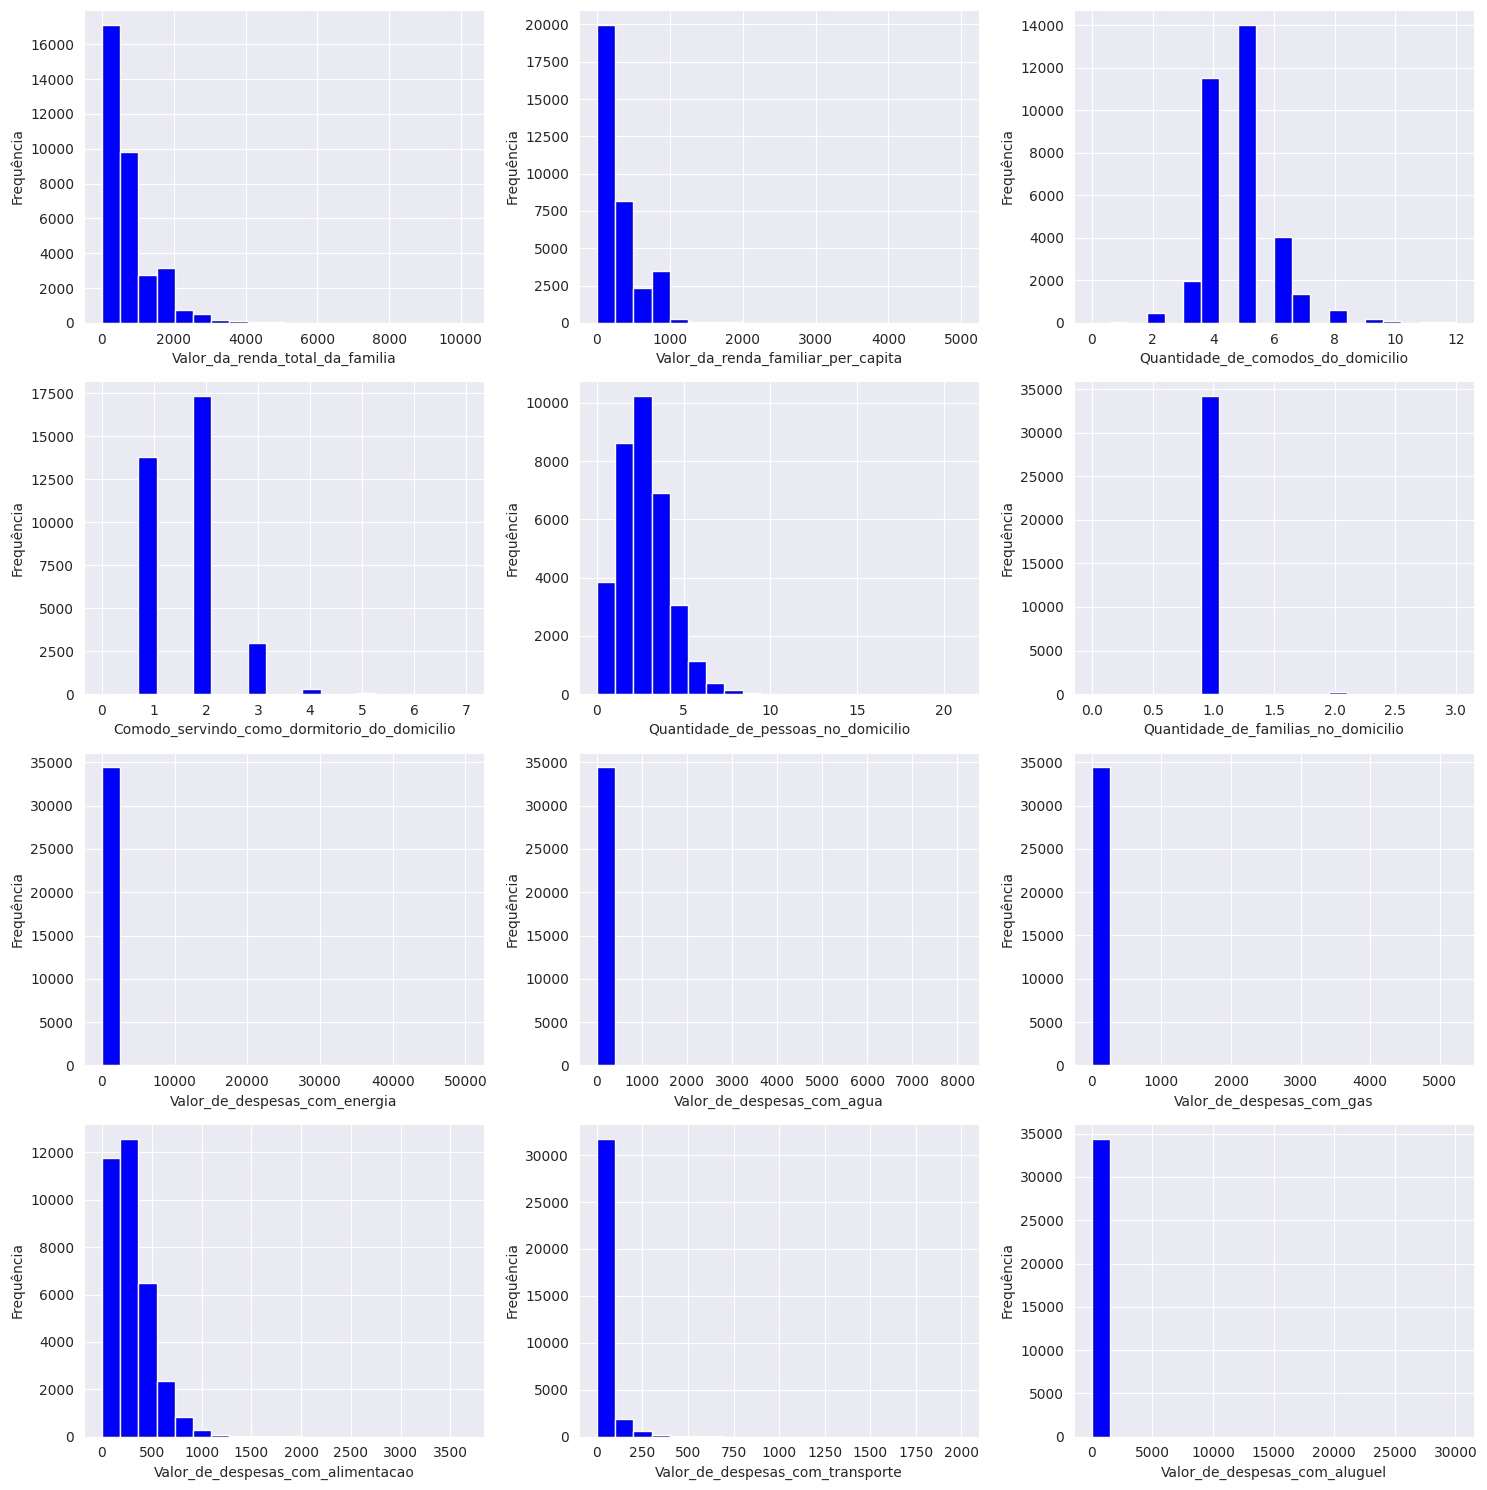

In [ ]:
dados_numericos = dados_tratados_cp[['Valor_da_renda_total_da_familia',
                                  'Valor_da_renda_familiar_per_capita',
                                  'Quantidade_de_comodos_do_domicilio',
                                  'Comodo_servindo_como_dormitorio_do_domicilio',
                                  'Quantidade_de_pessoas_no_domicilio',
                                  'Quantidade_de_familias_no_domicilio',
                                  'Valor_de_despesas_com_energia',
                                  'Valor_de_despesas_com_agua', 'Valor_de_despesas_com_gas',
                                  'Valor_de_despesas_com_alimentacao', 'Valor_de_despesas_com_transporte',
                                  'Valor_de_despesas_com_aluguel', 'Valor_de_despesas_com_medicamentos']]


# Criando a figura com um grid de 3 linhas por 4 colunas
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

# Colocando cada coluna da base numerica em uma respectiva posição no grid
coluna = 0
for i in range(0, 4):
    for j in range(0, 3):
        if coluna >= len(dados_numericos.columns):
            break
        k = dados_numericos.columns[coluna]
        axs[i, j].hist(dados_numericos[k], bins=20, color='blue')
        axs[i, j].set_xlabel(k)
        axs[i, j].set_ylabel('Frequência')
        coluna = coluna + 1

# Ajustando o layout da figura
plt.tight_layout()

# Mostrando o histograma das variáveis numéricas
plt.show()


### Transformações e Escolhendo das melhores caracteristicas para representar o problema

Para uma nova característica, seguindo a metodologia do IBGE, que considera que uma família está em situação de "ônus excessivo com aluguel" quando gasta mais de 30% de sua renda total com o pagamento do aluguel.

In [ ]:
dados_tratados_cp['Ônus excessivo com aluguel'] = dados_tratados_cp['Valor_de_despesas_com_aluguel'] > 0.3*dados_tratados_cp['Valor_da_renda_total_da_familia']


In [ ]:
dados_tratados_cp['Ônus excessivo com aluguel'].isna().any()

False

A metodologia do IBGE para a relação entre a quantidade de pessoas na família e a quantidade de cômodos servindo como dormitório é chamada de "adensamento habitacional".

De acordo com o IBGE, considera-se que há adensamento habitacional quando a relação entre o número de moradores e o número de cômodos utilizados como dormitório é maior do que 3. Ou seja, se houver mais de três pessoas por cômodo utilizado como dormitório, há Adensamento excessivo de moradores.

In [ ]:
dados_tratados_cp['adensamento_habitacional'] = (dados_tratados_cp['Quantidade_de_pessoas_no_domicilio'] / dados_tratados_cp['Comodo_servindo_como_dormitorio_do_domicilio']) > 3

É possivel observar que o principal gasto das familias de baixa renda se da com a alimentação.

In [ ]:
despesas_baixa_renda = dados_tratados_cp[dados_tratados_cp['Valor_da_renda_total_da_familia'] < 1200][['Valor_de_despesas_com_energia',                                                                                                      'Valor_de_despesas_com_agua',                                                                                                      'Valor_de_despesas_com_gas',                                                                                                      'Valor_de_despesas_com_alimentacao',                                                                                                      'Valor_de_despesas_com_transporte',                                                                                                      'Valor_de_despesas_com_aluguel',                                                                                                      'Valor_de_despesas_com_medicamentos']]
media_despesas_baixa_renda = despesas_baixa_renda.mean()
media_despesas_baixa_renda

Valor_de_despesas_com_energia          75.121224
Valor_de_despesas_com_agua             32.003639
Valor_de_despesas_com_gas              46.119104
Valor_de_despesas_com_alimentacao     238.562308
Valor_de_despesas_com_transporte       11.682754
Valor_de_despesas_com_aluguel          63.771014
Valor_de_despesas_com_medicamentos     19.085927
dtype: float64

criar uma nova categoria que meça o comprometimento da renda total familiar em relação aos gastos das despesas é utilizar a razão entre a soma das despesas (exceto o gasto com aluguel) e a renda total da família. Essa razão representa a porcentagem da renda total familiar que é comprometida com as despesas mensais, excluindo o aluguel.

Essa nova coluna "Comprometimento_renda_despesas" representa a porcentagem da renda total familiar que é comprometida com as despesas mensais (exceto aluguel), permitindo analisar o nível de vulnerabilidade financeira da família.

A retirada do aluguel como variável na medida de comprometimento da renda total familiar em relação aos gastos das despesas se justifica pelo fato de que, como mencionado anteriormente, o gasto com aluguel já está sendo considerado na nova característica criada para verificar se o gasto com o aluguel é superior a 30% da renda total familiar.

In [ ]:
# Criar nova coluna "Comprometimento_renda_despesas"
dados_tratados_cp['Comprometimento_renda_despesas'] = 0

# Calcular a soma das despesas excluindo o gasto com aluguel
despesas = dados_tratados_cp[['Valor_de_despesas_com_energia', 'Valor_de_despesas_com_agua', 'Valor_de_despesas_com_gas',
                          'Valor_de_despesas_com_alimentacao', 'Valor_de_despesas_com_transporte', 'Valor_de_despesas_com_medicamentos']].sum(axis=1)

# Substituir as rendas iguais a 0 por 1 para evitar valores infinitos
renda_total = dados_tratados_cp['Valor_da_renda_total_da_familia'].replace(0, 1)

# Calcular a razão entre as despesas e a renda total da família
razao = despesas / renda_total

# Armazenar a razão calculada na nova coluna "Comprometimento_renda_despesas"
dados_tratados_cp['Comprometimento_renda_despesas'] = razao


Quanto maior o valor na coluna "Comprometimento_renda_despesas", maior é a proporção das despesas em relação à renda total da família. Isso indica um maior comprometimento da renda da família com as despesas.

Em outras palavras, um valor alto nessa coluna sugere que uma parcela significativa da renda da família está sendo destinada às despesas consideradas, como energia, água, gás, alimentação, transporte e medicamentos. Isso pode indicar um maior grau de dificuldade financeira ou uma situação em que a família precisa destinar uma grande parte de sua renda para atender às suas necessidades básicas e obrigatórias.

Por outro lado, um valor baixo na coluna "Comprometimento_renda_despesas" indica que a família está conseguindo manter um equilíbrio melhor entre a renda e as despesas, com uma proporção menor de despesas em relação à renda total. Isso pode indicar uma situação financeira mais favorável ou uma maior capacidade de gerenciar efetivamente as despesas.

In [ ]:
dados_tratados_cp['Comprometimento_renda_despesas'].describe()

count    34432.000000
mean         6.322708
std         50.701345
min          0.000000
25%          0.512150
50%          0.820669
75%          1.380000
max       1485.000000
Name: Comprometimento_renda_despesas, dtype: float64

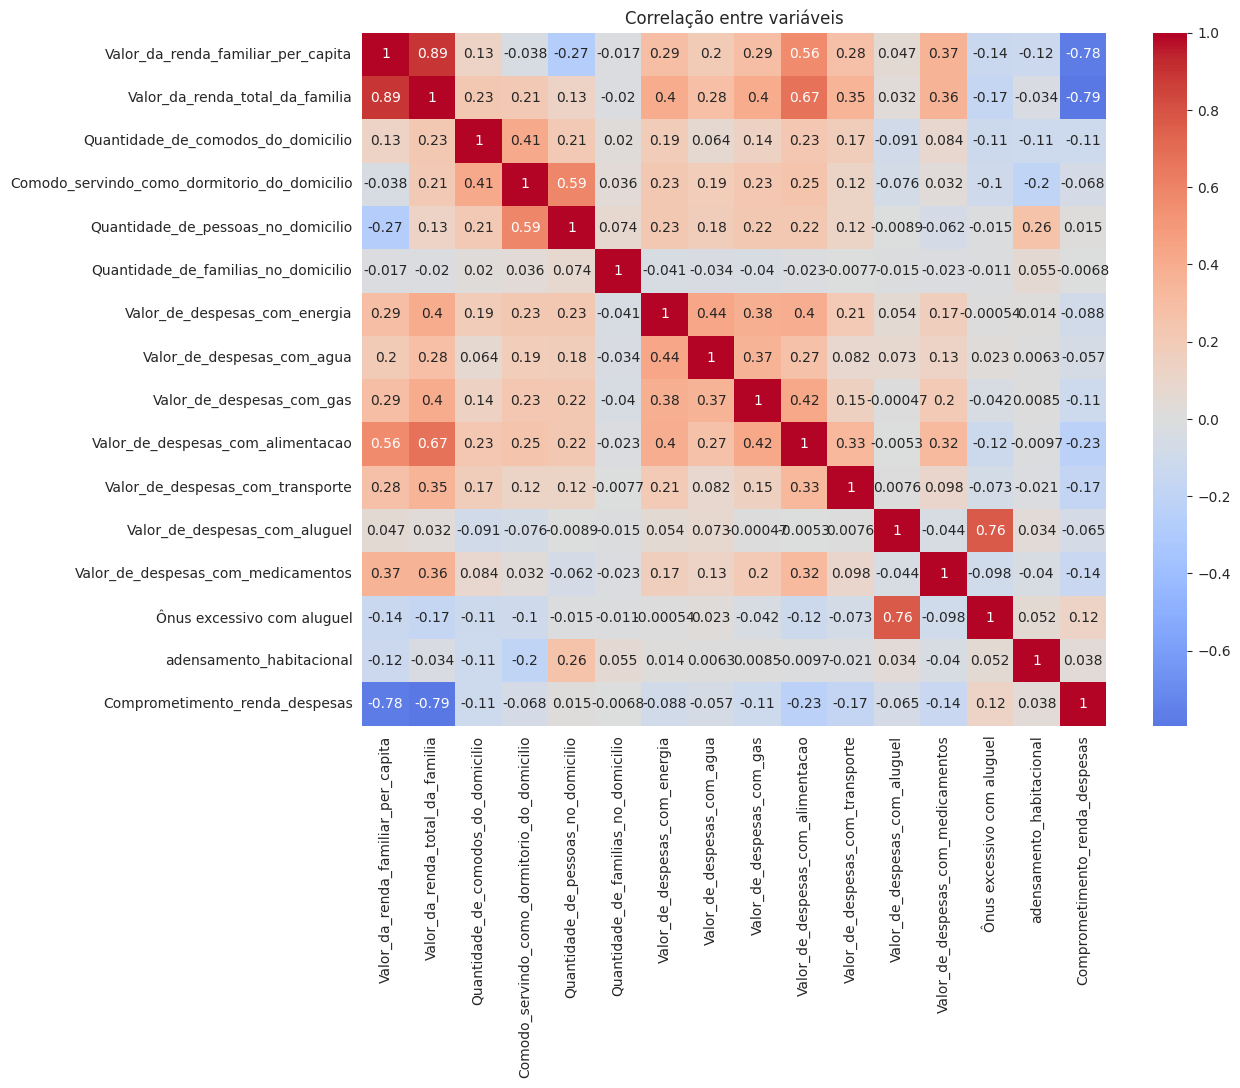

In [ ]:
# Utilize o método de Spearman para variáveis não necessariamente lineares
correlation_matrix = dados_tratados_cp.iloc[:, 1:].corr(method='spearman')

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre variáveis')
plt.show()

### Removendo as features que não são mais necessárias

Analisando a matriz de correlação, pode-se observar que algumas variáveis apresentam uma correlação forte com outras. Por exemplo, a variável "Quantidade_de_famílias_no_domicílio" apresenta uma correlação muito baixa com todas as outras variáveis, sendo possível retirá-la do conjunto de dados.

Além disso, algumas variáveis parecem medir aspectos semelhantes, como as variáveis de despesas com energia, água, gás, alimentação e transporte. Pode-se considerar a possibilidade de retirar algumas delas do conjunto de dados, mantendo apenas uma ou duas variáveis que melhor representem a despesa total da família.

Por fim, a variável "Cômodo_servindo_como_dormitório_do_domicílio" apresenta uma correlação forte com a variável "Quantidade_de_pessoas_no_domicílio", o que sugere a possibilidade de transformá-la em uma variável binária indicando se há ou não um cômodo servindo como dormitório no domicílio.

Portanto, as variáveis que podem ser transformadas ou retiradas são:

Variável "Quantidade_de_famílias_no_domicílio", que apresenta baixa correlação com as outras variáveis;
Variáveis de despesas com energia, água, gás, alimentação e transporte, que parecem medir aspectos semelhantes;
Variável "Cômodo_servindo_como_dormitório_do_domicílio", que pode ser transformada em uma variável binária.

* Tendo em vista a geração da variável de comprometimento da renda, não é necessário manter a renda total familiar e a renda per capita.
* Tendo em vista o ônus excessivo, optei por retirar as despesas com aluguel.
* Devido à criação do adensamento habitacional, foi removida a característica de cômodos servindo como dormitórios e a quantidade de pessoas no domicílio.

In [ ]:
# Removendo as características que não serão mais utilizadas
dados_tratados_cp.drop(['Comodo_servindo_como_dormitorio_do_domicilio', 'Valor_de_despesas_com_aluguel',
                     'Quantidade_de_pessoas_no_domicilio', 'Valor_da_renda_total_da_familia',
                     'Quantidade_de_familias_no_domicilio', 'Valor_de_despesas_com_energia',
                     'Valor_de_despesas_com_agua', 'Valor_de_despesas_com_gas',
                     'Valor_de_despesas_com_alimentacao', 'Valor_de_despesas_com_transporte',
                     'Valor_de_despesas_com_medicamentos', 'Valor_da_renda_familiar_per_capita',
                     'Quantidade_de_comodos_do_domicilio'], axis=1, inplace=True)

# Mostrando as características que serão utilizadas na análise de vulnerabilidade
print(dados_tratados_cp.shape)
print(dados_tratados_cp.columns)


(34432, 17)
Index(['ID_Familiar', 'Localização', 'Nome_da_localidade',
       'faixa_da_renda_familiar_per_capita', 'Recebe_PBF_familia',
       'Situacao_do_domicilio', 'Material_predominante_no_piso_do_domicilio',
       'Material_predominante_nas_paredes_externas_do_domicilio',
       'agua_canalizada', 'abastecimento_agua',
       'Forma_de_escoamento_sanitario', 'forma_de_coleta_do_lixo',
       'Tipo_de_iluminacao', 'calcamento_em_frente_ao_seu_domicilio',
       'Ônus excessivo com aluguel', 'adensamento_habitacional',
       'Comprometimento_renda_despesas'],
      dtype='object')


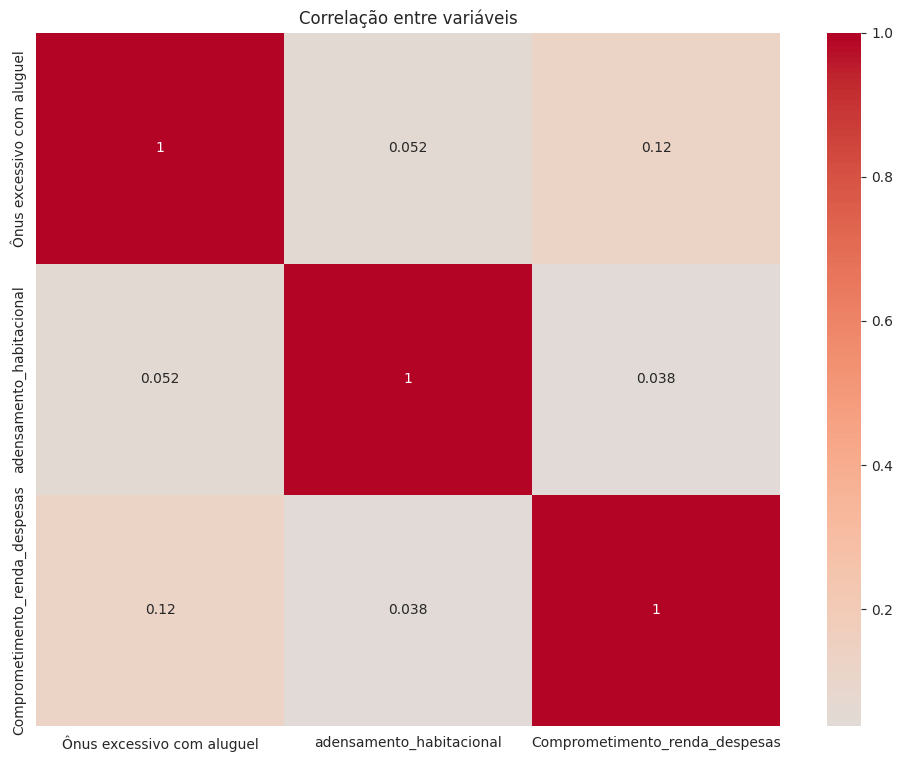

In [ ]:
# Utilize o método de Spearman para variáveis não necessariamente lineares
correlation_matrix = dados_tratados_cp.iloc[:, 1:].corr(method='spearman')

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre variáveis')
plt.show()

## Dados para Treinamento

para realizar o treinamento não sera necessário a existencia da categoria de Id familiar.

In [ ]:
dados_agrupar = dados_tratados_cp.copy()

dados_agrupar.drop(['ID_Familiar', 'Localização', 'Nome_da_localidade',
                    'Situacao_do_domicilio',], axis=1, inplace=True)

print(dados_agrupar.shape)
dados_agrupar.info()

(34432, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   faixa_da_renda_familiar_per_capita                       34432 non-null  object 
 1   Recebe_PBF_familia                                       34432 non-null  object 
 2   Material_predominante_no_piso_do_domicilio               34432 non-null  object 
 3   Material_predominante_nas_paredes_externas_do_domicilio  34432 non-null  object 
 4   agua_canalizada                                          34432 non-null  object 
 5   abastecimento_agua                                       34432 non-null  object 
 6   Forma_de_escoamento_sanitario                            34432 non-null  object 
 7   forma_de_coleta_do_lixo                                  34432 non-null  object 
 8   Tipo_de_ilumin

# PRE-PROCESSAMENTO + FEATURE ENGINEERING

In [ ]:
# PRE-PROCESSAMENTO
# Padronizacao das escalas dos dados numericos
from sklearn.preprocessing import MinMaxScaler

In [ ]:
fe_dados_agrup = dados_agrupar.copy()

Referências para as escolhas adotadas:

https://www.aen.pr.gov.br/Noticia/Novo-programa-habitacional-vai-atender-2500-familias-por-ano




![04122019JANDAIA_DO_SUL041219_71[1].jpg](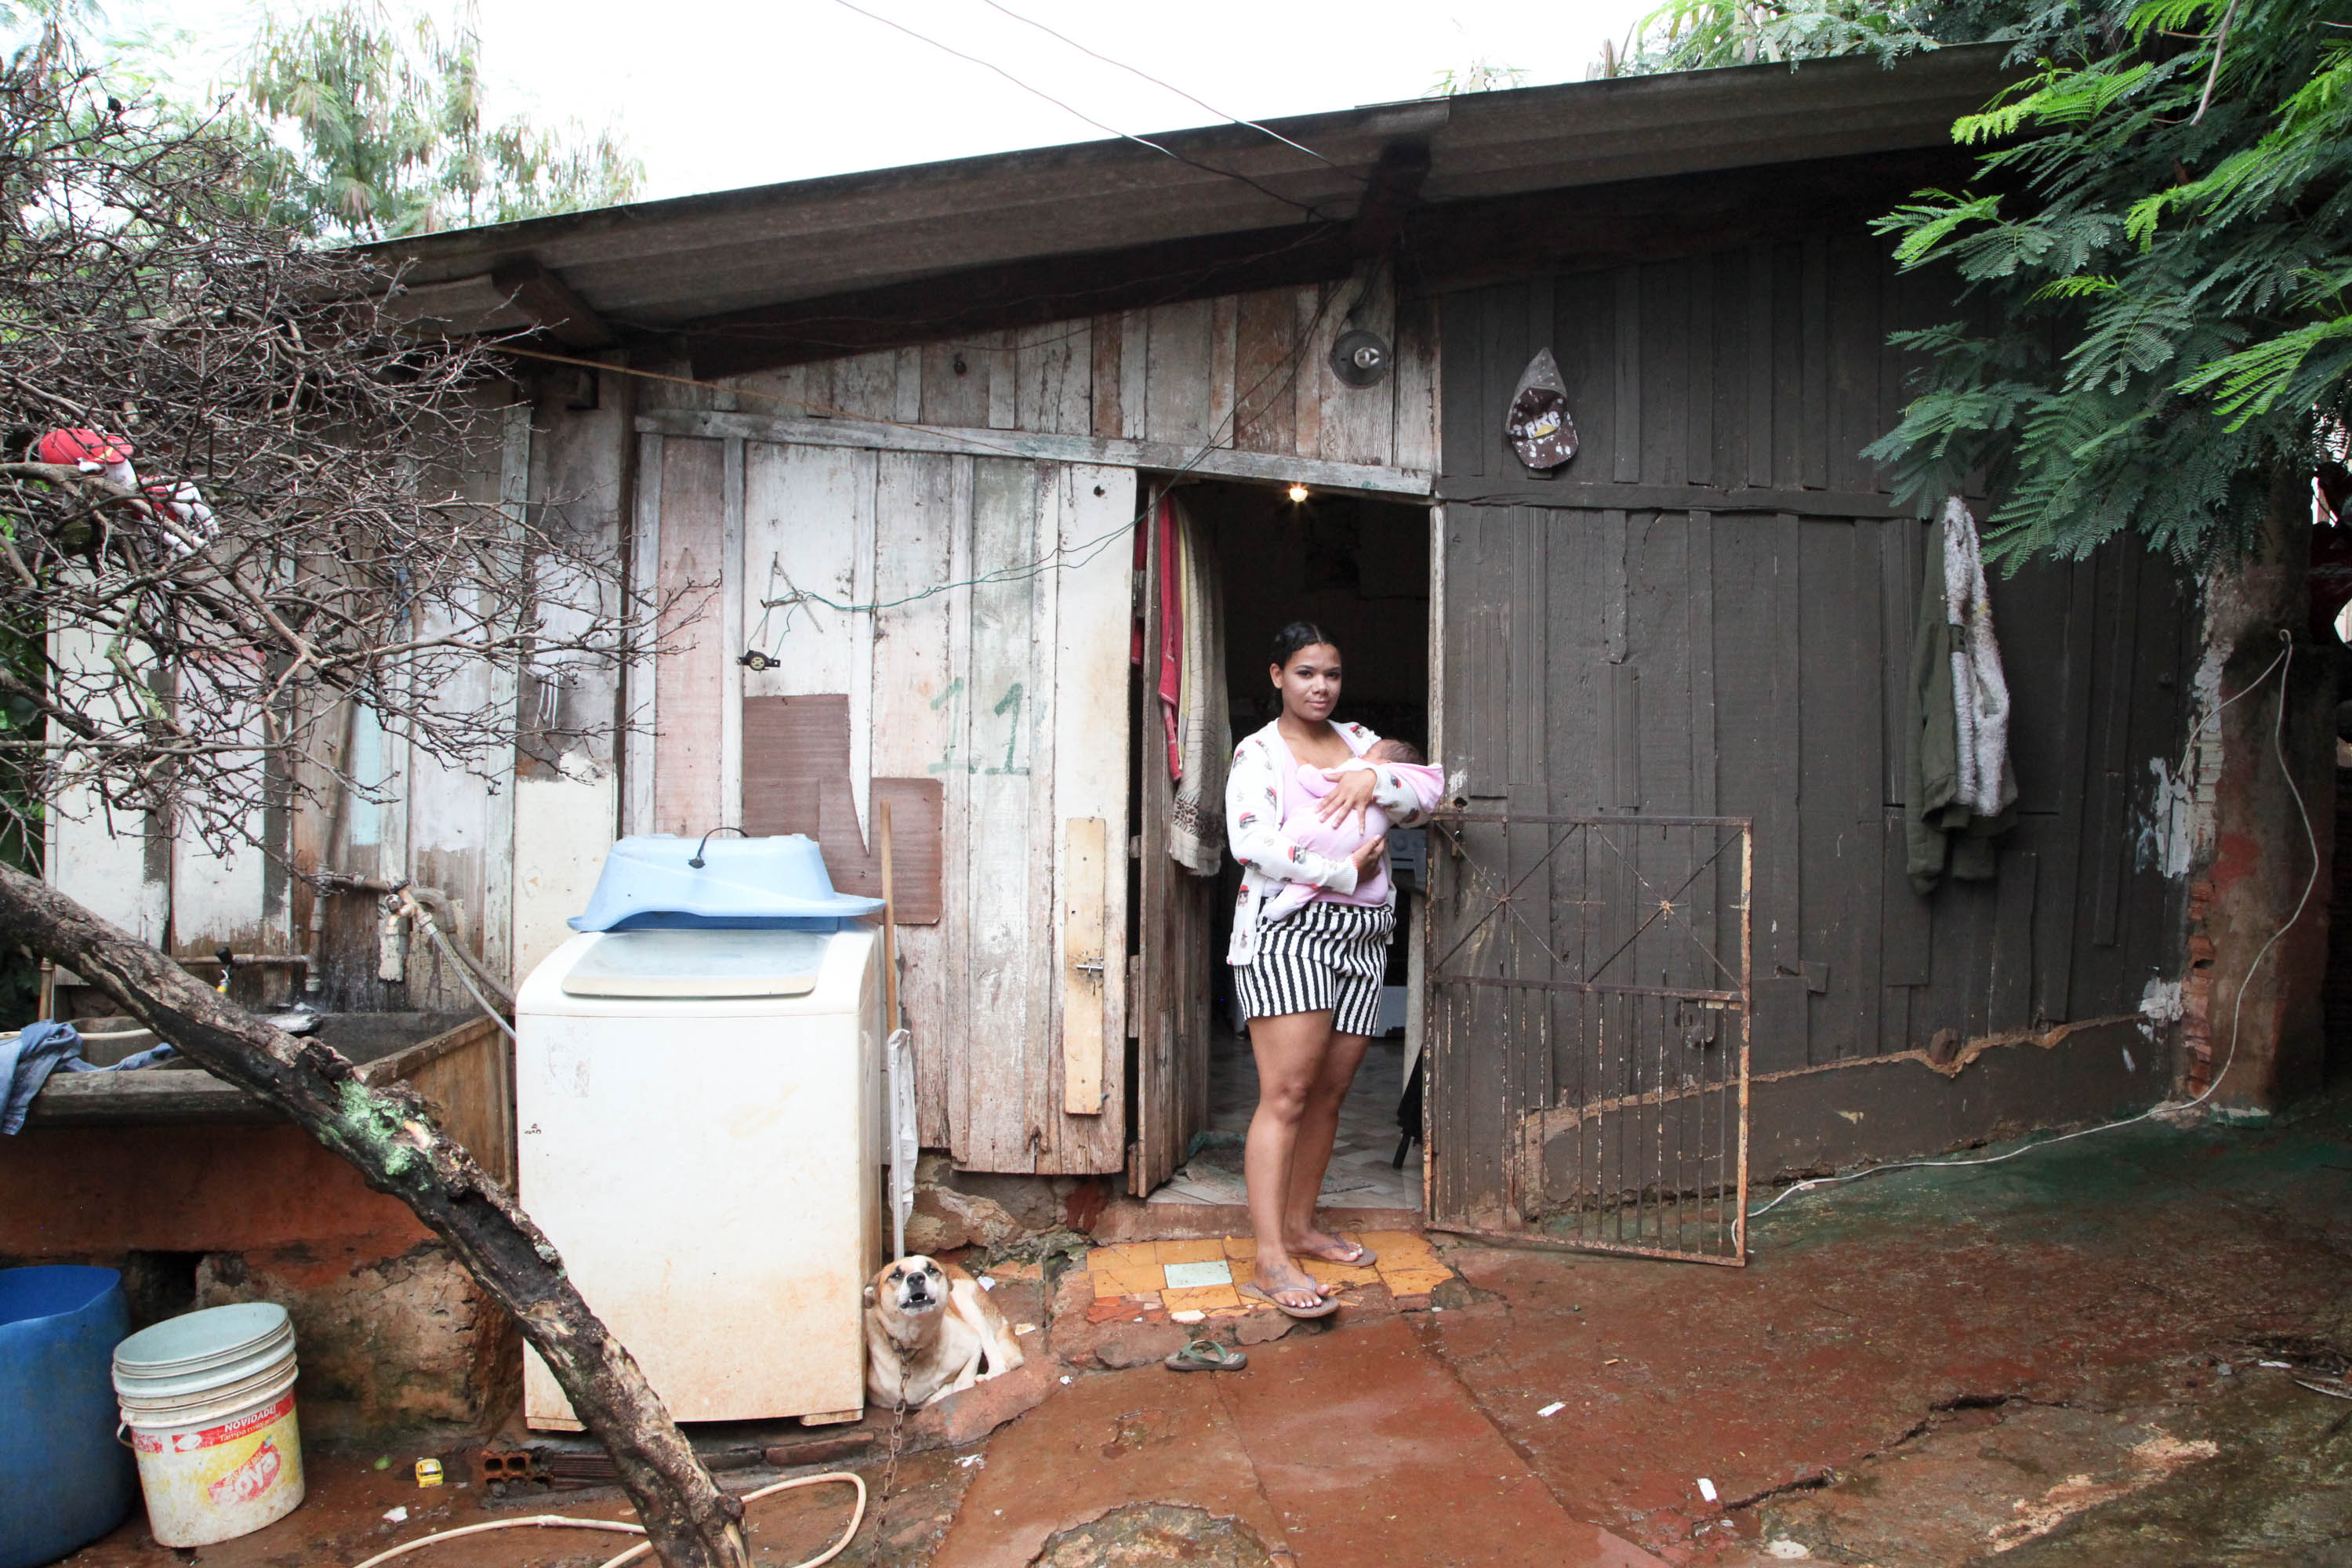)

In [ ]:
# Criar caracteristica "Sem_acesso_a_iluminacao_eletrica"
fe_dados_agrup['Tipo_de_iluminacao'] = fe_dados_agrup['Tipo_de_iluminacao'].replace(['Vela',
                                                                                    'Oleo, querosene ou gas'], 'Sem_acesso_a_iluminacao_eletrica')
# Criar caracteristica "iluminacao_eletrica_com_medidor"
fe_dados_agrup['Tipo_de_iluminacao'] = fe_dados_agrup['Tipo_de_iluminacao'].replace(['Eletrica com medidor comunitario',
                                                                                    'Eletrica com medidor proprio'], 'iluminacao_eletrica_com_medidor')

# Criar caracteristica "Piso_precario"
fe_dados_agrup['Material_predominante_no_piso_do_domicilio'] = fe_dados_agrup['Material_predominante_no_piso_do_domicilio'].replace(['Madeira aparelhada',
                                                                                    'Madeira aproveitada',
                                                                                    'Terra'], 'Piso_precario')

# Criar caracteristica "Parede_precaria"
fe_dados_agrup['Material_predominante_nas_paredes_externas_do_domicilio'] = fe_dados_agrup['Material_predominante_nas_paredes_externas_do_domicilio'].replace(['Taipa nao revestida',
                                                                                    'Madeira aparelhada',
                                                                                    'Taipa revestida'], 'Parede_precaria')

# Criar caracteristica "calcamento_parcial_ou_inexistente"
fe_dados_agrup['calcamento_em_frente_ao_seu_domicilio'] = fe_dados_agrup['calcamento_em_frente_ao_seu_domicilio'].replace(['Nao existe',
                                                                                    'Parcial'], 'calcamento_parcial_ou_inexistente')

# Criar caracteristica "abastecimento_agua_precario"
fe_dados_agrup['abastecimento_agua'] = fe_dados_agrup['abastecimento_agua'].replace(['Cisterna',
                                                                                    'Poco ou nascente'], 'abastecimento_agua_precario')

# Criar caracteristica "escoamento_sanitario_precario"
fe_dados_agrup['Forma_de_escoamento_sanitario'] = fe_dados_agrup['Forma_de_escoamento_sanitario'].replace(['Vala a ceu aberto',
                                                                                                          'Fossa rudimentar',
                                                                                                          'Direto para um rio, lago ou mar'], 'escoamento_sanitario_precario')

# Criar caracteristica "escoamento_sanitario_precario"
fe_dados_agrup['forma_de_coleta_do_lixo'] = fe_dados_agrup['forma_de_coleta_do_lixo'].replace(['E queimado ou enterrado na propriedade',
                                                                                    'E jogado em terreno baldio ou logradouro (rua, avenida, etc.)',
                                                                                    'E jogado em rio ou mar'], 'coleta_lixo_precario')


fe_dados_agrup.head()

faixa_da_renda_familiar_per_capita Recebe_PBF_familia  \
0         Entre R$89,01 ate R$178,00                Sim   
2                  Acima de 1/2 S.M.                Nao   
3                        Até R$89,00                Sim   
4        Entre R$178,01 ate 1/2 S.M.                Nao   
5         Entre R$89,01 ate R$178,00                Sim   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
2                  Ceramica, lajota ou pedra   
3                                    Cimento   
4                                    Cimento   
5                  Ceramica, lajota ou pedra   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                  Alvenaria/tijolo com revestimento                  Sim   
5                  Alvenaria/tijolo com revestimento                  Sim   

            abastecimento_agua       Forma_de_escoamento_sanitario  \
0   Rede geral de distribuicao       escoamento_sanitario_precario   
2   Rede geral de distribuicao       escoamento_sanitario_precario   
3   Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
4  abastecimento_agua_precario                       Fossa septica   
5   Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   

  forma_de_coleta_do_lixo               Tipo_de_iluminacao  \
0  E coletado diretamente  iluminacao_eletrica_com_medidor   
2  E coletado diretamente  iluminacao_eletrica_com_medidor   
3  E coletado diretamente  iluminacao_eletrica_com_medidor   
4    coleta_lixo_precario  iluminacao_eletrica_com_medidor   
5  E coletado diretamente  iluminacao_eletrica_com_medidor   

  calcamento_em_frente_ao_seu_domicilio  Ônus excessivo com aluguel  \
0     calcamento_parcial_ou_inexistente                       False   
2     calcamento_parcial_ou_inexistente                       False   
3                                 Total                       False   
4     calcamento_parcial_ou_inexistente                       False   
5     calcamento_parcial_ou_inexistente                        True   

   adensamento_habitacional  Comprometimento_renda_despesas  
0                     False                        1.781955  
2                     False                        0.180361  
3                     False                       15.133333  
4                     False                        0.370000  
5                     False                        1.066176

## Divisao dos dados

Eu irei optar por segmentar os dados em três categorias antes de realizar a clusterização não supervisionada:

Dados de vulnerabilidade da família:

* faixa_da_renda_familiar_per_capita
* Recebe_PBF_familia
* Ônus excessivo com aluguel
* Comprometimento_renda_despesas
* adensamento_habitacional

Dados de vulnerabilidade da infraestrutura da residência:

* Material_predominante_no_piso_do_domicilio
* Material_predominante_nas_paredes_externas_do_domicilio
* Tipo_de_iluminacao

Dados de vulnerabilidade de saneamento:

* calcamento_em_frente_ao_seu_domicilio
* agua_canalizada
* abastecimento_agua
* Forma_de_escoamento_sanitario
* forma_de_coleta_do_lixo

In [ ]:
fe_dados_agrup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   faixa_da_renda_familiar_per_capita                       34432 non-null  object 
 1   Recebe_PBF_familia                                       34432 non-null  object 
 2   Material_predominante_no_piso_do_domicilio               34432 non-null  object 
 3   Material_predominante_nas_paredes_externas_do_domicilio  34432 non-null  object 
 4   agua_canalizada                                          34432 non-null  object 
 5   abastecimento_agua                                       34432 non-null  object 
 6   Forma_de_escoamento_sanitario                            34432 non-null  object 
 7   forma_de_coleta_do_lixo                                  34432 non-null  object 
 8   Tipo_de_iluminacao        

In [ ]:
# Dividindo os dados em três categorias
v_familiar = fe_dados_agrup[[
    "faixa_da_renda_familiar_per_capita",
    "Recebe_PBF_familia",
    "Ônus excessivo com aluguel",
    "Comprometimento_renda_despesas",
    "adensamento_habitacional"
]]

v_residencia = fe_dados_agrup[[
    "Material_predominante_no_piso_do_domicilio",
    "Material_predominante_nas_paredes_externas_do_domicilio",
    "Tipo_de_iluminacao",
    ]]

v_saneamento = fe_dados_agrup[[
    "calcamento_em_frente_ao_seu_domicilio",
    "agua_canalizada",
    "abastecimento_agua",
    "Forma_de_escoamento_sanitario",
    "forma_de_coleta_do_lixo"
]]

Eu escolhi segmentar os dados em três categorias e realizar a clusterização não supervisionada em cada segmento separadamente porque isso oferece algumas vantagens:

1. Interpretabilidade: Ao dividir os dados em categorias específicas (renda, infraestrutura da residência e saneamento), torna-se mais fácil interpretar os resultados e entender como cada categoria afeta a vulnerabilidade das famílias. Se você usasse todos os dados juntos, os clusters resultantes poderiam ser difíceis de interpretar, pois seriam influenciados por múltiplas características simultaneamente.

1. Maior granularidade na análise: A segmentação permite que você analise a vulnerabilidade das famílias em cada categoria separadamente. Isso pode revelar informações valiosas sobre como diferentes fatores contribuem para a vulnerabilidade geral das famílias e ajudá-lo a identificar áreas específicas que precisam de melhorias ou intervenções.

1. Redução de viés: Quando você agrupa variáveis com diferentes escalas e tipos de dados, corre o risco de alguns atributos dominarem o processo de clusterização devido às suas escalas ou distribuições. Ao segmentar os dados, você pode tratar cada categoria de variáveis de forma adequada, garantindo que os clusters resultantes reflitam as características relevantes de cada grupo.

1. Facilita a identificação de políticas e intervenções: Com a segmentação, você pode identificar áreas específicas que precisam de atenção e quais políticas ou intervenções podem ser mais eficazes. Por exemplo, se você descobrir que um grupo de famílias com alta vulnerabilidade tem problemas principalmente relacionados ao saneamento, as políticas públicas podem ser direcionadas para melhorar o saneamento básico nessa área.

In [ ]:
v_familiar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   faixa_da_renda_familiar_per_capita  34432 non-null  object 
 1   Recebe_PBF_familia                  34432 non-null  object 
 2   Ônus excessivo com aluguel          34432 non-null  bool   
 3   Comprometimento_renda_despesas      34432 non-null  float64
 4   adensamento_habitacional            34432 non-null  bool   
dtypes: bool(2), float64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
v_residencia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 3 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Material_predominante_no_piso_do_domicilio               34432 non-null  object
 1   Material_predominante_nas_paredes_externas_do_domicilio  34432 non-null  object
 2   Tipo_de_iluminacao                                       34432 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
v_saneamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   calcamento_em_frente_ao_seu_domicilio  34432 non-null  object
 1   agua_canalizada                        34432 non-null  object
 2   abastecimento_agua                     34432 non-null  object
 3   Forma_de_escoamento_sanitario          34432 non-null  object
 4   forma_de_coleta_do_lixo                34432 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


### Dados de vulnerabilidade da família:

#### Dados númericos

##### Min. Max. Scaler

Padronizar os dados númericos:

O StandardScaler() é uma técnica de padronização que transforma as variáveis numéricas em uma escala padrão, em que a média é igual a zero e o desvio padrão é igual a um. Essa técnica é muito útil para algoritmos que requerem que as variáveis tenham uma escala comparável. No entanto, em alguns casos, pode haver a presença de outliers ou distribuições muito assimétricas que podem afetar a eficácia dessa técnica.

Nesses casos, outras técnicas de padronização podem ser mais adequadas, como o MinMaxScaler() ou o RobustScaler(). O MinMaxScaler() transforma os dados para um intervalo específico, geralmente de 0 a 1, enquanto o RobustScaler() usa estatísticas robustas para lidar com outliers e distribuições não normais. É importante avaliar a distribuição dos dados e a presença de outliers antes de decidir qual técnica de padronização é mais adequada.

###### MinMaxScaler

In [ ]:
# Padronizando a escala de todas as variaveis numericas

# selecionar as colunas numéricas
dados_numericos_vf = v_familiar.select_dtypes(include=['float64', 'int64']).copy()

# normalizar as colunas selecionadas
scaler = MinMaxScaler(feature_range=(0, 1))
dados_numericos_vf_scaler = scaler.fit_transform(dados_numericos_vf)

# Criando o dataframe com os dados escalonados
dados_numericos_vf_scaler_df = pd.DataFrame(dados_numericos_vf_scaler, index=dados_numericos_vf.index,columns=dados_numericos_vf.columns)
print(dados_numericos_vf_scaler_df.shape)
dados_numericos_vf_scaler_df.head()

(34432, 1)


Comprometimento_renda_despesas
0                        0.001200
2                        0.000121
3                        0.010191
4                        0.000249
5                        0.000718

#### dados categoricos

In [ ]:
# Pegando os dados boleanos
dados_bool_renda = v_familiar.select_dtypes(include=['bool']).copy()

# Convertendo dados boleanos em numericos
dados_bool_renda = dados_bool_renda.replace({True: 1, False: 0})

# Convertendo em em tipo de dados binario uint8
dados_bool_renda = dados_bool_renda[['Ônus excessivo com aluguel', 'adensamento_habitacional']].astype('uint8')

print(dados_bool_renda.shape)
dados_bool_renda.head()

(34432, 2)


Ônus excessivo com aluguel  adensamento_habitacional
0                           0                         0
2                           0                         0
3                           0                         0
4                           0                         0
5                           1                         0

##### Tranformando dados object em dados binários

In [ ]:
# selecionar as colunas categoricas
dados_categoricos_renda = v_familiar.select_dtypes(include=['object']).copy()

# Converter variáveis categóricas em numéricas utilizando o One-Hot Encoding
dados_cat_encoded_vf = pd.get_dummies(dados_categoricos_renda)

# Apaga o recebe "bolsa familia não" para não ficar reduntante
dados_cat_encoded_vf.drop(['Recebe_PBF_familia_Sim'], axis=1, inplace=True)
print(dados_cat_encoded_vf.shape)
dados_cat_encoded_vf.head()

(34432, 5)


faixa_da_renda_familiar_per_capita_Acima de 1/2 S.M.  \
0                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      
5                                                  0      

   faixa_da_renda_familiar_per_capita_Até R$89,00  \
0                                               0   
2                                               0   
3                                               1   
4                                               0   
5                                               0   

   faixa_da_renda_familiar_per_capita_Entre R$178,01 ate 1/2 S.M.  \
0                                                  0                
2                                                  0                
3                                                  0                
4                                                  1                
5                                                  0                

   faixa_da_renda_familiar_per_capita_Entre R$89,01 ate R$178,00  \
0                                                  1               
2                                                  0               
3                                                  0               
4                                                  0               
5                                                  1               

   Recebe_PBF_familia_Nao  
0                       0  
2                       1  
3                       0  
4                       1  
5                       0

#### Unindo os dados

In [ ]:
# Juntar as variáveis numéricas e categóricas
dados_encoded_vf = pd.concat([dados_numericos_vf_scaler_df, dados_cat_encoded_vf, dados_bool_renda], axis=1)
print(dados_encoded_vf.shape)
dados_encoded_vf.head()

(34432, 8)


Comprometimento_renda_despesas  \
0                        0.001200   
2                        0.000121   
3                        0.010191   
4                        0.000249   
5                        0.000718   

   faixa_da_renda_familiar_per_capita_Acima de 1/2 S.M.  \
0                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      
5                                                  0      

   faixa_da_renda_familiar_per_capita_Até R$89,00  \
0                                               0   
2                                               0   
3                                               1   
4                                               0   
5                                               0   

   faixa_da_renda_familiar_per_capita_Entre R$178,01 ate 1/2 S.M.  \
0                                                  0                
2                                                  0                
3                                                  0                
4                                                  1                
5                                                  0                

   faixa_da_renda_familiar_per_capita_Entre R$89,01 ate R$178,00  \
0                                                  1               
2                                                  0               
3                                                  0               
4                                                  0               
5                                                  1               

   Recebe_PBF_familia_Nao  Ônus excessivo com aluguel  \
0                       0                           0   
2                       1                           0   
3                       0                           0   
4                       1                           0   
5                       0                           1   

   adensamento_habitacional  
0                         0  
2                         0  
3                         0  
4                         0  
5                         0

In [ ]:
dados_encoded_vf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 8 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Comprometimento_renda_despesas                                  34432 non-null  float64
 1   faixa_da_renda_familiar_per_capita_Acima de 1/2 S.M.            34432 non-null  uint8  
 2   faixa_da_renda_familiar_per_capita_Até R$89,00                  34432 non-null  uint8  
 3   faixa_da_renda_familiar_per_capita_Entre R$178,01 ate 1/2 S.M.  34432 non-null  uint8  
 4   faixa_da_renda_familiar_per_capita_Entre R$89,01 ate R$178,00   34432 non-null  uint8  
 5   Recebe_PBF_familia_Nao                                          34432 non-null  uint8  
 6   Ônus excessivo com aluguel                                      34432 non-null  uint8  
 7   adensamento_habitacional                          

### Dados de infraestrutura residencial

#### dados categoricos

##### One Hot Encoding

In [ ]:
# selecionar as colunas categoricas
dados_categoricos_vr = v_residencia.copy()
print(dados_categoricos_vr.shape)
dados_categoricos_vr.head()

(34432, 3)


Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
2                  Ceramica, lajota ou pedra   
3                                    Cimento   
4                                    Cimento   
5                  Ceramica, lajota ou pedra   

  Material_predominante_nas_paredes_externas_do_domicilio  \
0                  Alvenaria/tijolo com revestimento        
2                  Alvenaria/tijolo com revestimento        
3                  Alvenaria/tijolo com revestimento        
4                  Alvenaria/tijolo com revestimento        
5                  Alvenaria/tijolo com revestimento        

                Tipo_de_iluminacao  
0  iluminacao_eletrica_com_medidor  
2  iluminacao_eletrica_com_medidor  
3  iluminacao_eletrica_com_medidor  
4  iluminacao_eletrica_com_medidor  
5  iluminacao_eletrica_com_medidor

In [ ]:
# Converter variáveis categóricas em numéricas utilizando o One-Hot Encoding
dados_cat_encoded_vr = pd.get_dummies(dados_categoricos_vr)
print(dados_cat_encoded_vr.shape)
dados_cat_encoded_vr.head()


(34432, 10)


Material_predominante_no_piso_do_domicilio_Carpete  \
0                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    
5                                                  0    

   Material_predominante_no_piso_do_domicilio_Ceramica, lajota ou pedra  \
0                                                  1                      
2                                                  1                      
3                                                  0                      
4                                                  0                      
5                                                  1                      

   Material_predominante_no_piso_do_domicilio_Cimento  \
0                                                  0    
2                                                  0    
3                                                  1    
4                                                  1    
5                                                  0    

   Material_predominante_no_piso_do_domicilio_Piso_precario  \
0                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          
5                                                  0          

   Material_predominante_nas_paredes_externas_do_domicilio_Alvenaria/tijolo com revestimento  \
0                                                  1                                           
2                                                  1                                           
3                                                  1                                           
4                                                  1                                           
5                                                  1                                           

   Material_predominante_nas_paredes_externas_do_domicilio_Alvenaria/tijolo sem revestimento  \
0                                                  0                                           
2                                                  0                                           
3                                                  0                                           
4                                                  0                                           
5                                                  0                                           

   Material_predominante_nas_paredes_externas_do_domicilio_Parede_precaria  \
0                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         
5                                                  0                         

   Tipo_de_iluminacao_Eletrica sem medidor  \
0                                        0   
2                                        0   
3                                        0   
4                                        0   
5                                        0   

   Tipo_de_iluminacao_Sem_acesso_a_iluminacao_eletrica  \
0                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     
5                                                  0     

   Tipo_de_iluminacao_iluminacao_eletrica_com_medidor  
0                                                  1   
2                                                  1   
3                                                  1   
4             

In [ ]:
dados_cat_encoded_vr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 10 columns):
 #   Column                                                                                     Non-Null Count  Dtype
---  ------                                                                                     --------------  -----
 0   Material_predominante_no_piso_do_domicilio_Carpete                                         34432 non-null  uint8
 1   Material_predominante_no_piso_do_domicilio_Ceramica, lajota ou pedra                       34432 non-null  uint8
 2   Material_predominante_no_piso_do_domicilio_Cimento                                         34432 non-null  uint8
 3   Material_predominante_no_piso_do_domicilio_Piso_precario                                   34432 non-null  uint8
 4   Material_predominante_nas_paredes_externas_do_domicilio_Alvenaria/tijolo com revestimento  34432 non-null  uint8
 5   Material_predominante_nas_paredes_externas_do_domicilio_Alve

### Dados de saneamento

#### dados categoricos

##### One Hot Encoding

In [ ]:
# selecionar as colunas categoricas
dados_categoricos_v_saneamento = v_saneamento.copy()
print(dados_categoricos_v_saneamento.shape)
dados_categoricos_v_saneamento.head()

(34432, 5)


calcamento_em_frente_ao_seu_domicilio agua_canalizada  \
0     calcamento_parcial_ou_inexistente             Sim   
2     calcamento_parcial_ou_inexistente             Sim   
3                                 Total             Sim   
4     calcamento_parcial_ou_inexistente             Sim   
5     calcamento_parcial_ou_inexistente             Sim   

            abastecimento_agua       Forma_de_escoamento_sanitario  \
0   Rede geral de distribuicao       escoamento_sanitario_precario   
2   Rede geral de distribuicao       escoamento_sanitario_precario   
3   Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
4  abastecimento_agua_precario                       Fossa septica   
5   Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   

  forma_de_coleta_do_lixo  
0  E coletado diretamente  
2  E coletado diretamente  
3  E coletado diretamente  
4    coleta_lixo_precario  
5  E coletado diretamente

In [ ]:
# Converter variáveis categóricas em numéricas utilizando o One-Hot Encoding
dados_encoded_vs = pd.get_dummies(dados_categoricos_v_saneamento)

# Apaga o recebe "agua canalizada SIM" para não ficar reduntante tendo em consideração a existencia do NAO
dados_encoded_vs.drop(['agua_canalizada_Sim'], axis=1, inplace=True)
print(dados_encoded_vs.shape)
dados_encoded_vs.head()


(34432, 11)


calcamento_em_frente_ao_seu_domicilio_Total  \
0                                            0   
2                                            0   
3                                            1   
4                                            0   
5                                            0   

   calcamento_em_frente_ao_seu_domicilio_calcamento_parcial_ou_inexistente  \
0                                                  1                         
2                                                  1                         
3                                                  0                         
4                                                  1                         
5                                                  1                         

   agua_canalizada_Nao  abastecimento_agua_Rede geral de distribuicao  \
0                    0                                              1   
2                    0                                              1   
3                    0                                              1   
4                    0                                              0   
5                    0                                              1   

   abastecimento_agua_abastecimento_agua_precario  \
0                                               0   
2                                               0   
3                                               0   
4                                               1   
5                                               0   

   Forma_de_escoamento_sanitario_Fossa septica  \
0                                            0   
2                                            0   
3                                            0   
4                                            1   
5                                            0   

   Forma_de_escoamento_sanitario_Rede coletora de esgoto ou pluvial  \
0                                                  0                  
2                                                  0                  
3                                                  1                  
4                                                  0                  
5                                                  1                  

   Forma_de_escoamento_sanitario_escoamento_sanitario_precario  \
0                                                  1             
2                                                  1             
3                                                  0             
4                                                  0             
5                                                  0             

   forma_de_coleta_do_lixo_E coletado diretamente  \
0                                               1   
2                                               1   
3                                               1   
4                                               0   
5                                               1   

   forma_de_coleta_do_lixo_E coletado indiretamente  \
0                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
5                                                 0   

   forma_de_coleta_do_lixo_coleta_lixo_precario  
0                                             0  
2                                             0  
3                                             0  
4                                             1  
5                                             0

# APLICANDO OS ALGORITIMOS DE ML
---

## **DBSCAN** com FAMD - Dados da Vulnerabilidade da Familia

---



### Analisando a Variancia explicada com FAMD

### Reducao de dimensionalidade com FAMD (Factor Analysis of Mixed Data) dados Mistos

A FAMD (Factor Analysis of Mixed Data) é uma técnica de análise de dados que permite trabalhar com uma combinação de variáveis numéricas e categóricas. A FAMD é uma versão estendida da análise de componentes principais (PCA) que permite trabalhar com dados mistos, ou seja, dados que incluem tanto variáveis numéricas quanto categóricas.

A FAMD busca encontrar uma representação compacta dos dados, onde as variáveis numéricas são representadas por componentes lineares e as variáveis categóricas são representadas por componentes qualitativos. A FAMD é uma técnica útil para a exploração de dados, a redução de dimensionalidade e a visualização de dados complexos.

O FAMD do Prince recebe dados numericos e categoricos, o proprio algoritimo faz o one hot encoding, portanto nao se faz necessaro aplicar este processo antes para o FAMD. Já o FAMD para ofactor analysis é necessário aplicar o one hot encoding antes.

In [ ]:
v_familiar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34432 entries, 0 to 37855
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   faixa_da_renda_familiar_per_capita  34432 non-null  object 
 1   Recebe_PBF_familia                  34432 non-null  object 
 2   Ônus excessivo com aluguel          34432 non-null  bool   
 3   Comprometimento_renda_despesas      34432 non-null  float64
 4   adensamento_habitacional            34432 non-null  bool   
dtypes: bool(2), float64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
# Concatenando os valores numericos aos caterigos
df_famd_vf = v_familiar.copy()
print(df_famd_vf.shape)
df_famd_vf.head()

(34432, 5)


faixa_da_renda_familiar_per_capita Recebe_PBF_familia  \
0         Entre R$89,01 ate R$178,00                Sim   
2                  Acima de 1/2 S.M.                Nao   
3                        Até R$89,00                Sim   
4        Entre R$178,01 ate 1/2 S.M.                Nao   
5         Entre R$89,01 ate R$178,00                Sim   

   Ônus excessivo com aluguel  Comprometimento_renda_despesas  \
0                       False                        1.781955   
2                       False                        0.180361   
3                       False                       15.133333   
4                       False                        0.370000   
5                        True                        1.066176   

   adensamento_habitacional  
0                     False  
2                     False  
3                     False  
4                     False  
5                     False

In [ ]:
# aplicação do FAMD
famd = FactorAnalysis(n_components=20)
famd_coords2 = famd.fit_transform(dados_encoded_vf)

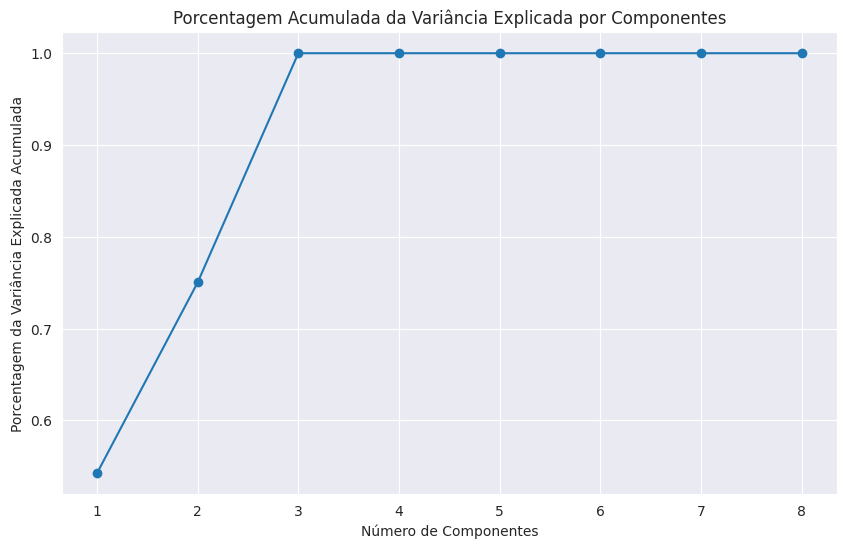

In [ ]:
# Calcular a matriz de covariância dos dados transformados
cov_matrix = np.cov(famd_coords2, rowvar=False)

# Calcular os autovalores e a variância total
eigenvalues = np.linalg.eigvals(cov_matrix)
total_variance = np.sum(eigenvalues)

# Calcular a variância explicada acumulada
explained_variance_ratio = eigenvalues / total_variance
variance_ratio_cumsum = np.cumsum(explained_variance_ratio)

# Inverter a ordem dos valores para corrigir a direção do gráfico
variance_ratio_cumsum = variance_ratio_cumsum[::-1]

# Defina o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Crie um gráfico de linha que mostra a porcentagem acumulada da variância explicada
plt.plot(range(len(variance_ratio_cumsum), 0, -1), variance_ratio_cumsum, marker='o')

# Adicione rótulos e títulos ao gráfico
plt.xlabel('Número de Componentes')
plt.ylabel('Porcentagem da Variância Explicada Acumulada')
plt.title('Porcentagem Acumulada da Variância Explicada por Componentes')

# Exiba o gráfico
plt.show()


O grafico demonstra que apartir do componente 5 nao ha um ganho de variancia acumulada significativo. Nesse sentido, 5 componente seriamos capazes de explicar 100% da variancia dos dados, demosntrando os compentes mais relevantes.

In [ ]:
# aplicação do FAMD
famd = FactorAnalysis(n_components=4)
famd_coords = famd.fit_transform(dados_encoded_vf)

In [ ]:
famd_coords.shape

(34432, 4)

### aplicando DBSCAN para os componentes principais da infraestrutura residencial

Metricas de similaridade ou distância para o DBSCAN:

'yule', 'mahalanobis', 'manhattan', 'precomputed', 'chebyshev', 'correlation', 'sokalmichener', 'haversine', 'jaccard', 'euclidean', 'hamming', 'russellrao', 'matching', 'dice', 'minkowski', 'sokalsneath', 'wminkowski', 'seuclidean', 'nan_euclidean', 'rogerstanimoto', 'l2', 'cosine', 'l1', 'kulsinski', 'canberra', 'braycurtis', 'sqeuclidean', 'cityblock'

In [ ]:
# Cria um modelo DBSCAN com os parâmetros apropriados; 170
dbscan = DBSCAN(eps=0.05, min_samples=40, metric='canberra')

In [ ]:
# Aplica o modelo aos dados
dbscan.fit(famd_coords)

DBSCAN(eps=0.05, metric='canberra', min_samples=40)

In [ ]:
# Obtém as labels dos clusters
cluster_dbscan = dbscan.labels_

In [ ]:
# Para calcular o coeficiente de silhueta, você deve fornecer os dados originais e os rótulos dos clusters.
score = silhouette_score(famd_coords, cluster_dbscan)
print("Silhouette score:", score)


Silhouette score: 0.9474087961139392


In [ ]:
# Trazendo os dados de comprometimento de renda
dados_numericos_dbscan = dados_numericos_vf.copy()

# Adicionar a coluna 'cluster' aos dados
dados_numericos_dbscan['cluster'] = cluster_dbscan

# Calcular a média dos valores do comprometimento da renda para cada cluster
cluster_means = dados_numericos_dbscan.groupby('cluster').mean()

cluster_means.T

cluster                                -1         0         1         2   \
Comprometimento_renda_despesas  300.490657  1.088233  0.456565  2.436581   

cluster                               3          4         5         6   \
Comprometimento_renda_despesas  0.643847  41.331589  0.670898  1.201189   

cluster                              7         8         9         10  \
Comprometimento_renda_despesas  0.64075  0.838957  2.472936  0.967957   

cluster                               11        12        13        14  \
Comprometimento_renda_despesas  0.514377  0.526361  0.518005  0.615636   

cluster                               15  
Comprometimento_renda_despesas  0.375509

In [ ]:
# Verificando os clusters com as maiores medias de comprometimento de renda

cluster_means.sort_values(by='Comprometimento_renda_despesas', ascending=False).T

cluster                                -1          4         9         2   \
Comprometimento_renda_despesas  300.490657  41.331589  2.472936  2.436581   

cluster                               6         0         10        8   \
Comprometimento_renda_despesas  1.201189  1.088233  0.967957  0.838957   

cluster                               5         3        7         14  \
Comprometimento_renda_despesas  0.670898  0.643847  0.64075  0.615636   

cluster                               12        13        11        1   \
Comprometimento_renda_despesas  0.526361  0.518005  0.514377  0.456565   

cluster                               15  
Comprometimento_renda_despesas  0.375509

In [ ]:
# Cria um dataframe com as variáveis categóricas originais
dados_cat_vf_analise = v_familiar.select_dtypes(include=['object', 'bool']).copy()

# Adiciona uma coluna ao dataframe com as labels dos clusters gerados pelo k-mode
dados_cat_vf_analise['cluster'] = cluster_dbscan

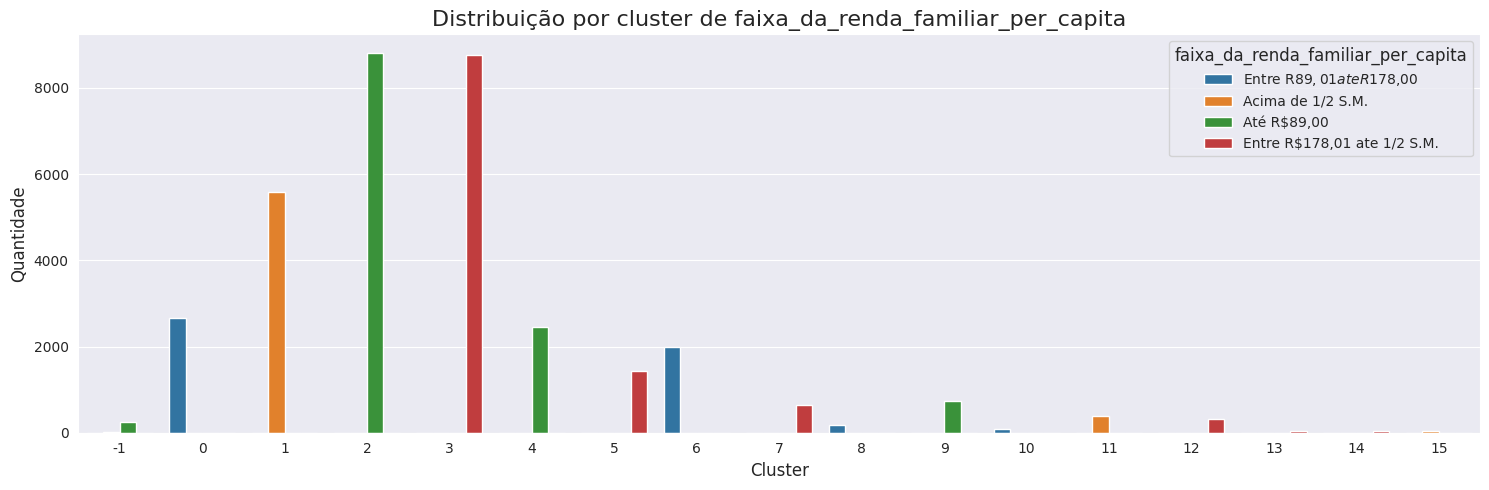

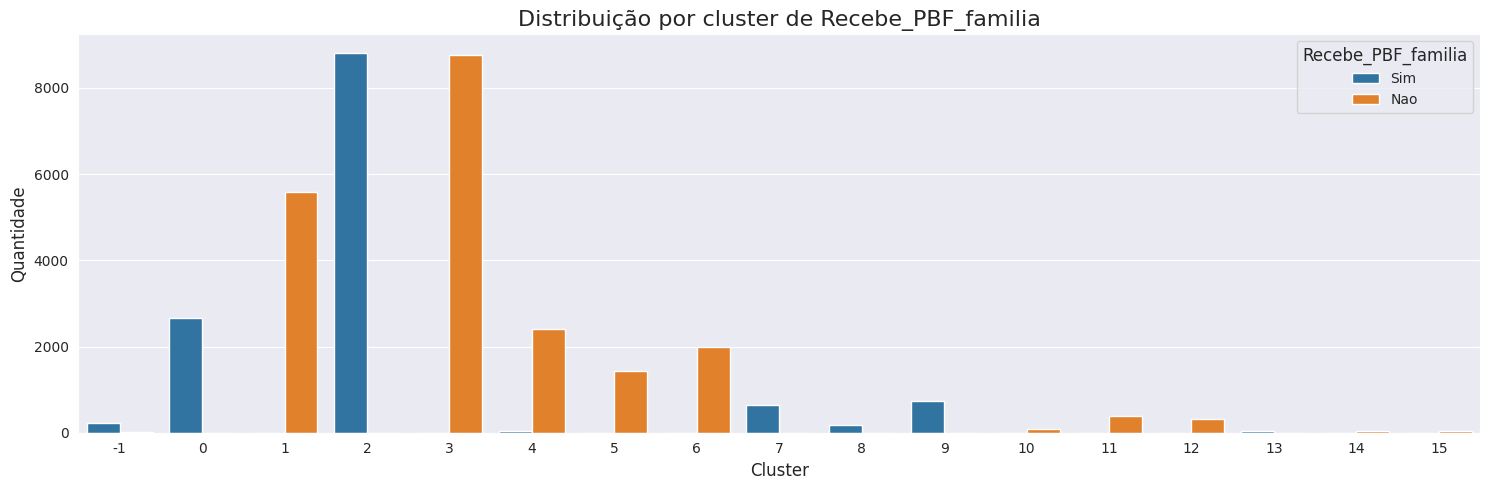

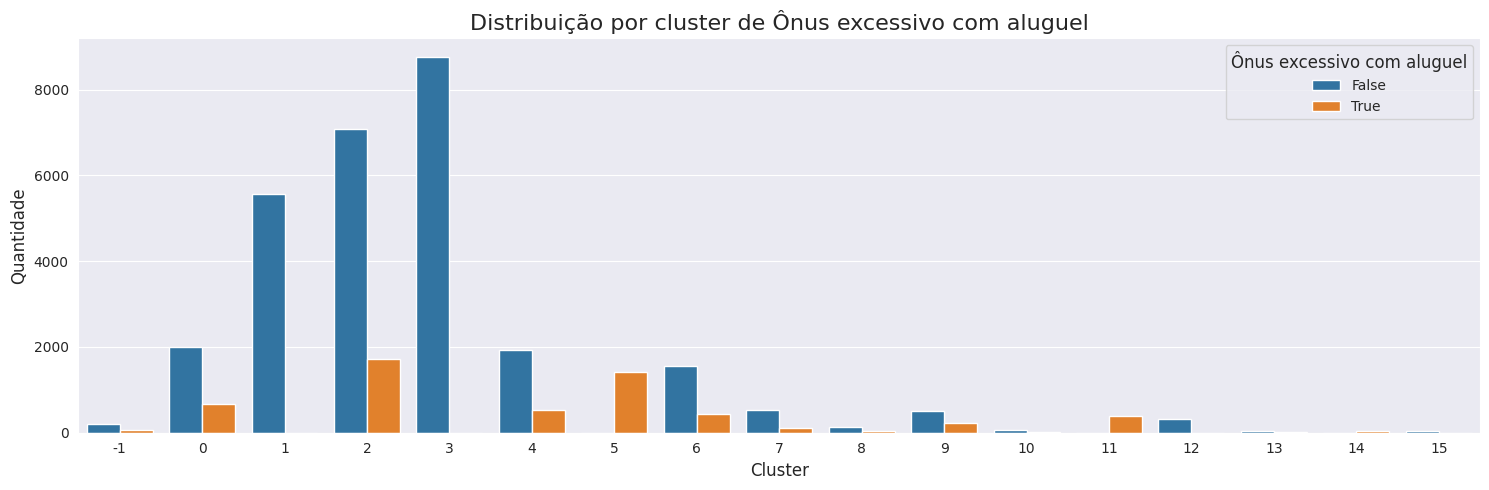

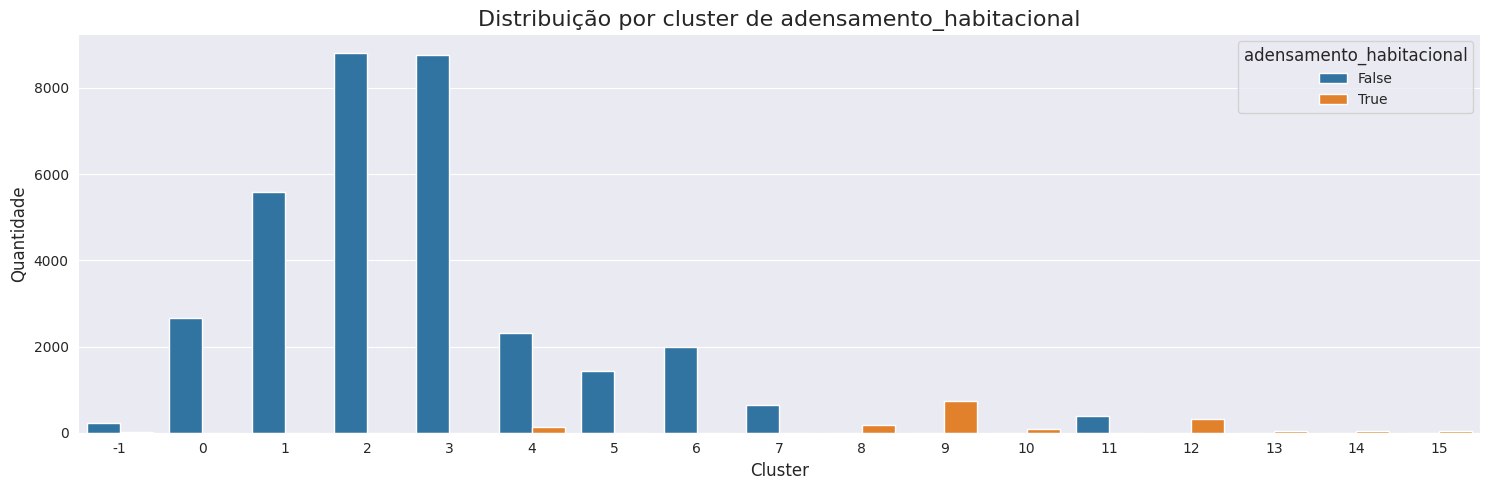

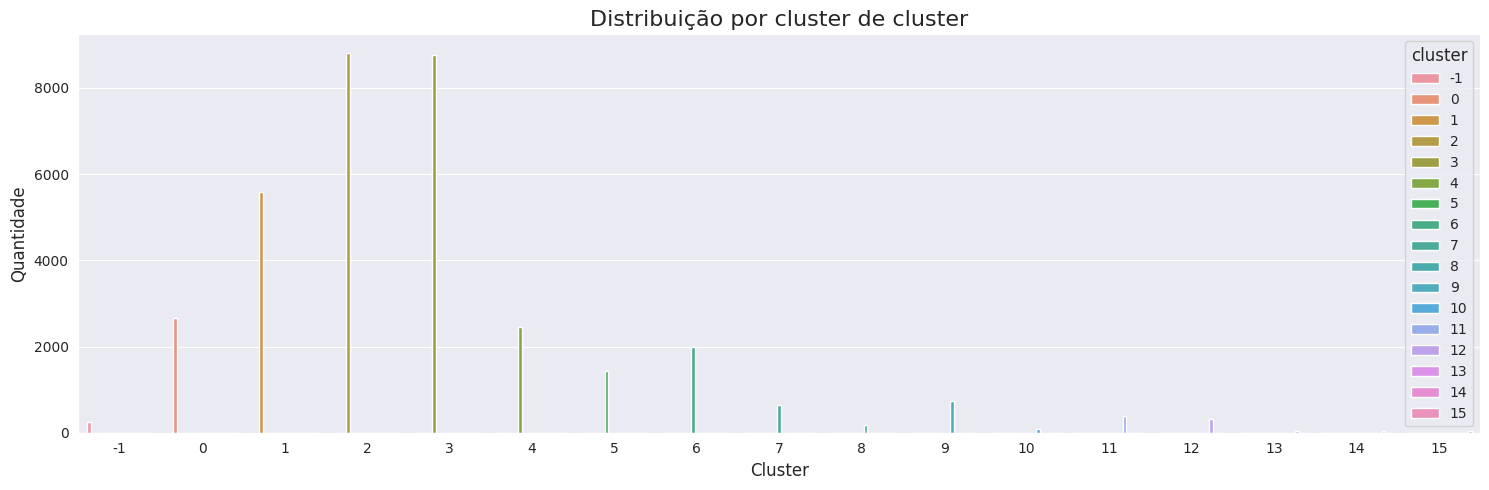

In [ ]:

for col in dados_cat_vf_analise:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = dados_cat_vf_analise)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()


Limitando as escalas para verificar os valores menores que não ficam visiveis devidos as distorções do gráfico por conta da concentração de valores em determinados clusters

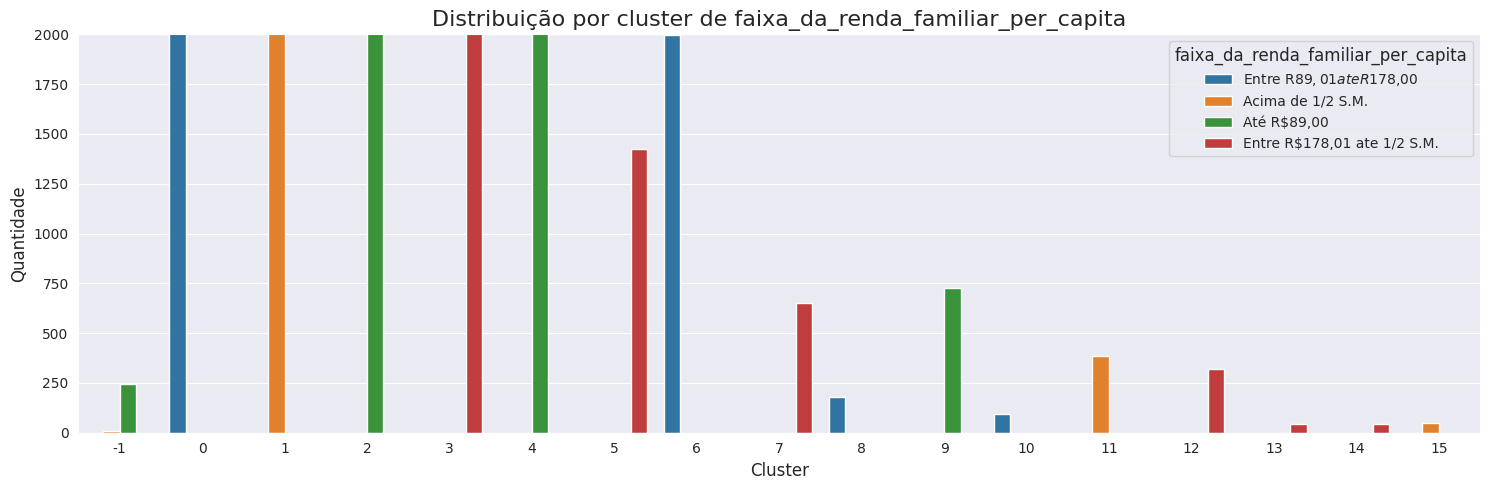

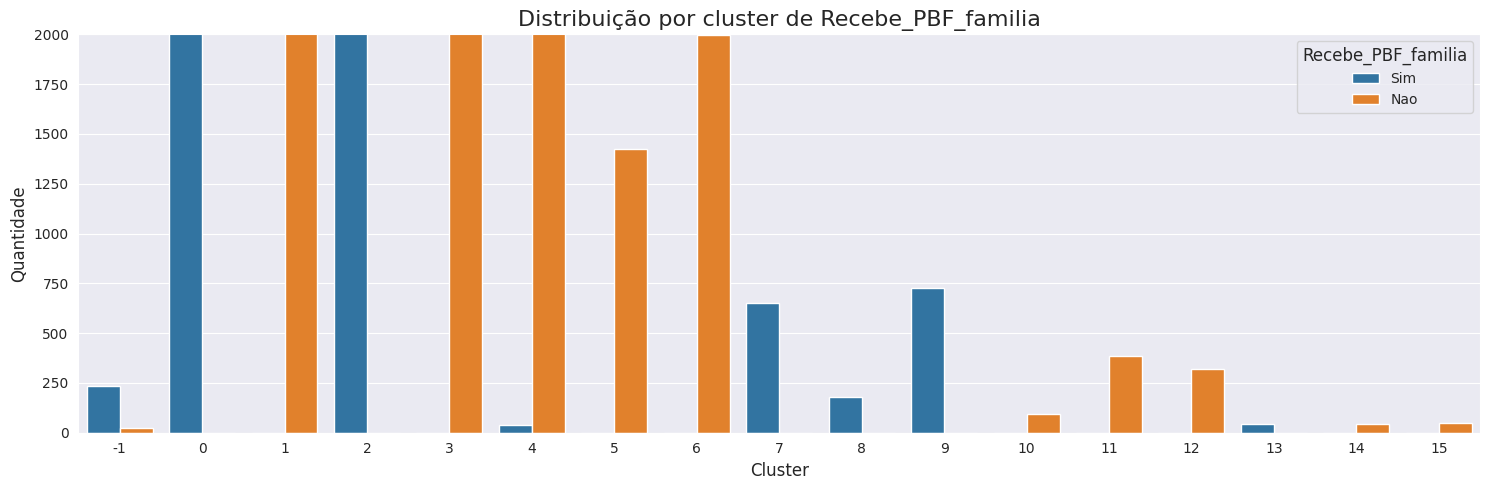

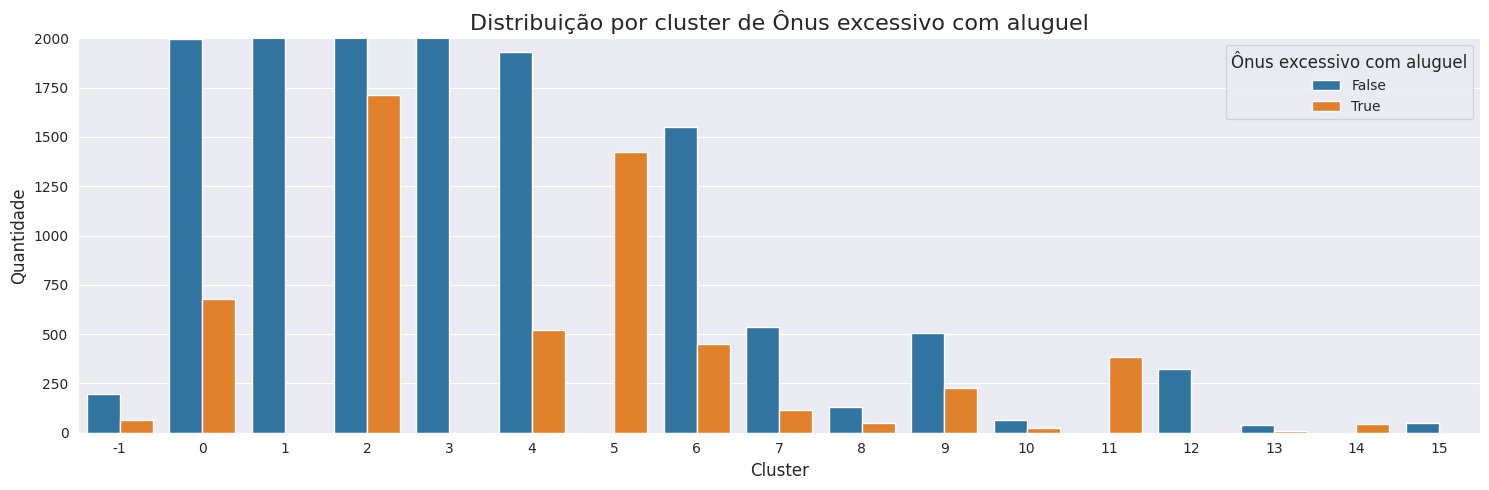

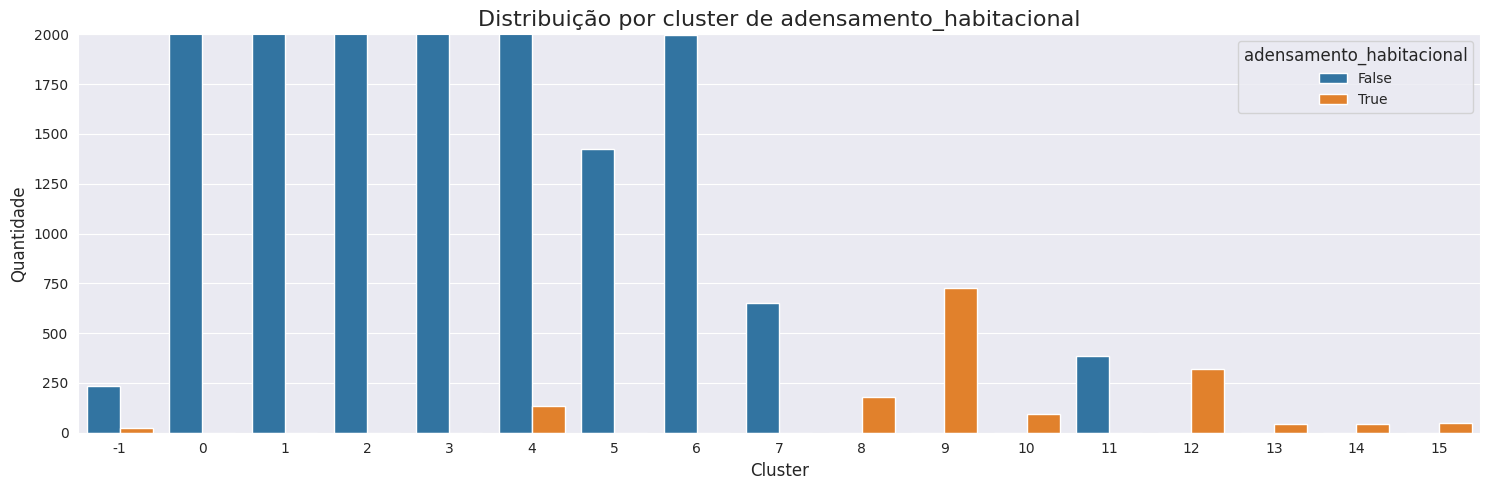

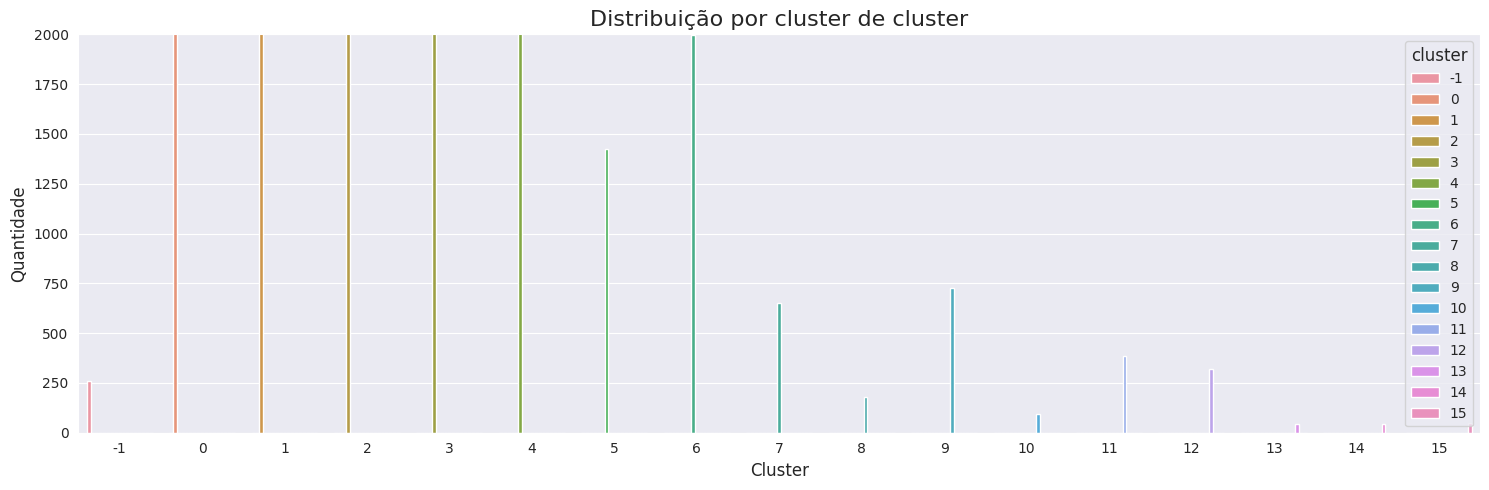

In [ ]:
for col in dados_cat_vf_analise:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = dados_cat_vf_analise)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    ax.set_ylim([0, 2000]) # define o valor mínimo e máximo da escala do eixo y
    plt.tight_layout()
    plt.show()


### Agregando Clusters de Vulnerabilidade da familia nos dados Tratados

In [ ]:
dados_tratados_clusterizados = dados_tratados_cp.copy()

dados_tratados_clusterizados["Vulnerabilidade_Familia"] = cluster_dbscan

## **DBSCAN** com MCA - Dados da vulnerabilidade residencial

---



#### Reducao de dimensionalidade com MCA (Mltiple Correpondence Analysis) dados Categoricos

In [ ]:
# Instanciar o objeto MCA
mca = MCA(n_components=15, copy=True, check_input=True,
          engine='sklearn', random_state=0)

mca.fit(dados_cat_encoded_vr)

MCA(n_components=15, random_state=0)

In [ ]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.439        18.80%                     18.80%
1              0.339        14.52%                     33.31%
2              0.334        14.33%                     47.64%
3              0.332        14.25%                     61.89%
4              0.330        14.13%                     76.03%
5              0.327        14.03%                     90.06%
6              0.232         9.94%                    100.00%
7              0.000         0.00%                    100.00%
8              0.000         0.00%                    100.00%

In [ ]:
# Reduzindo as dimensoes dos dados
mca = MCA(n_components=6, copy=True, check_input=True,
          engine='sklearn', random_state=0)

mca = mca.fit(dados_cat_encoded_vr)

In [ ]:
data_mca = mca.row_coordinates(dados_cat_encoded_vr)

In [ ]:
data_mca.head()

0         1         2         3         4         5
0 -0.496173 -0.024078  0.024790 -0.053051  0.049418  0.053741
2 -0.496173 -0.024078  0.024790 -0.053051  0.049418  0.053741
3  0.290182  0.061548 -0.095619  0.080254 -0.088006 -0.126867
4  0.290182  0.061548 -0.095619  0.080254 -0.088006 -0.126867
5 -0.496173 -0.024078  0.024790 -0.053051  0.049418  0.053741

### aplicando DBSCAN para os componentes principais da infraestrutura residencial

Metricas de similaridade para o DBSCAN:

'manhattan', 'chebyshev', 'haversine', 'euclidean', 'hamming', 'minkowski', 'wminkowski', 'seuclidean', 'nan_euclidean', 'l2', 'cosine', 'l1', 'canberra', 'braycurtis', 'cityblock'

In [ ]:
# Cria um modelo DBSCAN com os parâmetros apropriados
dbscan = DBSCAN(eps=0.30, min_samples=45, metric='canberra')

In [ ]:
# Aplica o modelo aos dados
dbscan.fit(data_mca)

DBSCAN(eps=0.3, metric='canberra', min_samples=45)

In [ ]:
# Obtém as labels dos clusters
cluster_dbscan2 = dbscan.labels_

In [ ]:
# Para calcular o coeficiente de silhueta, você deve fornecer os dados originais e os rótulos dos clusters.
score = silhouette_score(data_mca, cluster_dbscan2)
print("Silhouette score:", score)


Silhouette score: 0.9899457233309291


Silhouette score: 0.9948662451455703 - Com dados encoded - DBSCAN(eps=0.5, min_samples=35, metric='canberra') - Gerou 8 agrupamentos e melhorou o score em relação a distancia de manhattan.

Silhouette score: 0.9942570389300429 - Com dados encoded - DBSCAN(eps=0.5, min_samples=35, metric='manhattan') - Gerou 8 agrupamentos e melhorou o score.

Silhouette score: 0.991677525100187 - Com dados brutos da v_residencia - DBSCAN(eps=0.9, min_samples=35, metric='manhattan') - Gerou 9 agrupamentos.

In [ ]:
# Cria um dataframe com as variáveis categóricas originais
dados_cat_dbscan_mca = pd.DataFrame(v_residencia).copy()

# Adiciona uma coluna ao dataframe com as labels dos clusters gerados pelo k-mode
dados_cat_dbscan_mca['cluster'] = cluster_dbscan2

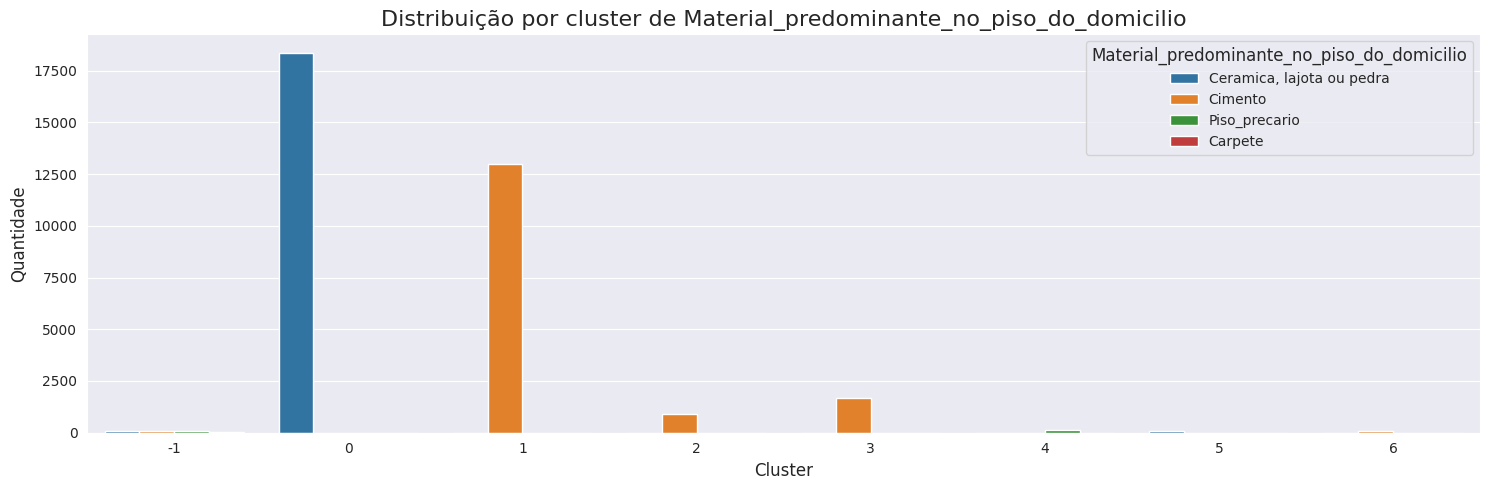

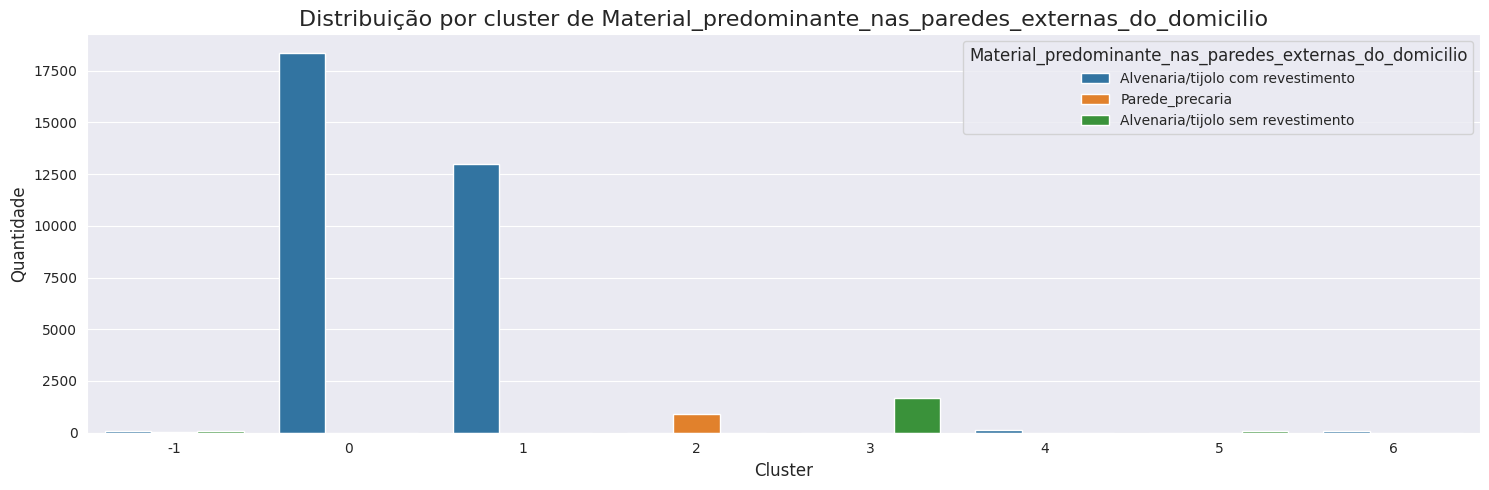

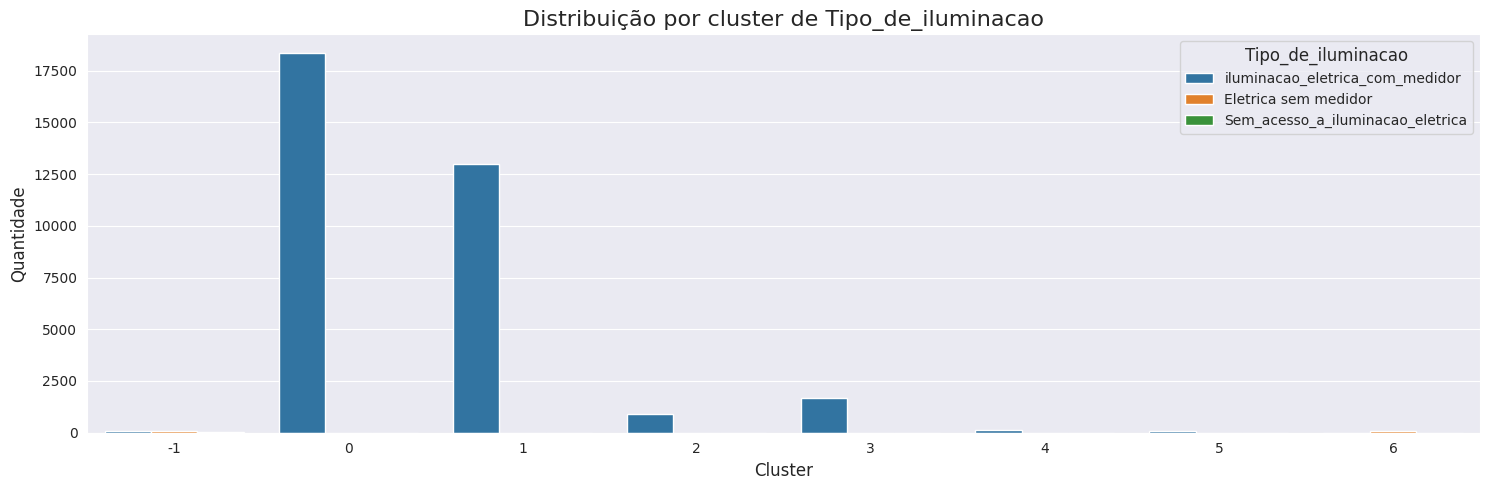

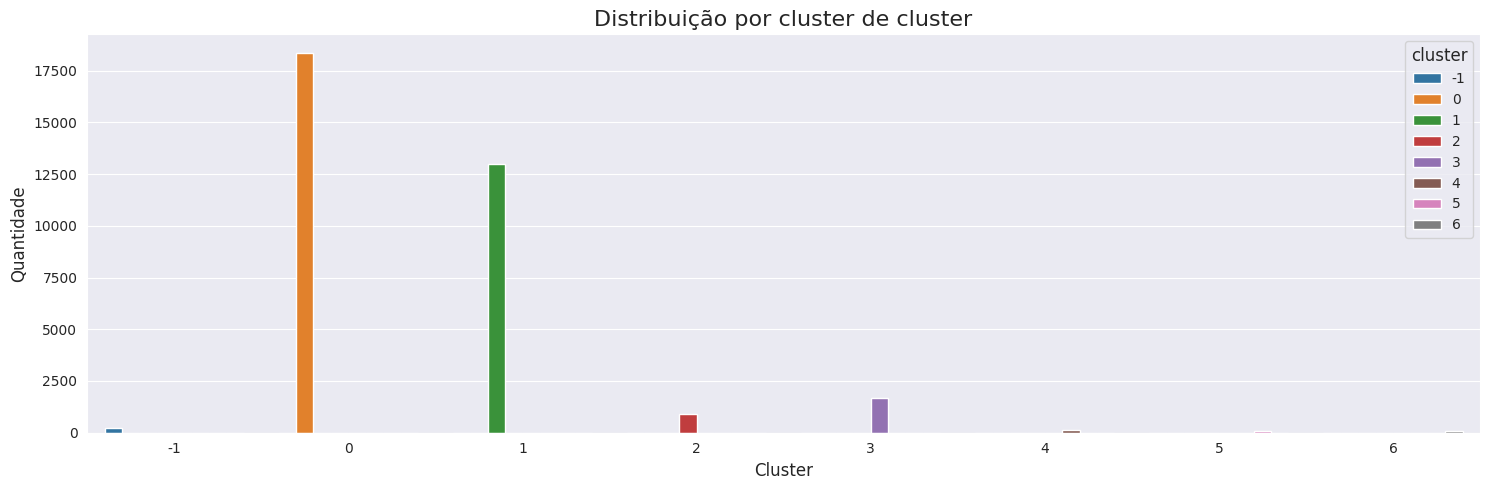

In [ ]:

for col in dados_cat_dbscan_mca:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = dados_cat_dbscan_mca)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()


Limitando as escalas para verificar os valores menores que não ficam visiveis devidos as distorções do gráfico por conta da concentração de valores em determinados clusters

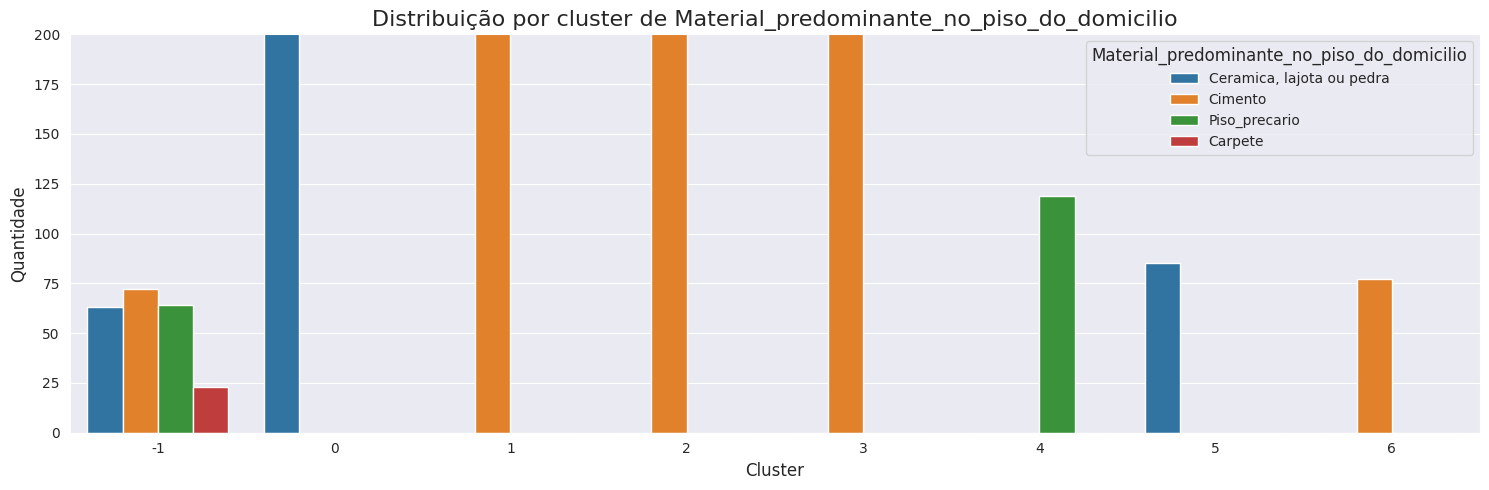

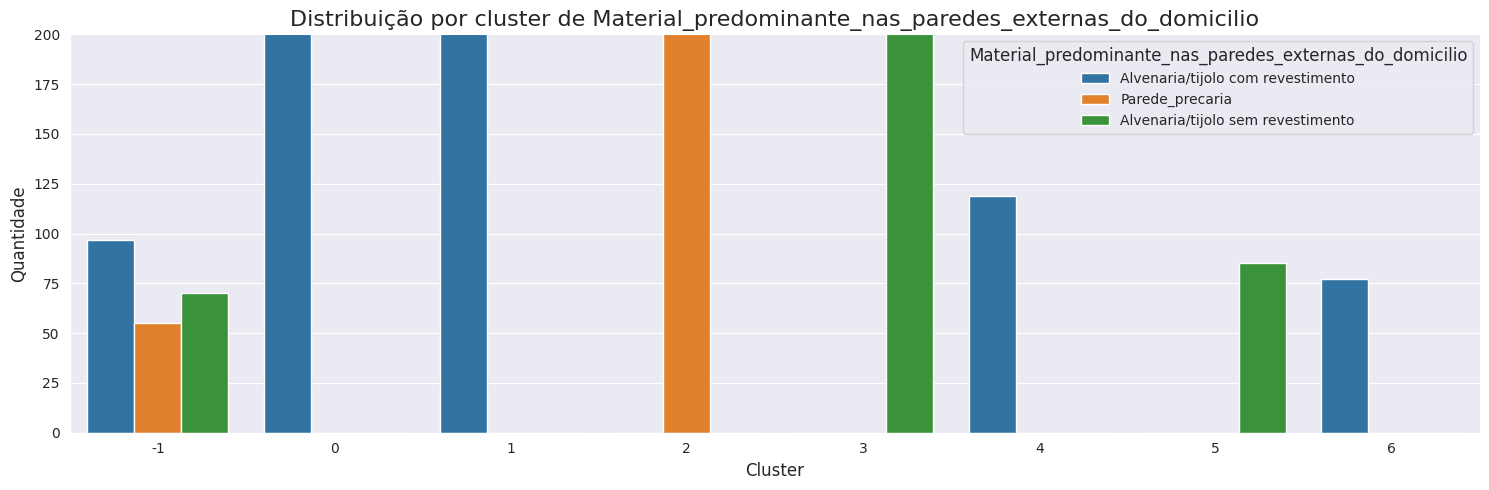

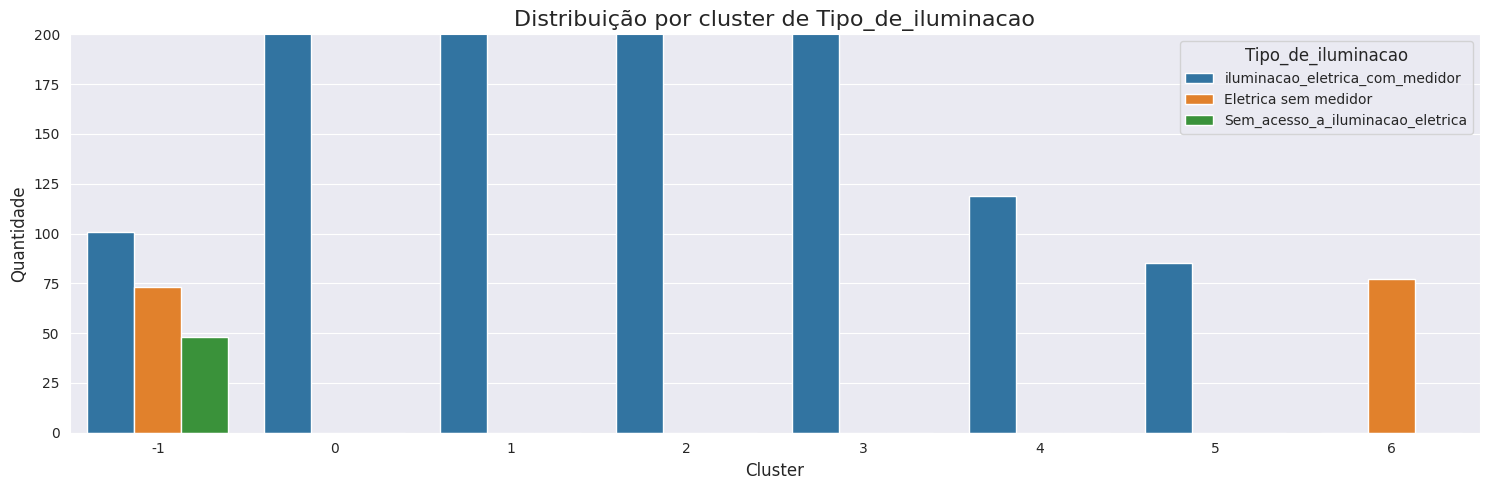

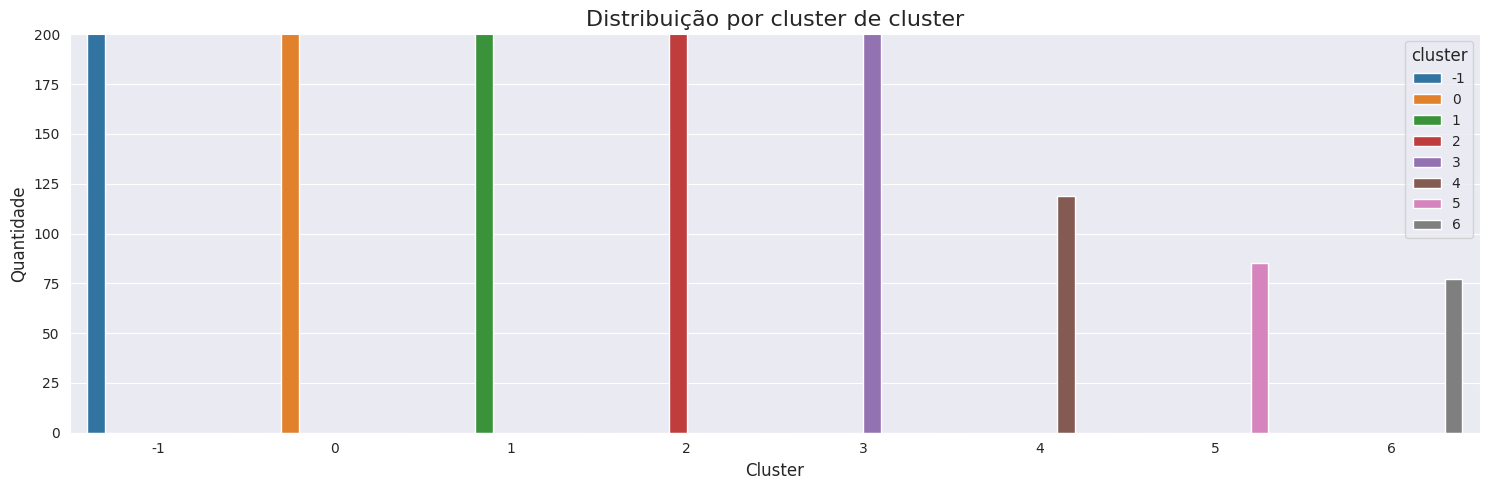

In [ ]:
for col in dados_cat_dbscan_mca:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = dados_cat_dbscan_mca)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    ax.set_ylim([0, 200]) # define o valor mínimo e máximo da escala do eixo y
    plt.tight_layout()
    plt.show()


### Agregando Clusters de Vulnerabilidade da Residencia nos dados Tratados

In [ ]:
dados_tratados_clusterizados["Vulnerabilidade_Residencia"] = cluster_dbscan2

## **DBSCAN** com MCA - Dados de saneamento

---



#### Reducao de dimensionalidade com MCA (Mltiple Correpondence Analysis) dados Categoricos

In [ ]:
# Instanciar o objeto MCA
mca1 = MCA(n_components=18, n_iter=3, copy=True, check_input=True,
          engine='sklearn', random_state=0)

mca1.fit(dados_encoded_vs)

MCA(n_components=18, n_iter=3, random_state=0)

In [ ]:
mca1.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.596        36.49%                     36.49%
1              0.262        16.03%                     52.52%
2              0.237        14.49%                     67.01%
3              0.214        13.09%                     80.09%
4              0.133         8.15%                     88.24%
5              0.123         7.50%                     95.74%
6              0.070         4.26%                    100.00%
7              0.000         0.00%                    100.00%
8              0.000         0.00%                    100.00%
9              0.000         0.00%                    100.00%

Analisando a distribuicao e a relacao dos dados

In [ ]:
# Reduzindo as dimensoes dos dados
mca = MCA(n_components=6, n_iter=3, copy=True, check_input=True,
          engine='sklearn', random_state=0)

mca.fit(dados_encoded_vs)

MCA(n_components=6, n_iter=3, random_state=0)

In [ ]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.596        36.49%                     36.49%
1              0.262        16.03%                     52.52%
2              0.237        14.49%                     67.01%
3              0.214        13.09%                     80.09%
4              0.133         8.15%                     88.24%
5              0.123         7.50%                     95.74%

In [ ]:
data_mca2 = mca.row_coordinates(dados_encoded_vs)

In [ ]:
data_mca2.head()

0         1         2         3         4         5
0  0.804479 -0.151155  0.722037 -1.072592 -0.419829 -0.643631
2  0.804479 -0.151155  0.722037 -1.072592 -0.419829 -0.643631
3 -0.373141 -0.089387 -0.024567  0.102152  0.056803  0.041024
4  2.932811  0.441258 -1.298761  0.165587  0.576902  0.766018
5  0.212490  0.210946  0.019004 -0.453615  0.560452 -0.786402

### aplicando DBSCAN para os componentes principais dnos dados de saneamento

Metricas de similaridade para o DBSCAN:

'yule', 'mahalanobis', 'manhattan', 'precomputed', 'chebyshev', 'correlation', 'sokalmichener', 'haversine', 'jaccard', 'euclidean', 'hamming', 'russellrao', 'matching', 'dice', 'minkowski', 'sokalsneath', 'wminkowski', 'seuclidean', 'nan_euclidean', 'rogerstanimoto', 'l2', 'cosine', 'l1', 'kulsinski', 'canberra', 'braycurtis', 'sqeuclidean', 'cityblock'

In [ ]:
# Cria um modelo DBSCAN com os parâmetros apropriados
dbscan = DBSCAN(eps=0.5, min_samples=150, metric='canberra')

In [ ]:
# Aplica o modelo aos dados
dbscan.fit(data_mca2)

DBSCAN(metric='canberra', min_samples=150)

In [ ]:
# Obtém as labels dos clusters
cluster_dbscan3 = dbscan.labels_

In [ ]:
# Para calcular o coeficiente de silhueta, você deve fornecer os dados originais e os rótulos dos clusters.
score = silhouette_score(data_mca2, cluster_dbscan3)
print("Silhouette score:", score)


Silhouette score: 0.9363808918245299


Escolhi perder precisao para criar uma quantidade de clusters mais reduzido de  clusters

Silhouette score: 0.9862595595272523 - dados dps da criação de novas features - DBSCAN(eps=0.9, min_samples=35, metric='camberra') - 28 agrupamentos

Silhouette score: 0.9862595595272523 - dados dps da criação de novas features - DBSCAN(eps=0.9, min_samples=35, metric='manhattan') - 32 agrupamentos

Silhouette score: 0.9489294946872495 - Dados brutos v_saneamento - DBSCAN(eps=0.9, min_samples=35, metric='manhattan') - produziu 32 agrupamentos

In [ ]:
# Cria um dataframe com as variáveis categóricas originais
dados_cat_dbscan_mca2 = pd.DataFrame(v_saneamento).copy()

# Adiciona uma coluna ao dataframe com as labels dos clusters gerados pelo k-mode
dados_cat_dbscan_mca2['cluster'] = cluster_dbscan3

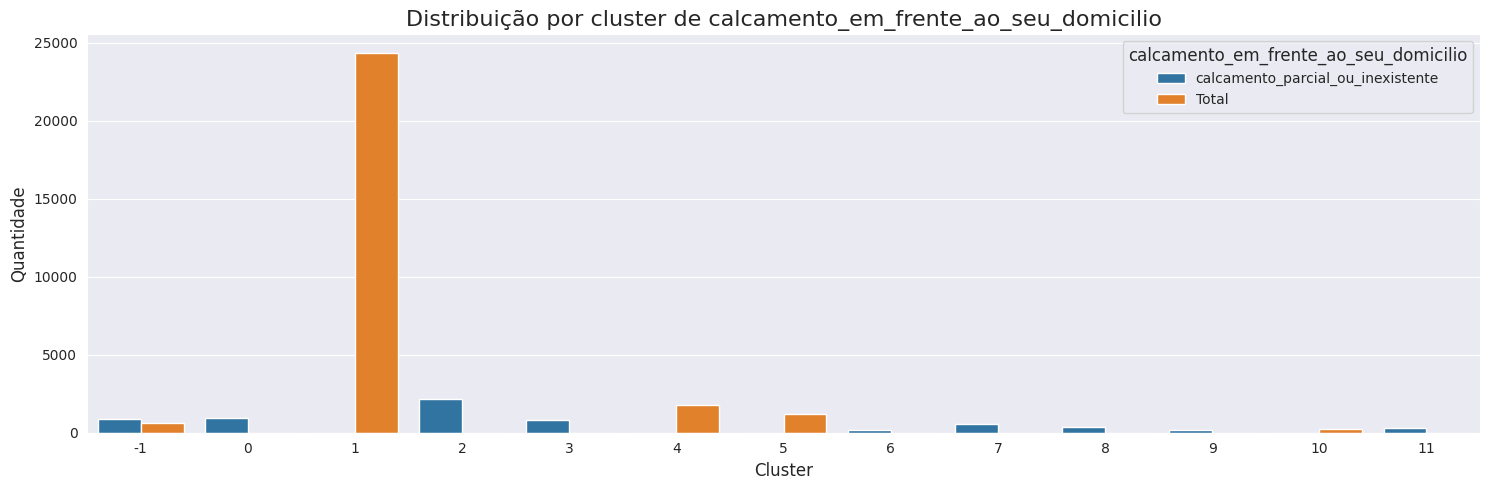

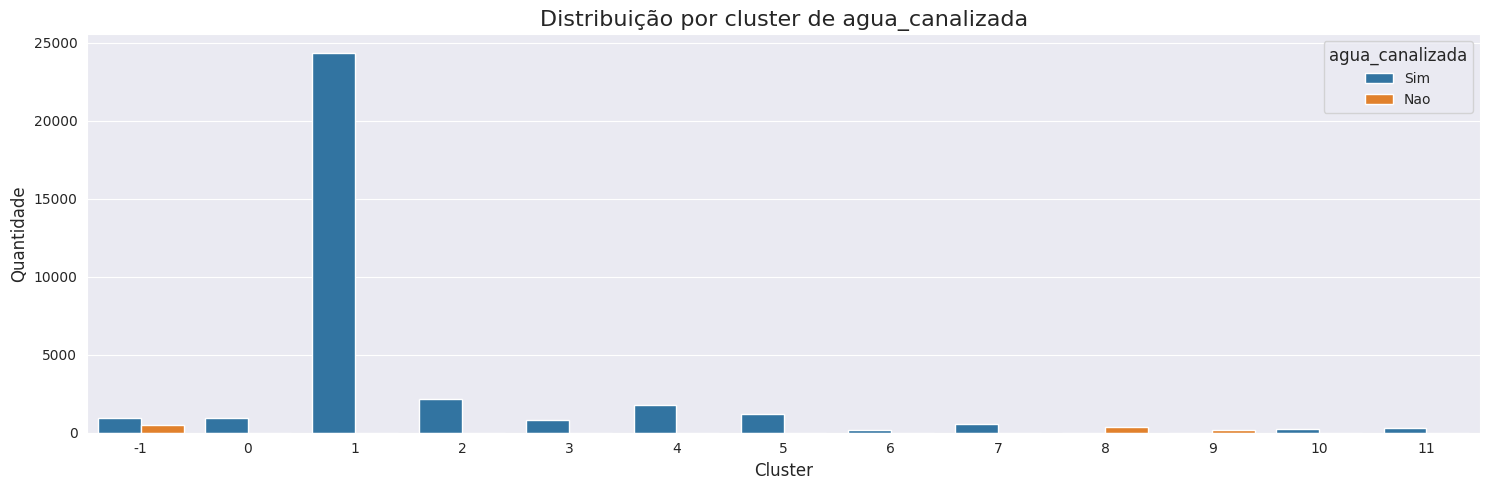

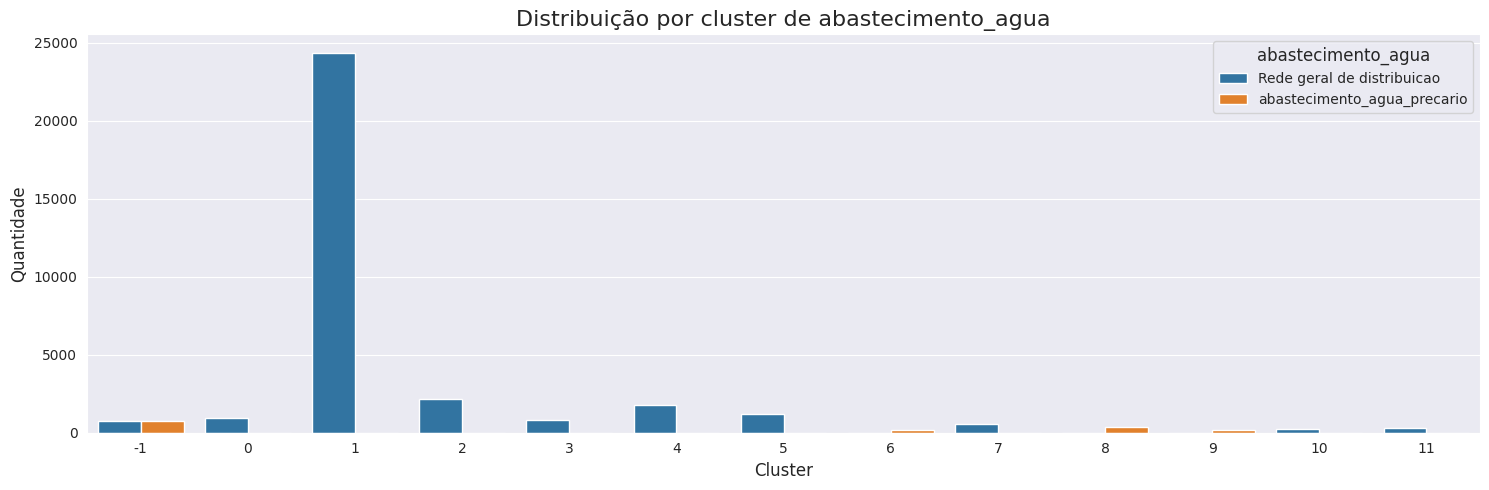

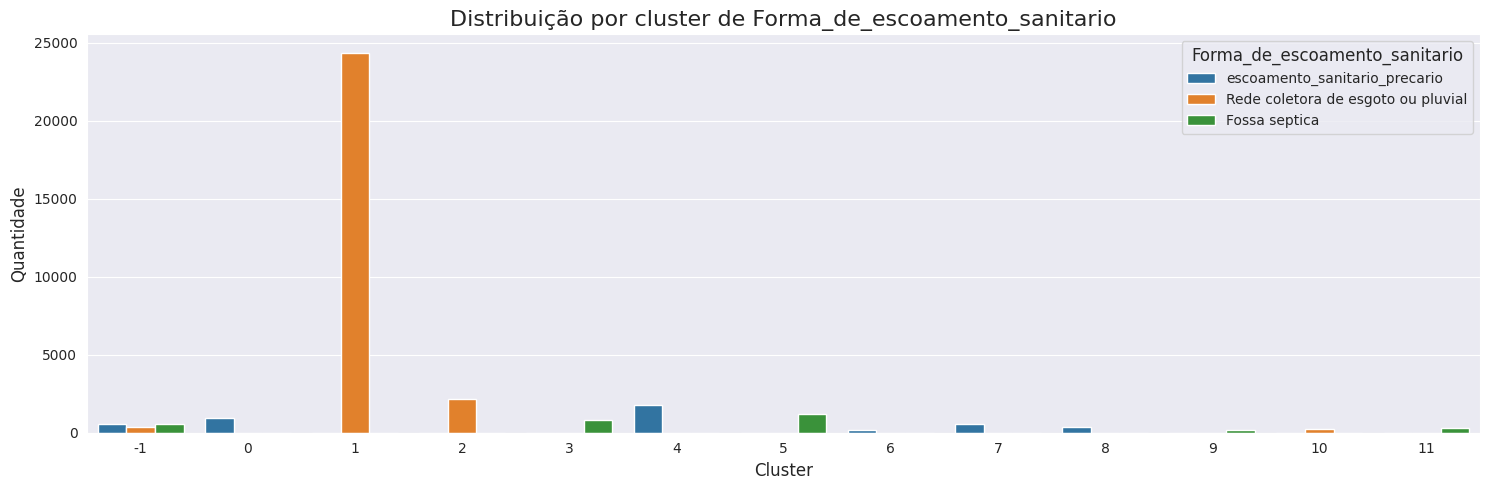

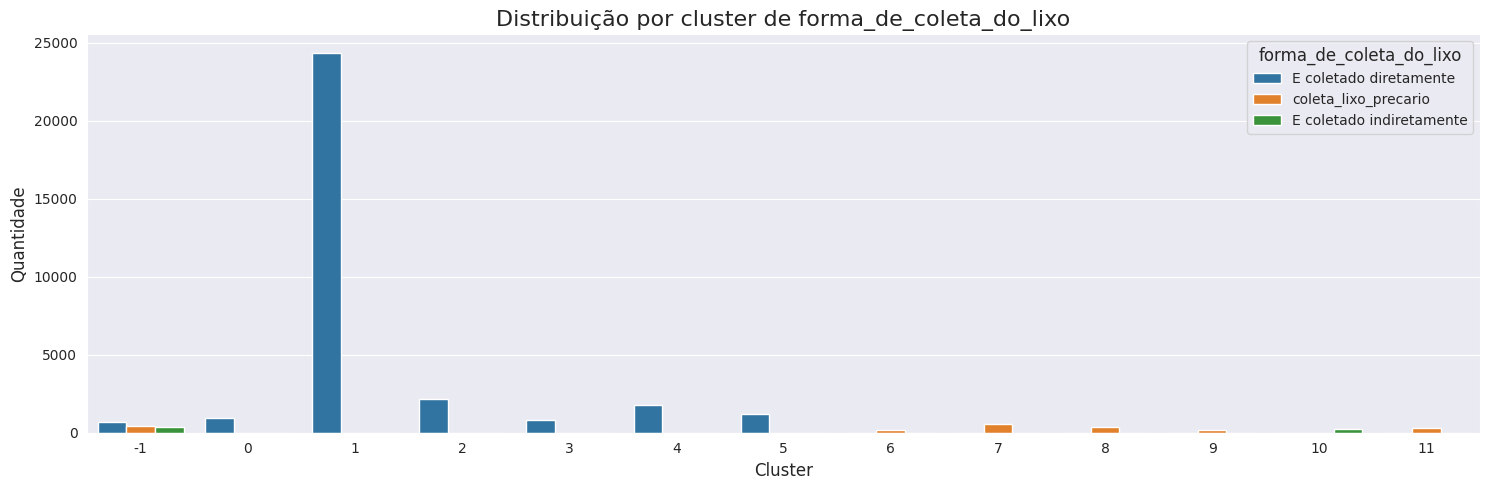

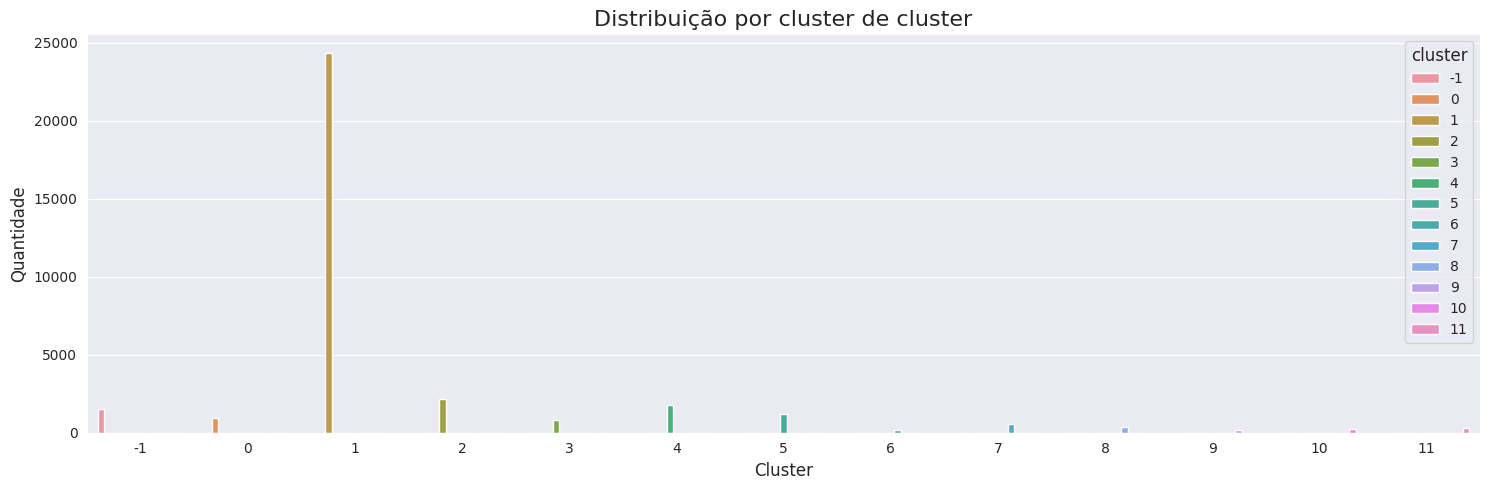

In [ ]:

for col in dados_cat_dbscan_mca2:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = dados_cat_dbscan_mca2)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()


Limitando as escalas para verificar os valores menores que não ficam visiveis devidos as distorções do gráfico por conta da concentração de valores em determinados clusters

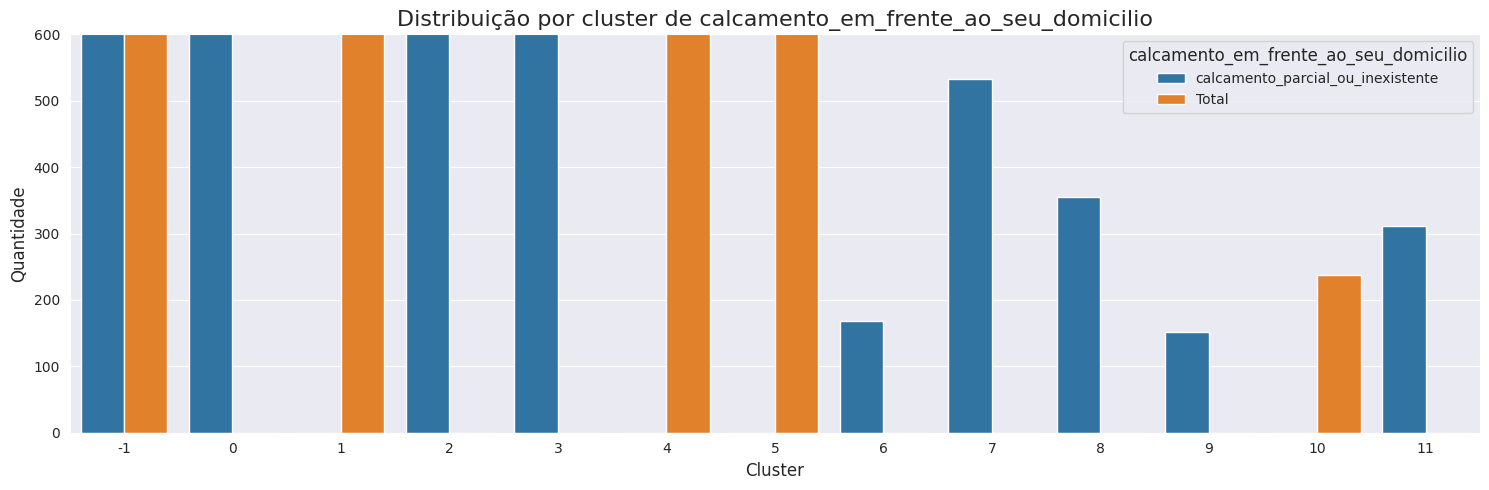

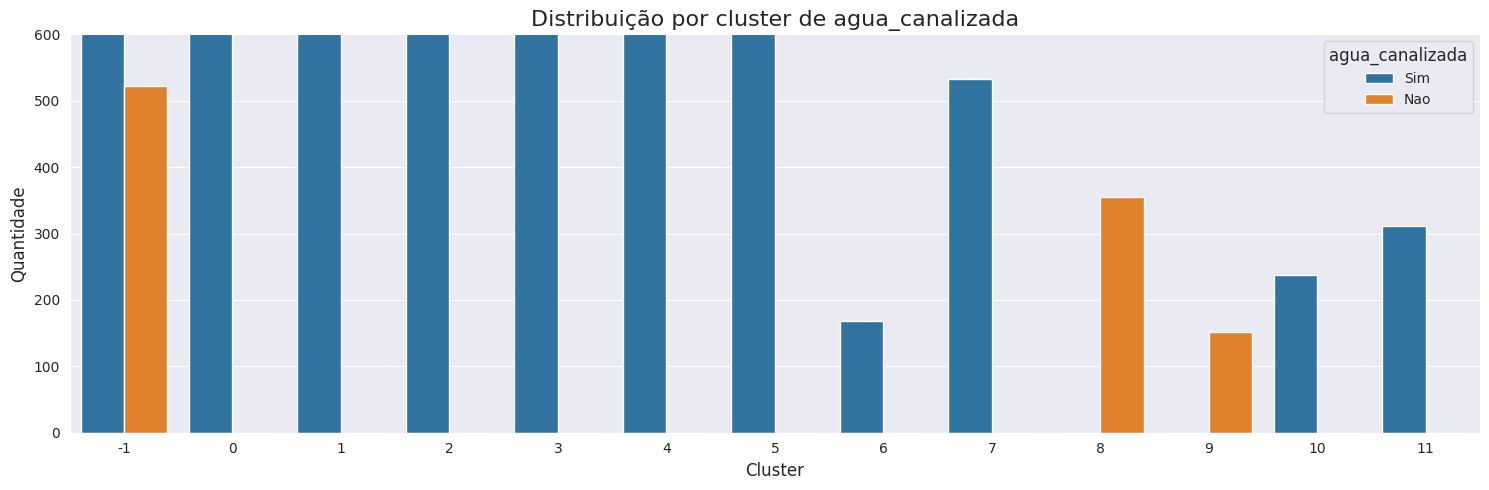

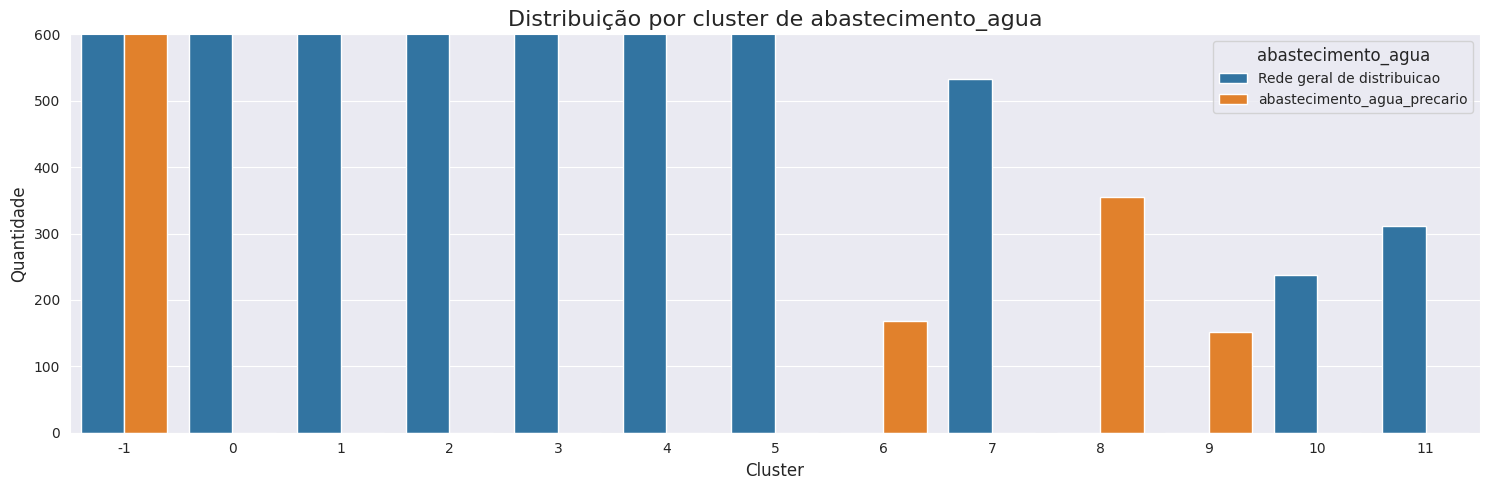

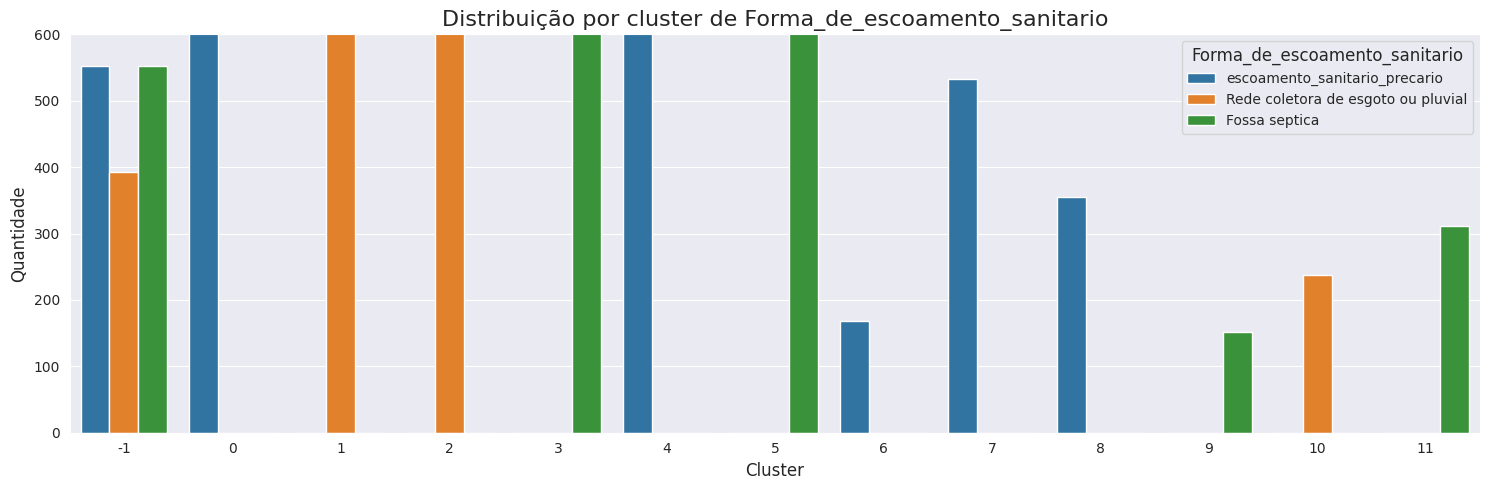

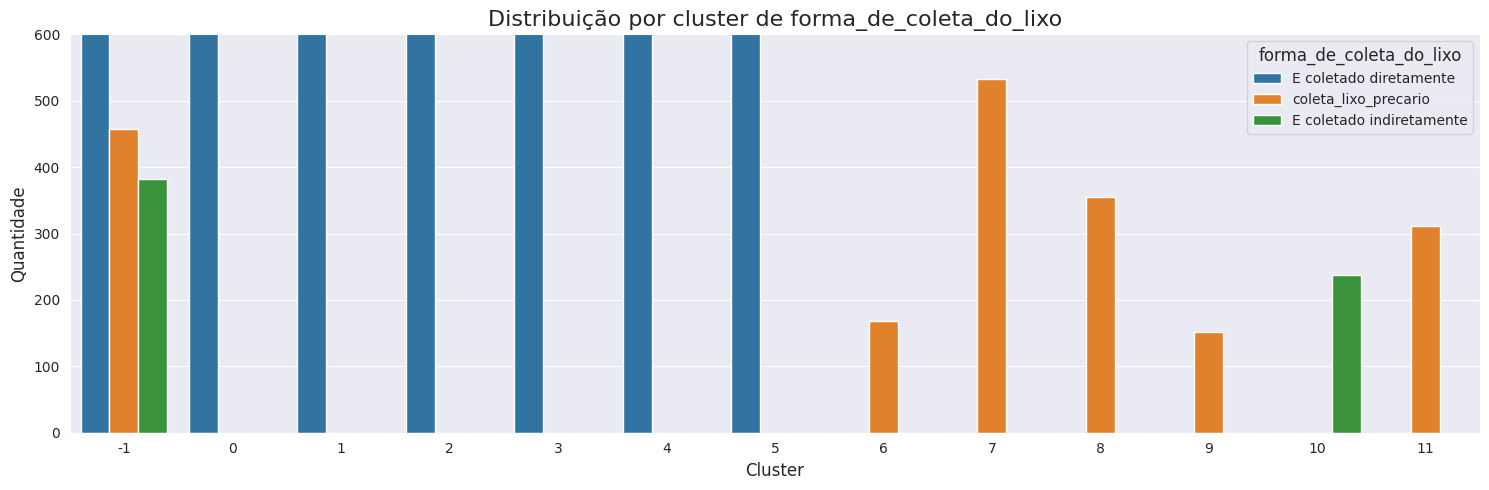

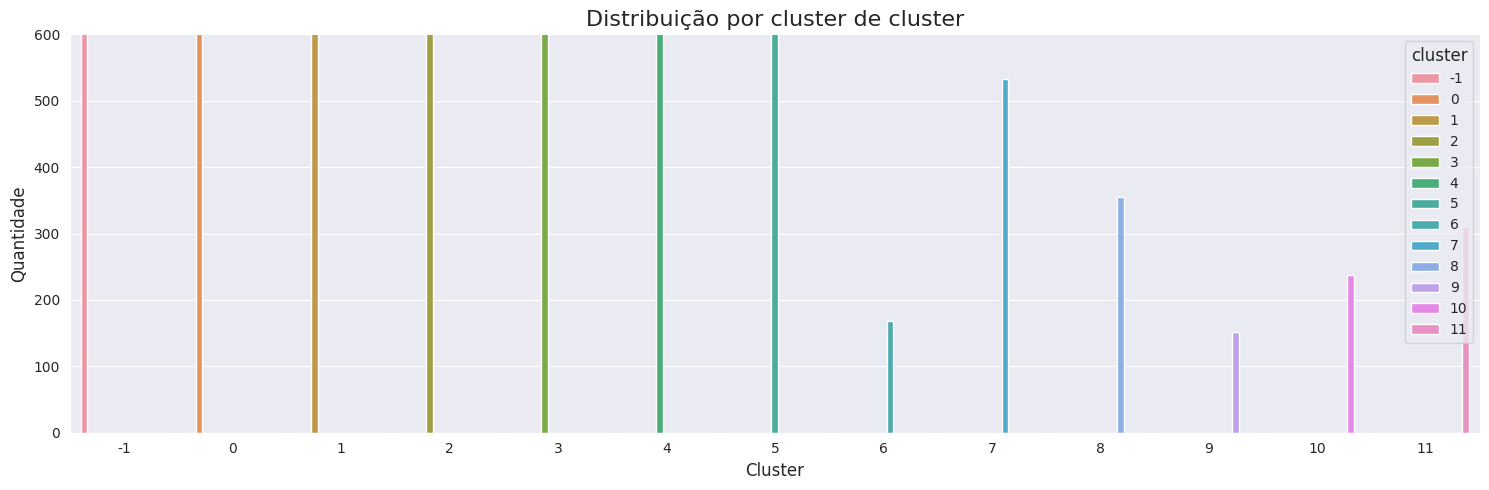

In [ ]:
for col in dados_cat_dbscan_mca2:
    plt.subplots(figsize = (15,5))
    ax = sns.countplot(x='cluster',hue=col, data = dados_cat_dbscan_mca2)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    ax.set_ylim([0, 600]) # define o valor mínimo e máximo da escala do eixo y
    plt.tight_layout()
    plt.show()


### Agregando Clusters de Vulnerabilidade de Saneamento nos dados Tratados

In [ ]:
dados_tratados_clusterizados["Vulnerabilidade_Saneamento"] = cluster_dbscan3

---

# SALVAR DATAFRAME

---

In [ ]:
dados_tratados_clusterizados.to_csv('Cad_Unico_dados_tratados_clusterizados.csv', index=False)

---

# ANALISE FINAL

---

Importando dados clusterizados para analise - Salvei o arquivo e anexei no drive para nao ficar executando o codigo por completo para analisar a clusterizacao.

In [ ]:
# Indicar o caminho para o arquivo da base de dados clusterizados no drive.
arquivo = '/content/drive/MyDrive/PROJETO INTEGRADO/Notebook_PUC-MINAS_JOAO_VICTOR_HOLANDA/Cad_Unico_dados_tratados_clusterizados.csv'

#lendo o arquivo csv e salvando na variavel dados
dados_clusterizados = pd.read_csv(arquivo)

#visualizando a base de dados
print('Tamanho da base de dados: ', dados_clusterizados.shape)
dados_clusterizados.head()


Tamanho da base de dados:  (34432, 20)


ID_Familiar Localização Nome_da_localidade  \
0            1    DISTRITO           JAIBARAS   
1            3    DISTRITO           BILHEIRA   
2            4    DISTRITO          TAPERUABA   
3            5    DISTRITO           CARACARA   
4            6        SEDE           COHAB II   

  faixa_da_renda_familiar_per_capita Recebe_PBF_familia Situacao_do_domicilio  \
0         Entre R$89,01 ate R$178,00                Sim                Rurais   
1                  Acima de 1/2 S.M.                Nao                Rurais   
2                        Até R$89,00                Sim               Urbanas   
3        Entre R$178,01 ate 1/2 S.M.                Nao                Rurais   
4         Entre R$89,01 ate R$178,00                Sim               Urbanas   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
1                  Ceramica, lajota ou pedra   
2                                    Cimento   
3                                    Cimento   
4                  Ceramica, lajota ou pedra   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
1                  Alvenaria/tijolo com revestimento                  Sim   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                  Alvenaria/tijolo com revestimento                  Sim   

           abastecimento_agua       Forma_de_escoamento_sanitario  \
0  Rede geral de distribuicao                    Fossa rudimentar   
1  Rede geral de distribuicao                    Fossa rudimentar   
2  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
3                    Cisterna                       Fossa septica   
4  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   

                             forma_de_coleta_do_lixo  \
0                             E coletado diretamente   
1                             E coletado diretamente   
2                             E coletado diretamente   
3  E jogado em terreno baldio ou logradouro (rua,...   
4                             E coletado diretamente   

             Tipo_de_iluminacao calcamento_em_frente_ao_seu_domicilio  \
0  Eletrica com medidor proprio                            Nao existe   
1  Eletrica com medidor proprio                            Nao existe   
2  Eletrica com medidor proprio                                 Total   
3  Eletrica com medidor proprio                            Nao existe   
4  Eletrica com medidor proprio                               Parcial   

   Ônus excessivo com aluguel  adensamento_habitacional  \
0                       False                     False   
1                       False                     False   
2                       False                     False   
3                       False                     False   
4                        True                     False   

   Comprometimento_renda_despesas  Vulnerabilidade_Familia  \
0                        1.781955                        0   
1                        0.180361                        1   
2                       15.133333                        2   
3                        0.370000                        3   
4                        1.066176                        0   

   Vulnerabilidade_Residencia  Vulnerabilidade_Saneamento  
0                           0                           0  
1                           0                           0  
2                           1                           1  
3                           1                          -1  
4                           0                           2

## Visualização mais detalhada

### Vulnerabilidade_Familia

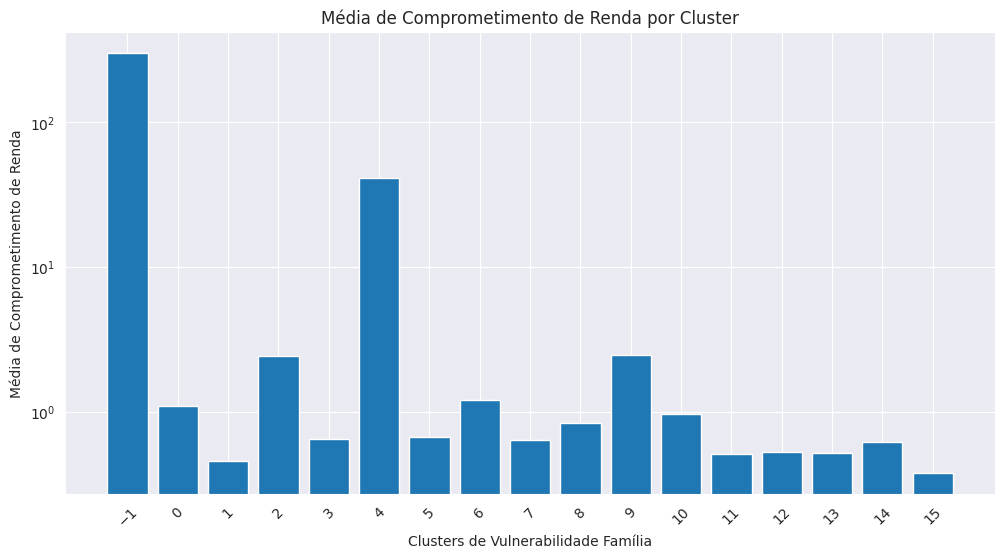

In [ ]:
import numpy as np

# Calcular a média dos valores do comprometimento da renda para cada cluster
cluster_means = dados_clusterizados.groupby('Vulnerabilidade_Familia').mean()

# Ordenar os clusters pela média de comprometimento de renda em ordem decrescente
sorted_clusters = cluster_means.sort_values(by='Comprometimento_renda_despesas', ascending=False)

# Plotar um gráfico de barras com as médias de comprometimento de renda por cluster
plt.figure(figsize=(12, 6))
plt.bar(sorted_clusters.index, sorted_clusters['Comprometimento_renda_despesas'])
plt.xlabel('Clusters de Vulnerabilidade Família')
plt.ylabel('Média de Comprometimento de Renda')
plt.title('Média de Comprometimento de Renda por Cluster')
plt.xticks(rotation=45)

# Aplicar escala logarítmica no eixo y para evitar distorcao do grafico pelo cluster -1
plt.yscale('log')
plt.yticks([10**i for i in range(int(np.log10(sorted_clusters['Comprometimento_renda_despesas'].min())),
                                 int(np.log10(sorted_clusters['Comprometimento_renda_despesas'].max()))+1)])

# Configurar a escala do eixo X com números inteiros de -1 a 15
plt.xticks(range(-1, 16))

plt.show()

In [ ]:
sorted_clusters.T

Vulnerabilidade_Familia                  -1             4             9   \
ID_Familiar                     18094.860465  21040.500611  15749.211248   
Ônus excessivo com aluguel          0.248062      0.212393      0.308642   
adensamento_habitacional            0.096899      0.055442      1.000000   
Comprometimento_renda_despesas    300.490657     41.331589      2.472936   
Vulnerabilidade_Residencia          0.786822      0.638402      0.861454   
Vulnerabilidade_Saneamento          1.585271      1.573991      1.831276   

Vulnerabilidade_Familia                   2             6             0   \
ID_Familiar                     15872.880963  19104.983492  16452.452265   
Ônus excessivo com aluguel          0.194684      0.224112      0.253089   
adensamento_habitacional            0.000114      0.000000      0.000000   
Comprometimento_renda_despesas      2.436581      1.201189      1.088233   
Vulnerabilidade_Residencia          0.795888      0.578789      0.566455   
Vulnerabilidade_Saneamento          1.873353      1.616808      1.639835   

Vulnerabilidade_Familia                   10            8             5   \
ID_Familiar                     17083.673913  14870.441341  23227.163624   
Ônus excessivo com aluguel          0.271739      0.279330      1.000000   
adensamento_habitacional            1.000000      1.000000      0.000000   
Comprometimento_renda_despesas      0.967957      0.838957      0.670898   
Vulnerabilidade_Residencia          0.521739      0.826816      0.221208   
Vulnerabilidade_Saneamento          1.445652      1.737430      1.221208   

Vulnerabilidade_Familia                   3             7             14  \
ID_Familiar                     18796.057903  14304.693846  18957.047619   
Ônus excessivo com aluguel          0.000000      0.175385      1.000000   
adensamento_habitacional            0.000000      0.000000      1.000000   
Comprometimento_renda_despesas      0.643847      0.640750      0.615636   
Vulnerabilidade_Residencia          0.528438      0.641538      0.261905   
Vulnerabilidade_Saneamento          1.604043      1.720000      1.047619   

Vulnerabilidade_Familia                   12            13            11  \
ID_Familiar                     19898.735202  14282.622222  27309.657963   
Ônus excessivo com aluguel          0.000000      0.177778      1.000000   
adensamento_habitacional            1.000000      1.000000      0.000000   
Comprometimento_renda_despesas      0.526361      0.518005      0.514377   
Vulnerabilidade_Residencia          0.644860      0.688889      0.201044   
Vulnerabilidade_Saneamento          1.647975      1.244444      1.057441   

Vulnerabilidade_Familia                   1             15  
ID_Familiar                     22952.249327  19052.254902  
Ônus excessivo com aluguel          0.000000      0.000000  
adensamento_habitacional            0.000000      1.000000  
Comprometimento_renda_despesas      0.456565      0.375509  
Vulnerabilidade_Residencia          0.549776      0.509804  
Vulnerabilidade_Saneamento          1.640538      1.705882

Com base na análise dos dados fornecidos, é possível observar que o valor do comprometimento de renda das famílias varia entre 0.361538 e 322.500962. Pode-se notar que quanto maior o valor de comprometimento de renda, maior é a vulnerabilidade da família.

Algumas insights que podem ser obtidos a partir dessa análise são:

1. Famílias com valores de comprometimento de renda mais altos estão mais propensas a enfrentar dificuldades financeiras e possivelmente têm uma menor capacidade de arcar com suas despesas mensais.

2. É importante identificar e oferecer suporte a famílias com um alto comprometimento de renda, pois elas estão mais suscetíveis a situações de vulnerabilidade, como dificuldades para pagar suas contas e suprir suas necessidades básicas.

3. Políticas públicas e programas sociais podem ser direcionados a famílias com maior comprometimento de renda, visando fornecer assistência financeira, reduzir o impacto das despesas e promover a inclusão social.

4. Os clusters **-1, 4, 9, 2, 6, 0 e 10** possuem valores de comprometimento de renda superiores a 1, exceto o 10 que fica bem proximo. Isso significa que os gastos das famílias nesses clusters estão excedendo sua renda total, o que resulta em um comprometimento de renda acima de 100%.

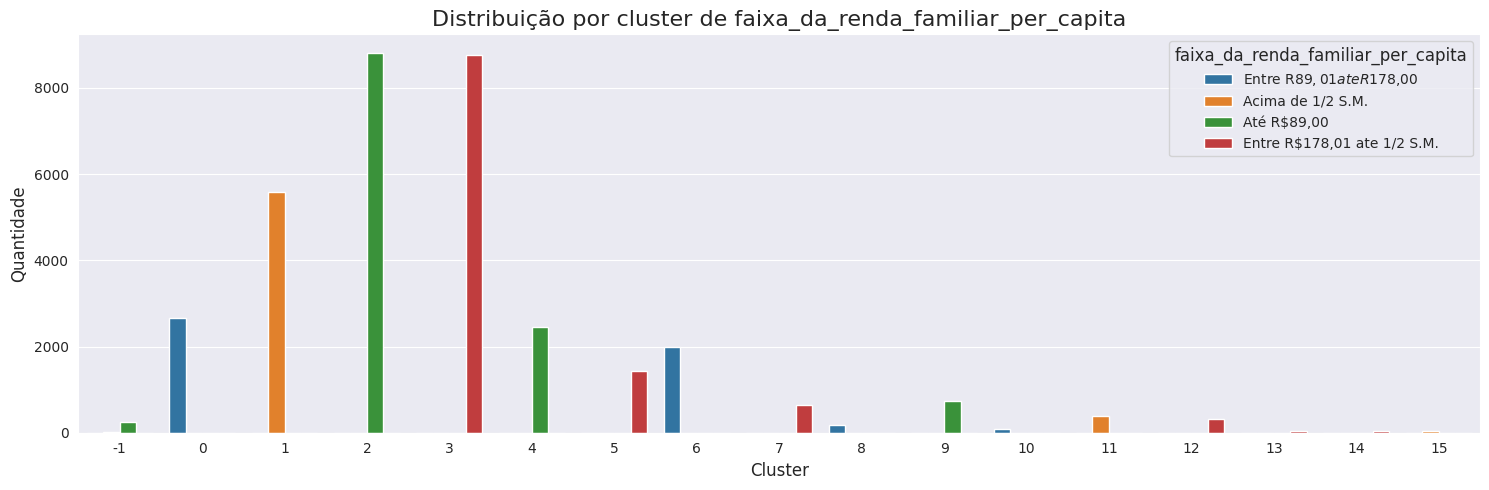

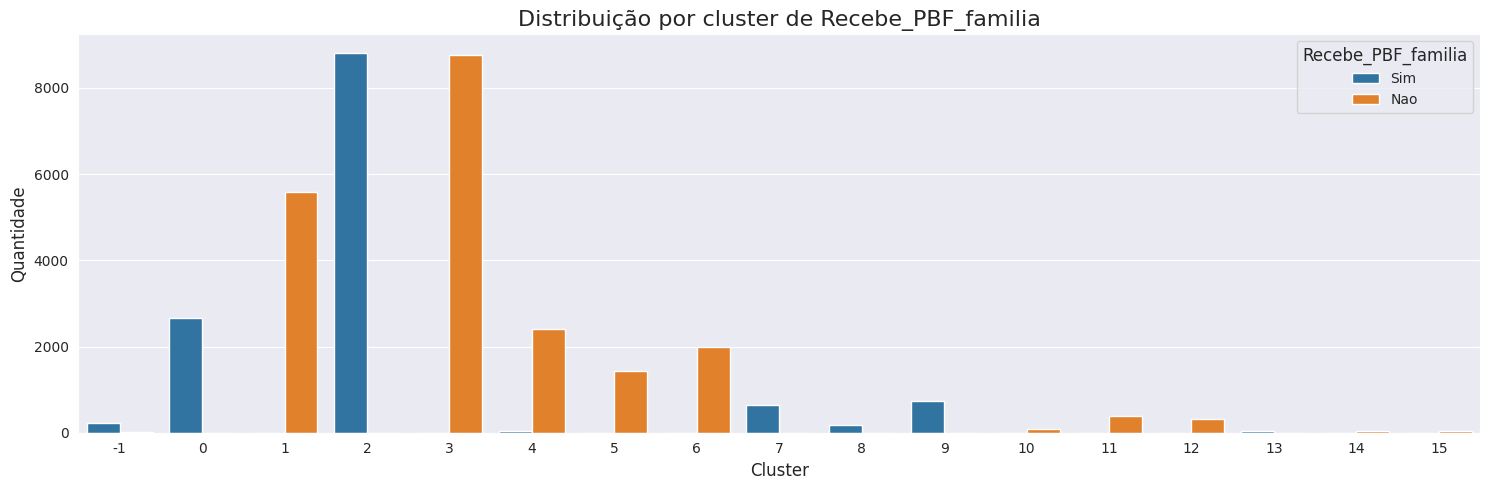

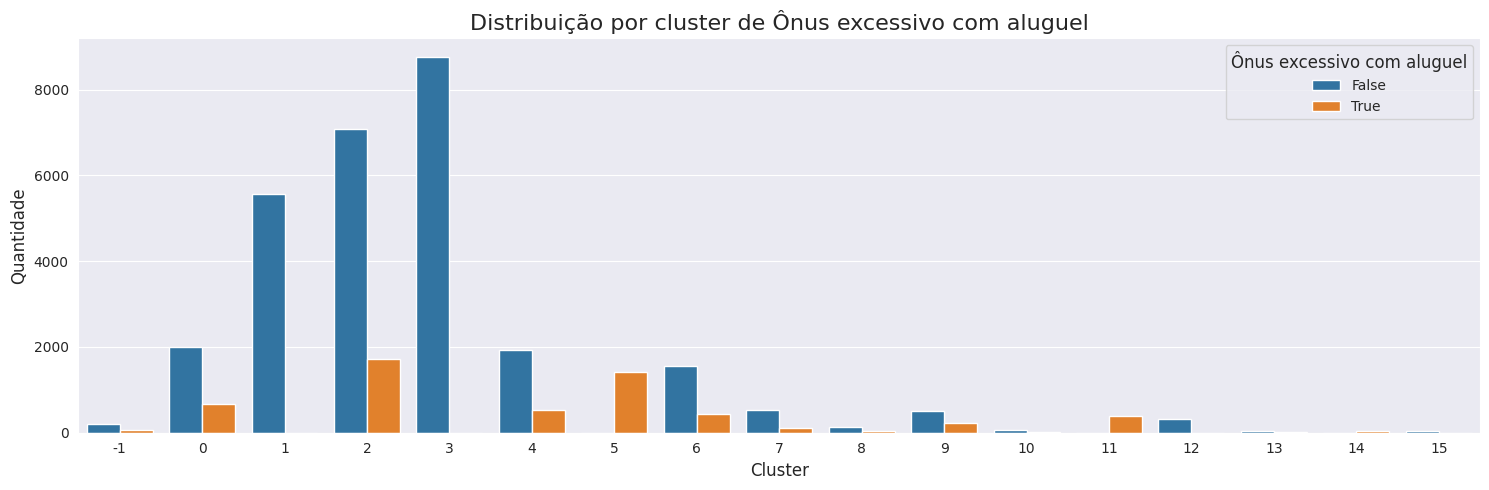

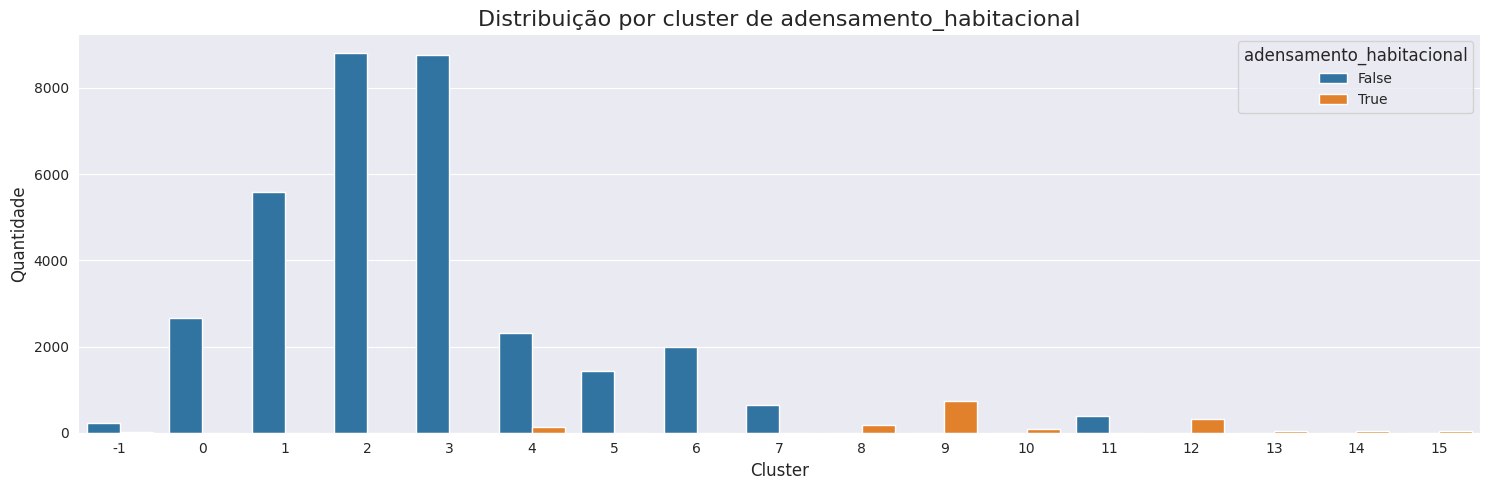

In [ ]:
v_familiar_2 = [
    "faixa_da_renda_familiar_per_capita",
    "Recebe_PBF_familia",
    "Ônus excessivo com aluguel",
    "adensamento_habitacional"
]

for col in v_familiar_2:
    plt.subplots(figsize=(15, 5))
    ax = sns.countplot(x='Vulnerabilidade_Familia', hue=col, data=dados_clusterizados)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()


Insigths a partir da analise dos agrupamentos:

1. Se focarmos nos agrupamentos -1, 4, 9, 2, 6, 0 e 10 observamos que Sao agrupamentos com as menores faixas de renda ganhando ate 89,90 reais ou ate 178,00 reais;

2. Alem disso, os grupos 4, 6, 10 e uma pequena parcela do -1 nao recebem bolsa familias, o que configura um agravante da sua vulnerabilidade de renda;

3. Somado a isso, ainda notamos que a uma percentual de pessoas dentro desses grupos que vivem em sitacao de onus excessivo.

4. A pesar do grupo 4 receber bolsa familia, ele possui uma parcela de familias tanto com onus excessivo quanto com adensamento habitacional, assim como os clusters -1 e 9.

Portanto, se fossemos elecar agrupamentos de vulnerabilidade da familia em ordem de prioridade estariam os clusters **4, 9, 10, 6, -1, 2 e 0**.

Limitando as escalas para verificar os valores menores que não ficam visiveis devidos as distorções do gráfico por conta da concentração de valores em determinados clusters:

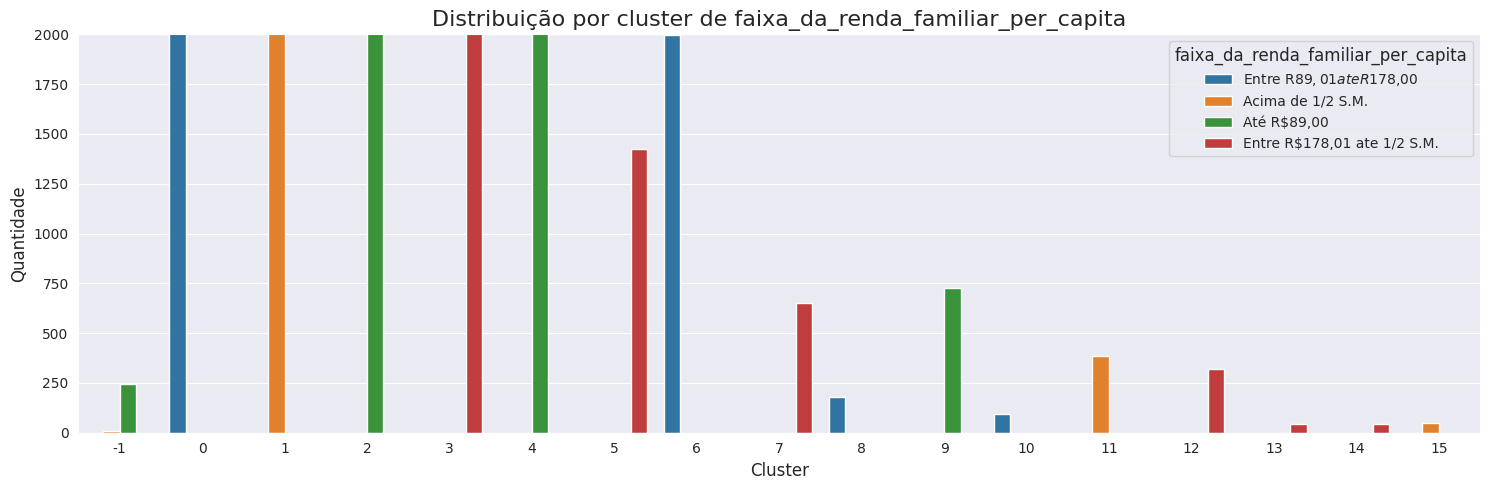

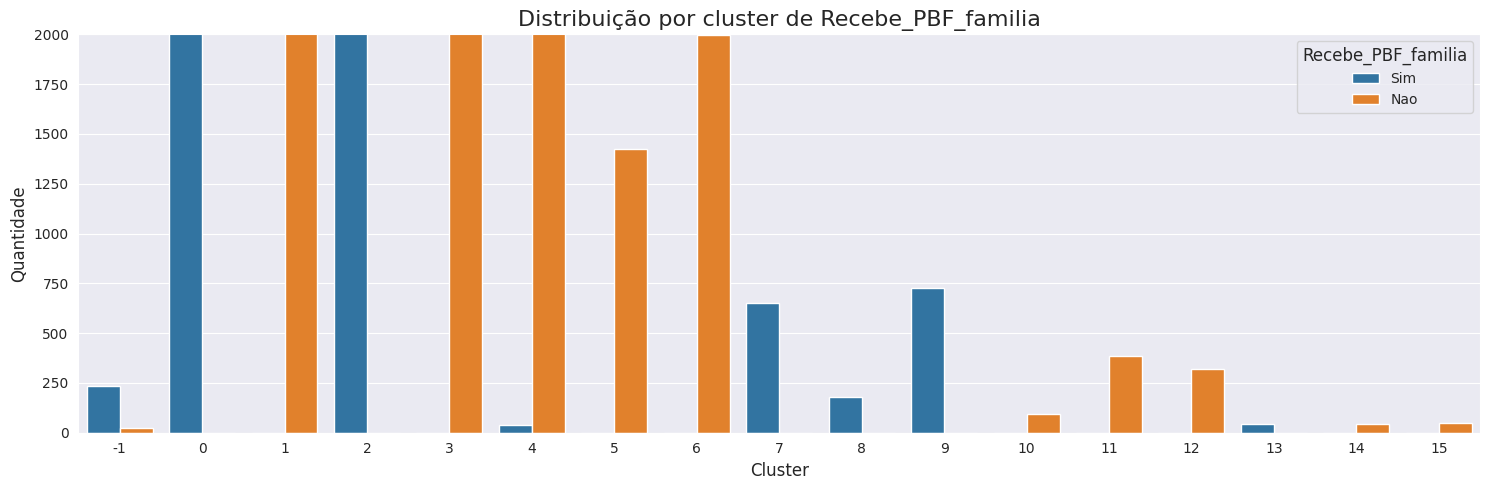

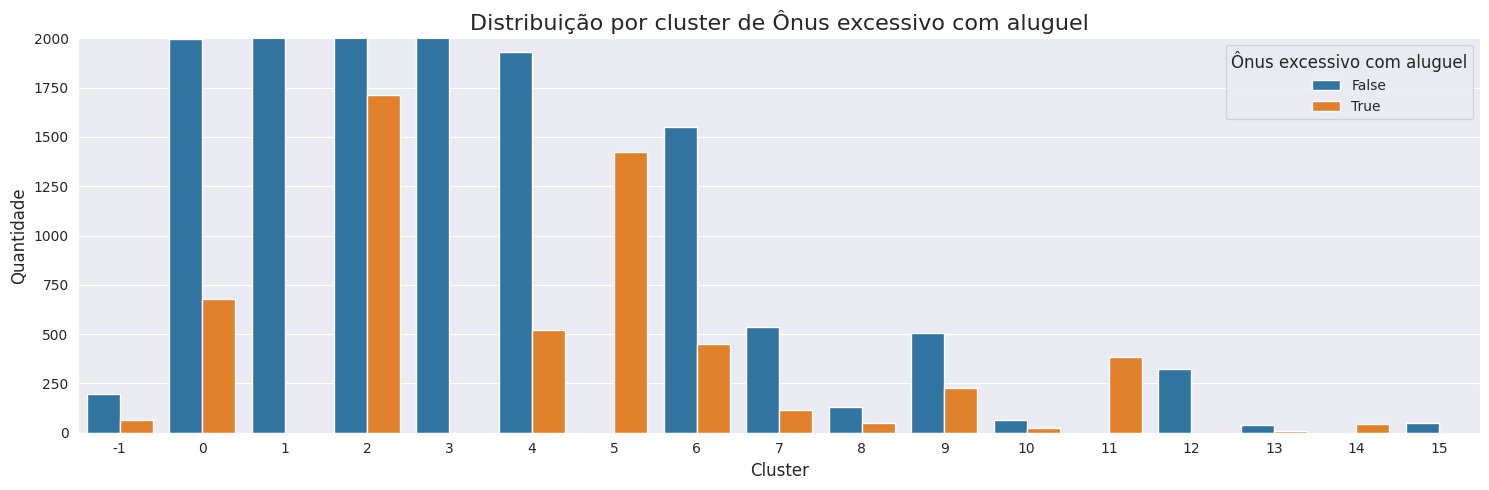

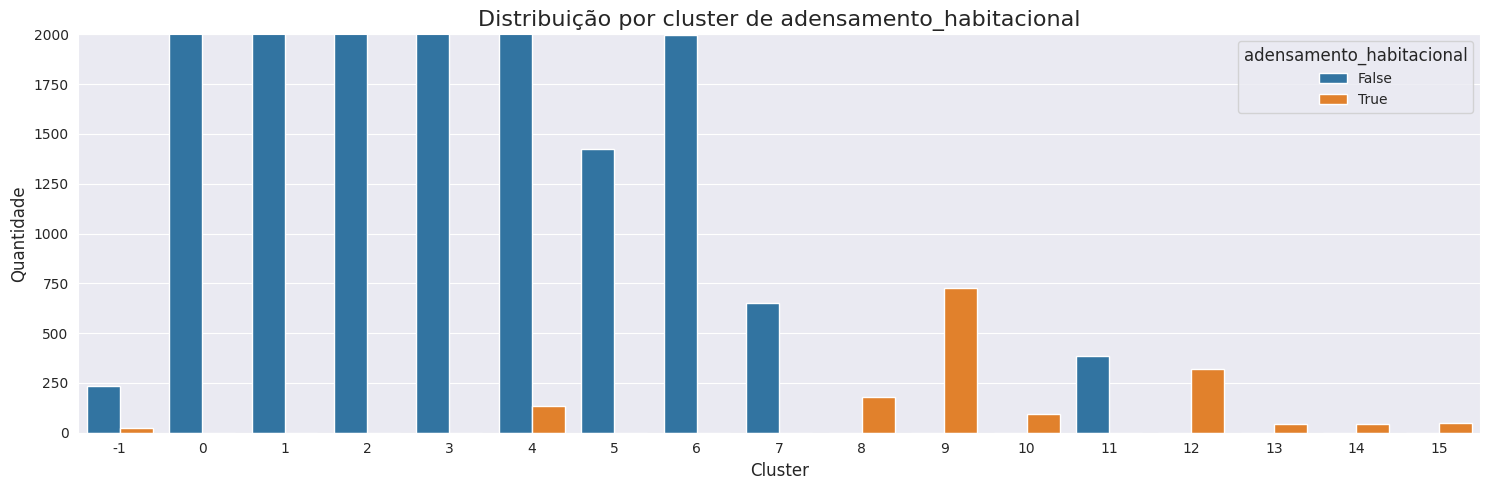

In [ ]:
for col in v_familiar_2:
    plt.subplots(figsize=(15, 5))
    ax = sns.countplot(x='Vulnerabilidade_Familia', hue=col, data=dados_clusterizados)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    ax.set_ylim([0, 2000]) # define o valor mínimo e máximo da escala do eixo y
    plt.tight_layout()
    plt.show()

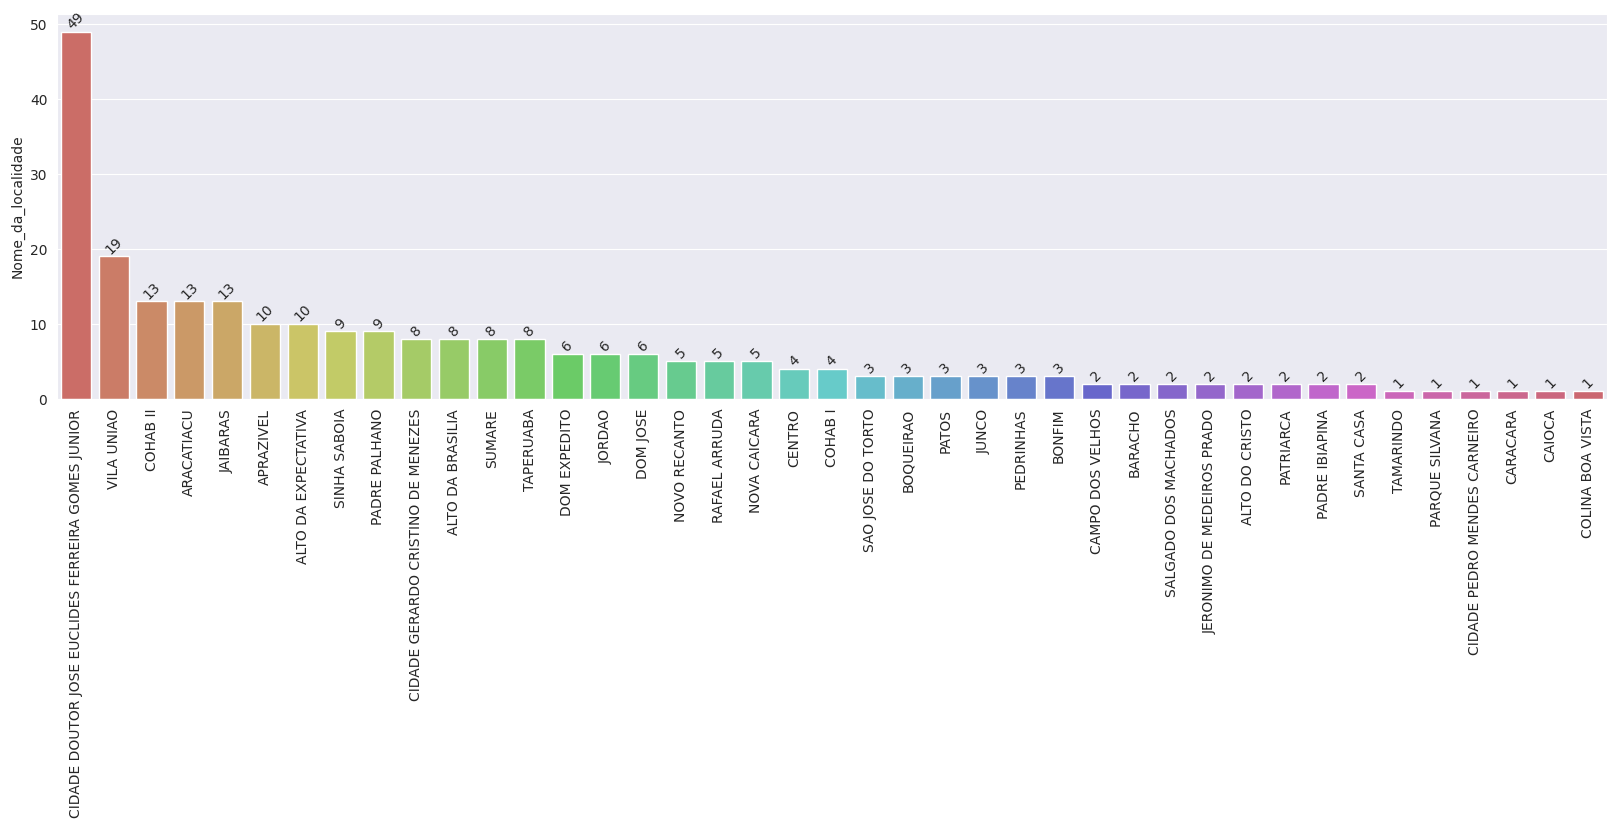

In [ ]:
loc_cluster = dados_clusterizados[dados_clusterizados['Vulnerabilidade_Familia'] == -1]  # Filtrar os dados de localizacao por cluster

plt.figure(figsize=(20, 5))
ax = sns.barplot(x=loc_cluster['Nome_da_localidade'].value_counts().index,
                 y=loc_cluster['Nome_da_localidade'].value_counts(), palette='hls')
plt.xticks(fontsize=10, rotation=90)

# Adicionando os rótulos numéricos das colunas
for i in range(len(loc_cluster['Nome_da_localidade'].value_counts())):
    ax.annotate(loc_cluster['Nome_da_localidade'].value_counts()[i],
                xy=(i, loc_cluster['Nome_da_localidade'].value_counts()[i]),
                ha='center', va='bottom', fontsize=10, rotation=45)

plt.show()


### Vulnerabilidade da Residência

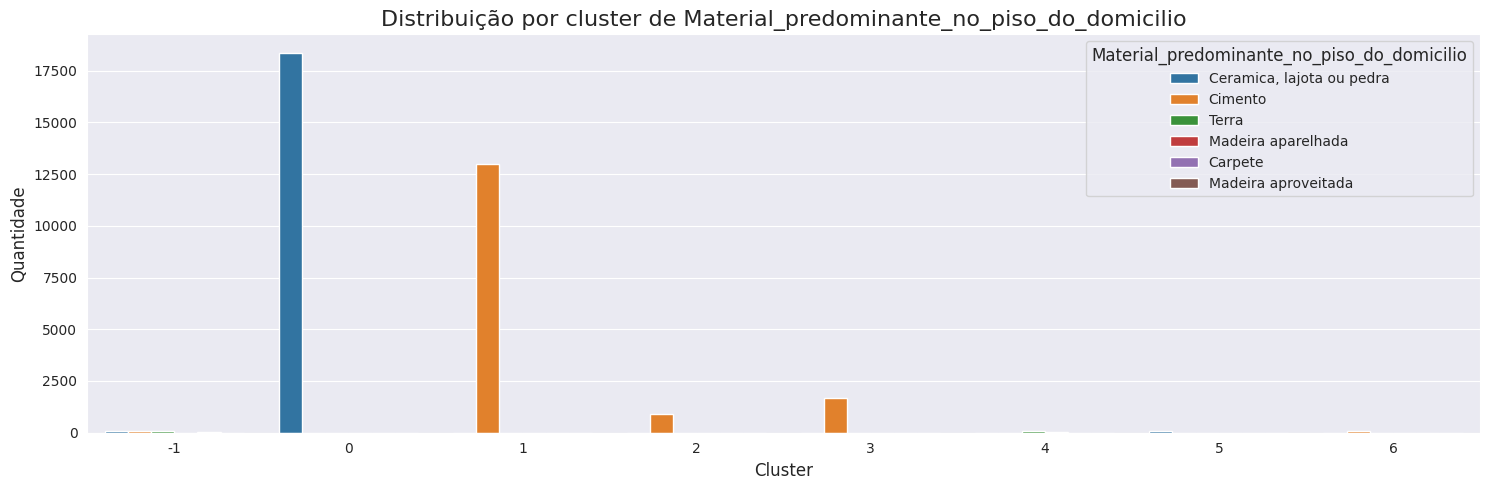

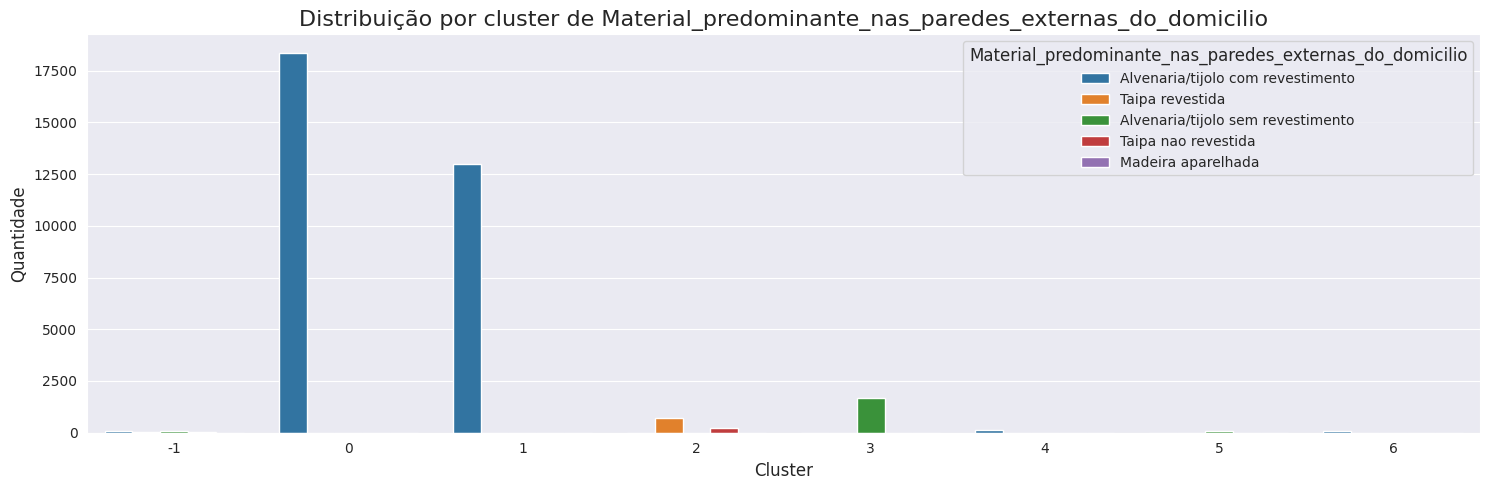

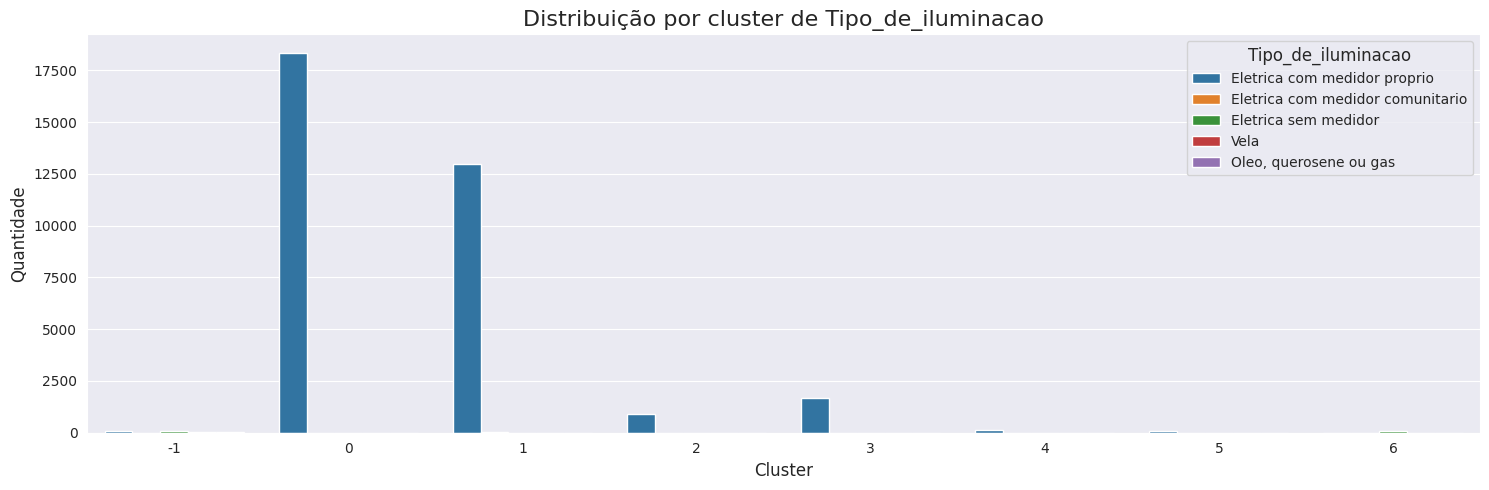

In [ ]:
v_residencia_2 = [
    "Material_predominante_no_piso_do_domicilio",
    "Material_predominante_nas_paredes_externas_do_domicilio",
    "Tipo_de_iluminacao",
]

for col in v_residencia_2:
    plt.subplots(figsize=(15, 5))
    ax = sns.countplot(x='Vulnerabilidade_Residencia', hue=col, data=dados_clusterizados)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()


Limitando as escalas para verificar os valores menores que não ficam visiveis devidos as distorções do gráfico por conta da concentração de valores em determinados clusters

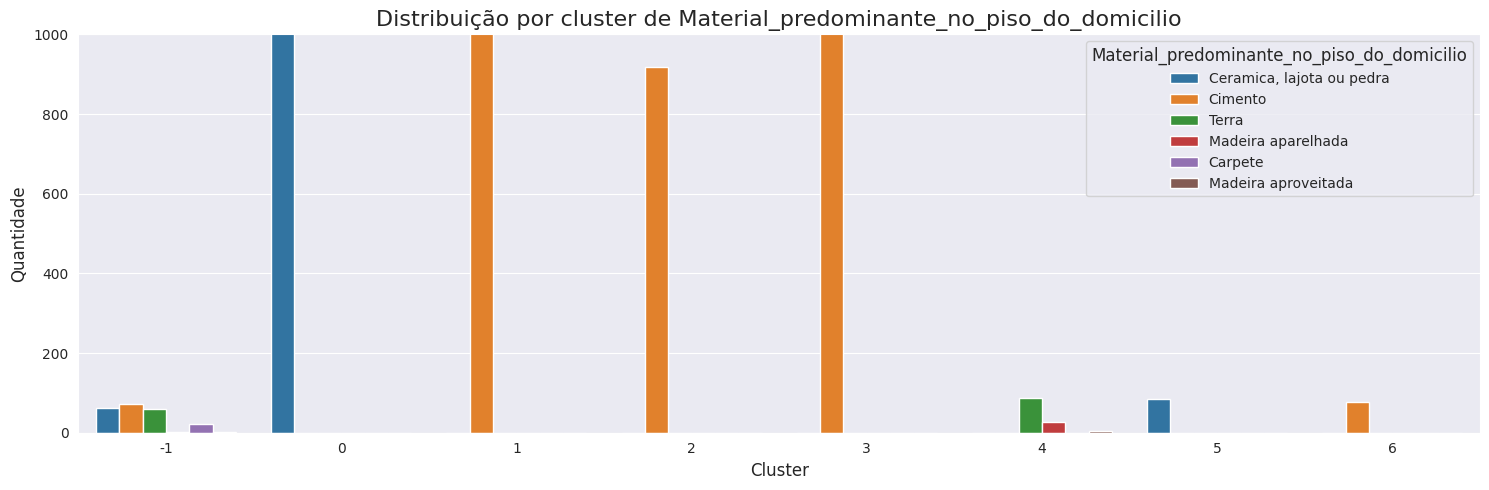

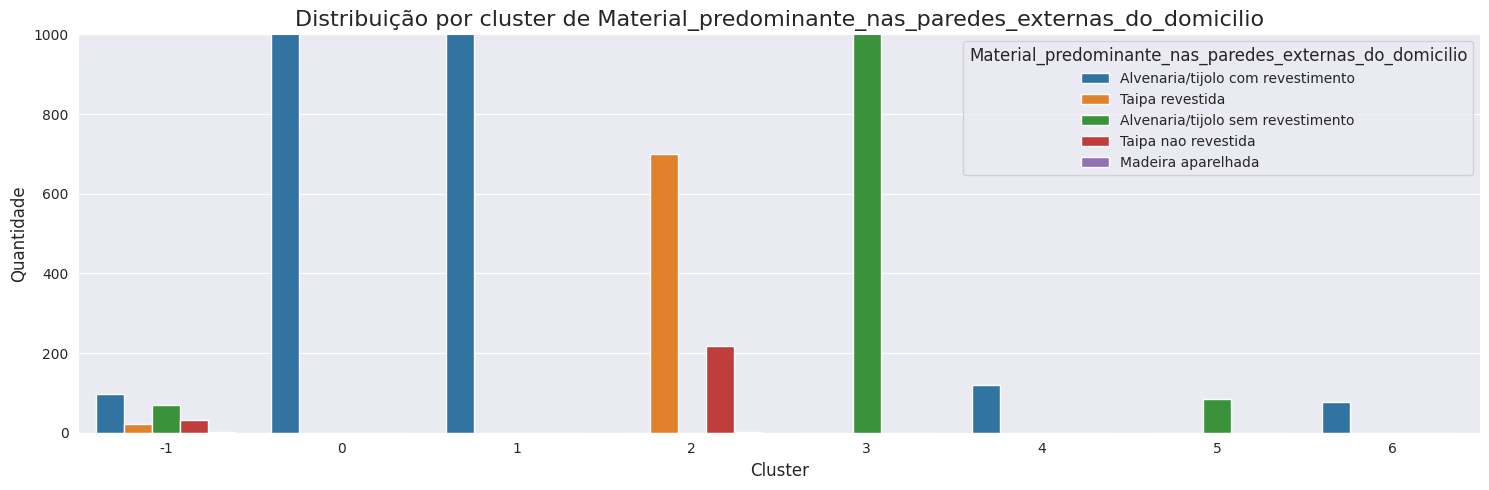

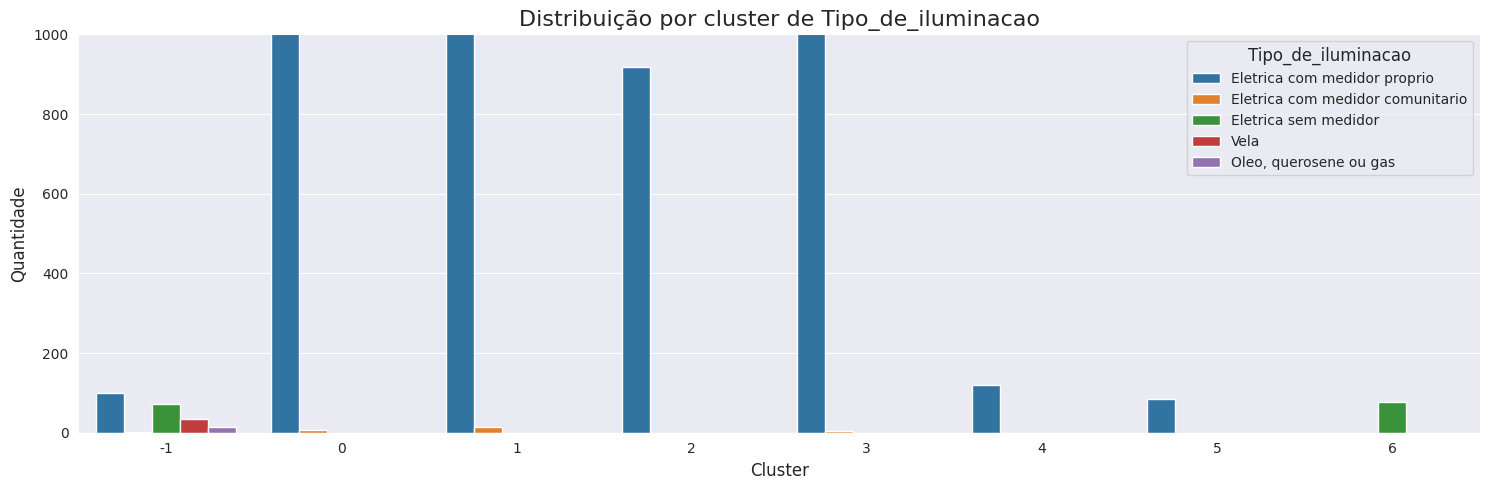

In [ ]:
for col in v_residencia_2:
    plt.subplots(figsize=(15, 5))
    ax = sns.countplot(x='Vulnerabilidade_Residencia', hue=col, data=dados_clusterizados)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    ax.set_ylim([0, 1000]) # define o valor mínimo e máximo da escala do eixo y
    plt.tight_layout()
    plt.show()


Insigths a partir da analise dos clusters:

1. Se tratando de piso, tanto o cluster -1 e 4 apresentam maior vulnerabilidade;
2. Ja, no que diz respeito as paredes o grupo 2 e -1 apresentam maior vulnerabilidade;
3. Em relacao a iluminacao eletrica o cluster -1 e o mais vulneravel;

Portanto, poderiamo elencar em ordem de prioridade os clusters **-1, 2 e 4**.

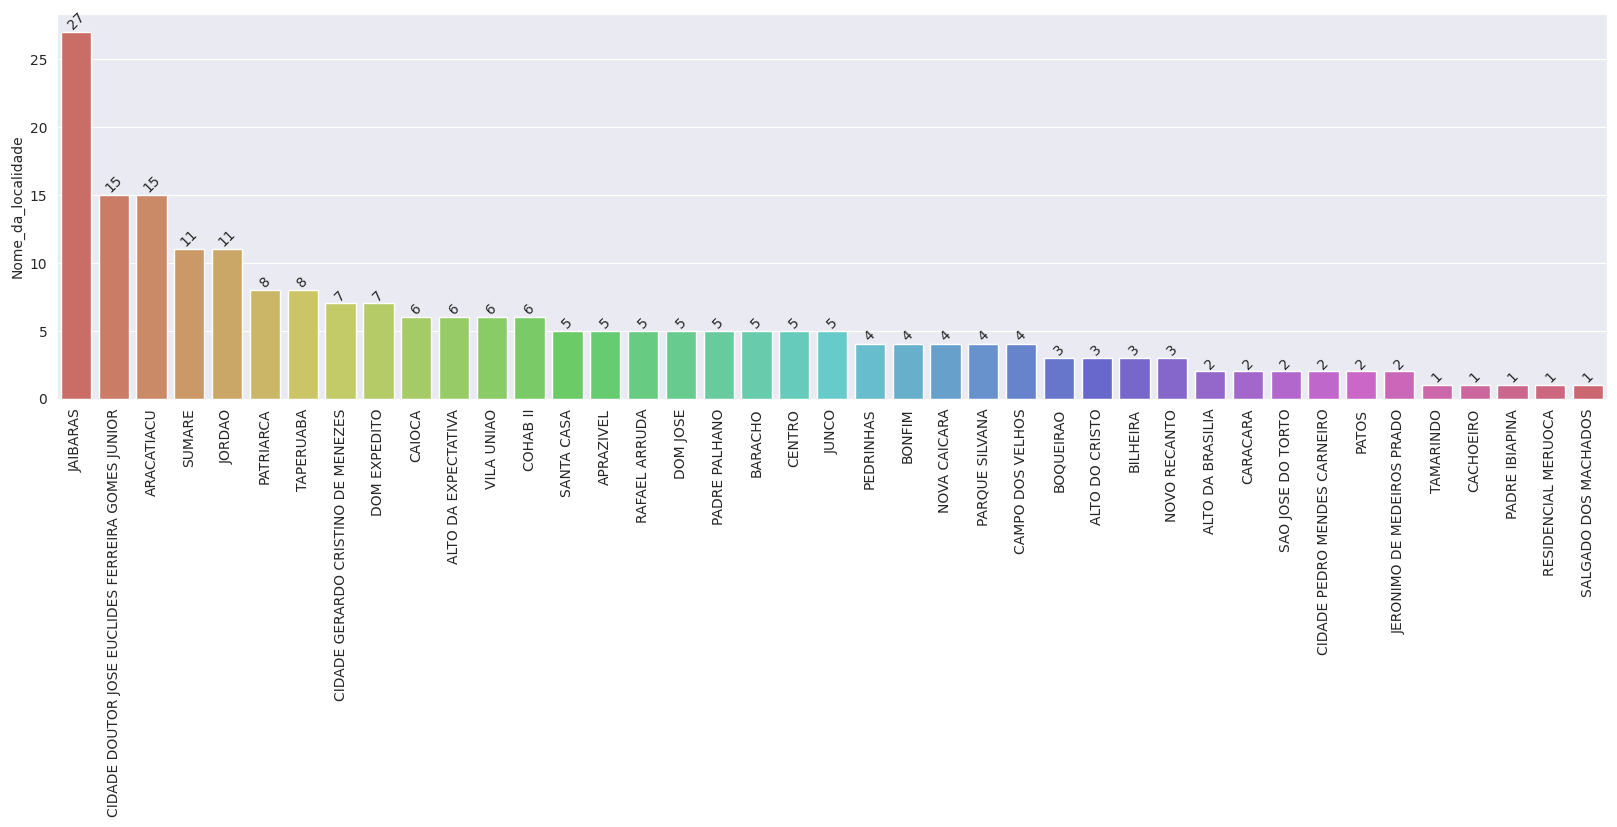

In [ ]:
loc_cluster_2 = dados_clusterizados[dados_clusterizados['Vulnerabilidade_Residencia'] == -1]  # Filtrar os dados de localizacao por cluster

plt.figure(figsize=(20, 5))
ax = sns.barplot(x=loc_cluster_2['Nome_da_localidade'].value_counts().index,
                 y=loc_cluster_2['Nome_da_localidade'].value_counts(), palette='hls')
plt.xticks(fontsize=10, rotation=90)

# Adicionando os rótulos numéricos das colunas
for i in range(len(loc_cluster_2['Nome_da_localidade'].value_counts())):
    ax.annotate(loc_cluster_2['Nome_da_localidade'].value_counts()[i],
                xy=(i, loc_cluster_2['Nome_da_localidade'].value_counts()[i]),
                ha='center', va='bottom', fontsize=10, rotation=45)

plt.show()


O distrito e o mais que possui mais quantidade de pessoas em relacao ao cluster -1.

### Vulnerabilidade de Saneamento

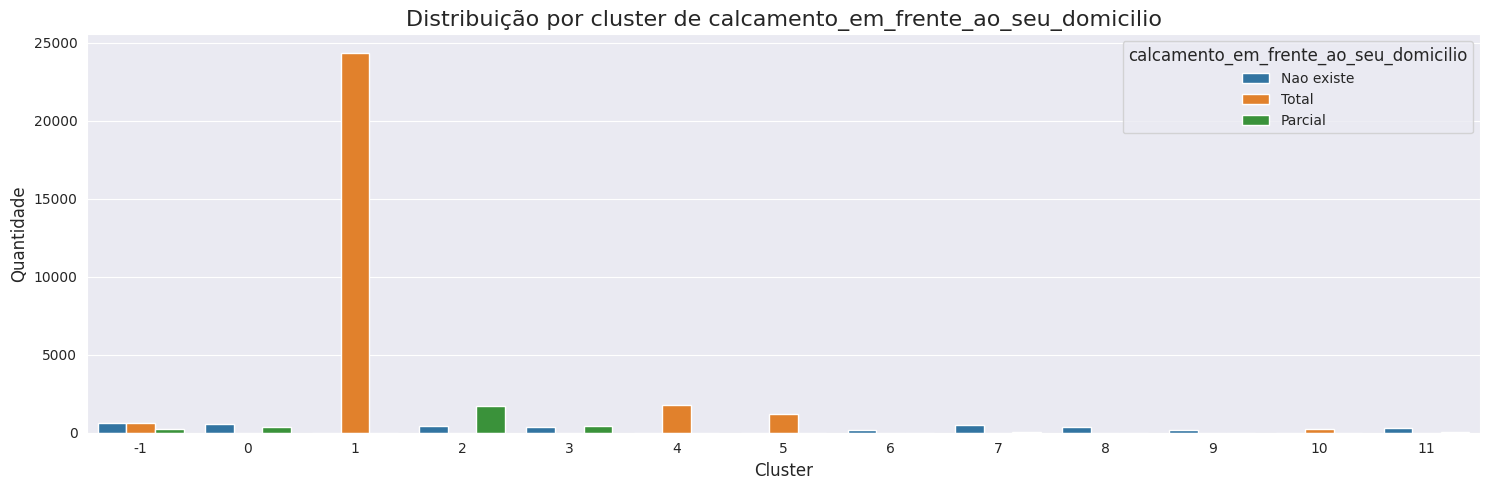

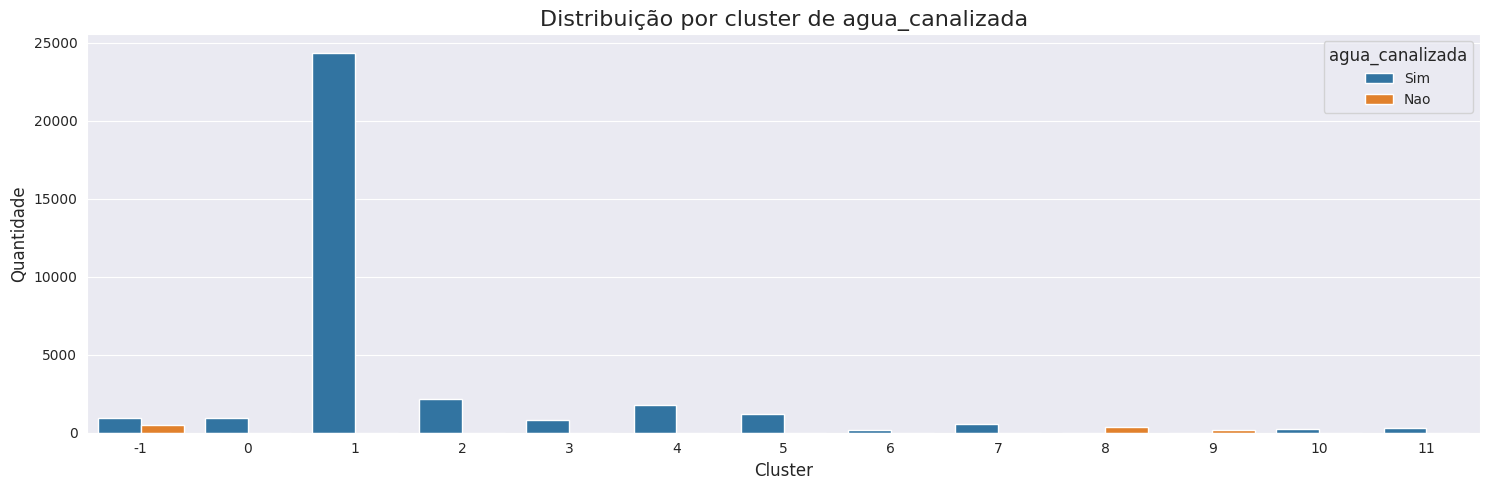

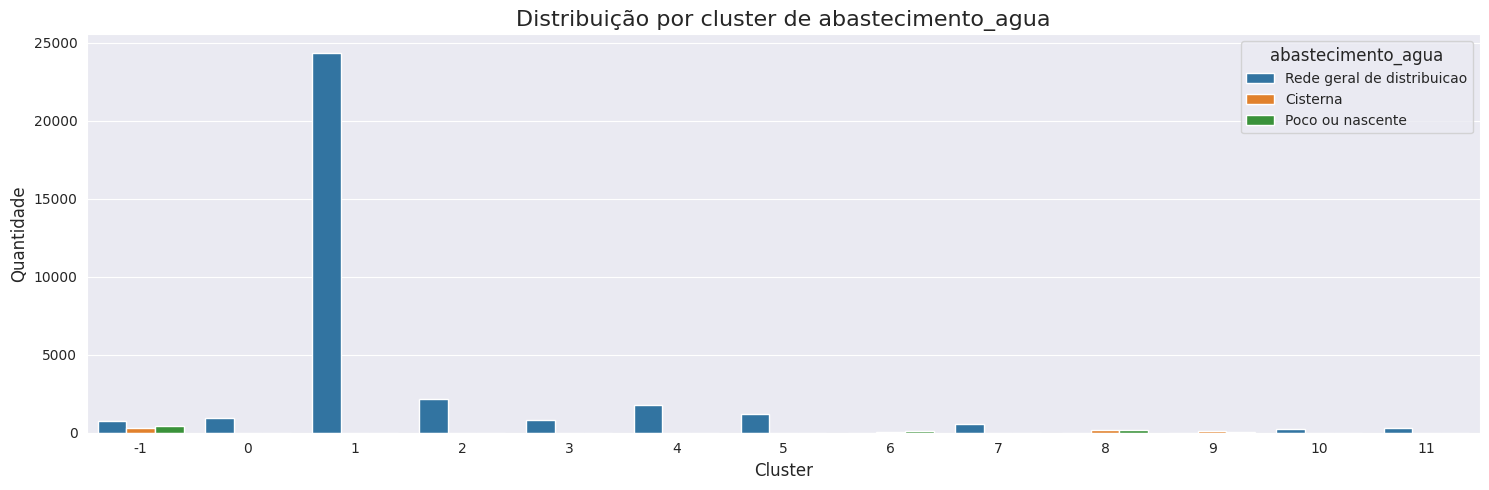

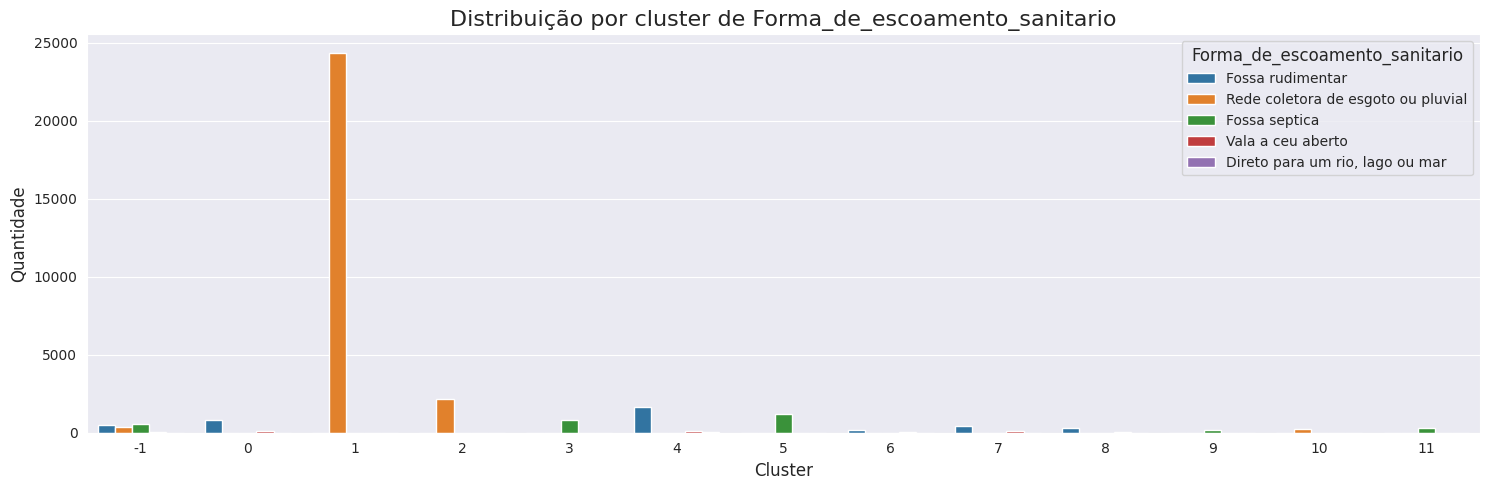

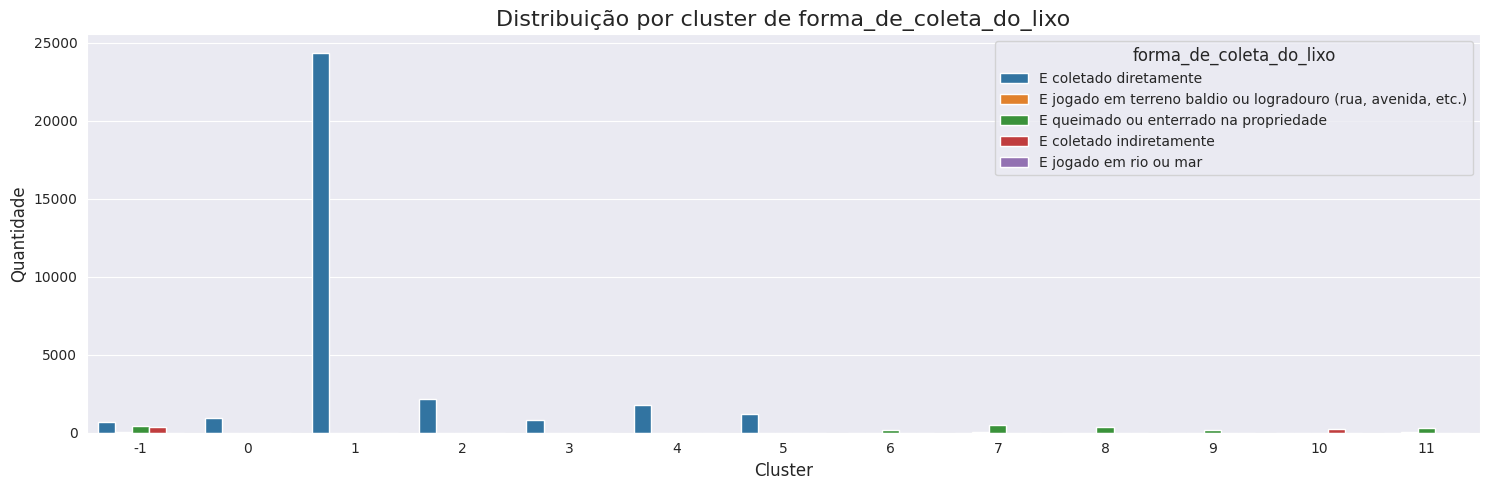

In [ ]:
v_saneamento_2 = [
    "calcamento_em_frente_ao_seu_domicilio",
    "agua_canalizada",
    "abastecimento_agua",
    "Forma_de_escoamento_sanitario",
    "forma_de_coleta_do_lixo"
]

for col in v_saneamento_2:
    plt.subplots(figsize=(15, 5))
    ax = sns.countplot(x='Vulnerabilidade_Saneamento', hue=col, data=dados_clusterizados)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()



Limitando as escalas para verificar os valores menores que não ficam visiveis devidos as distorções do gráfico por conta da concentração de valores em determinados clusters

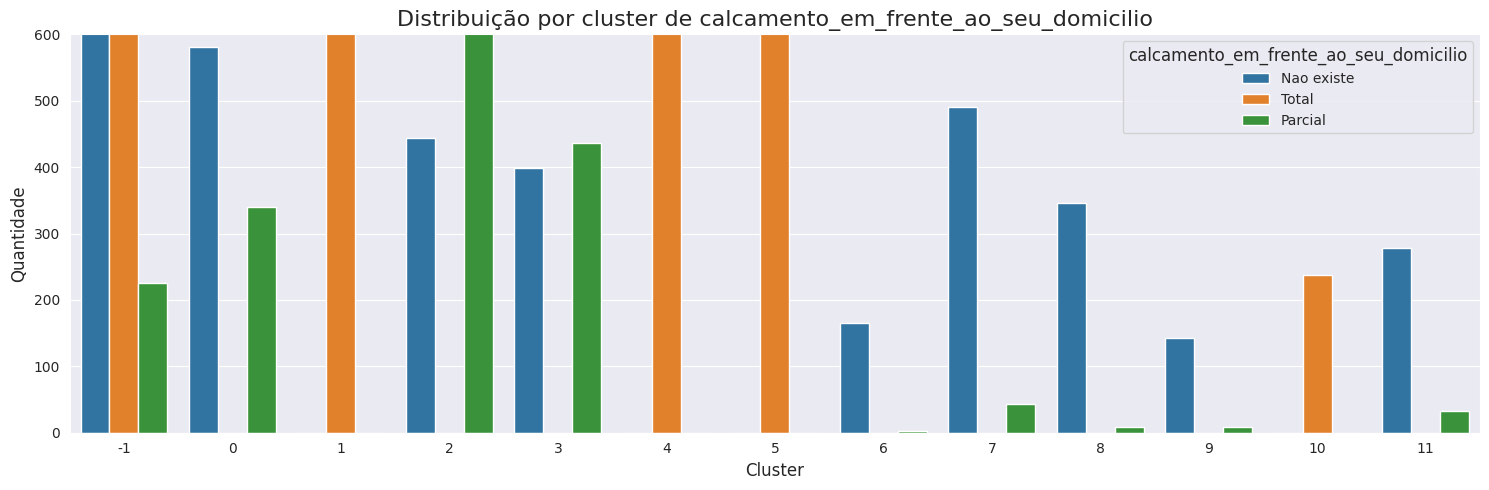

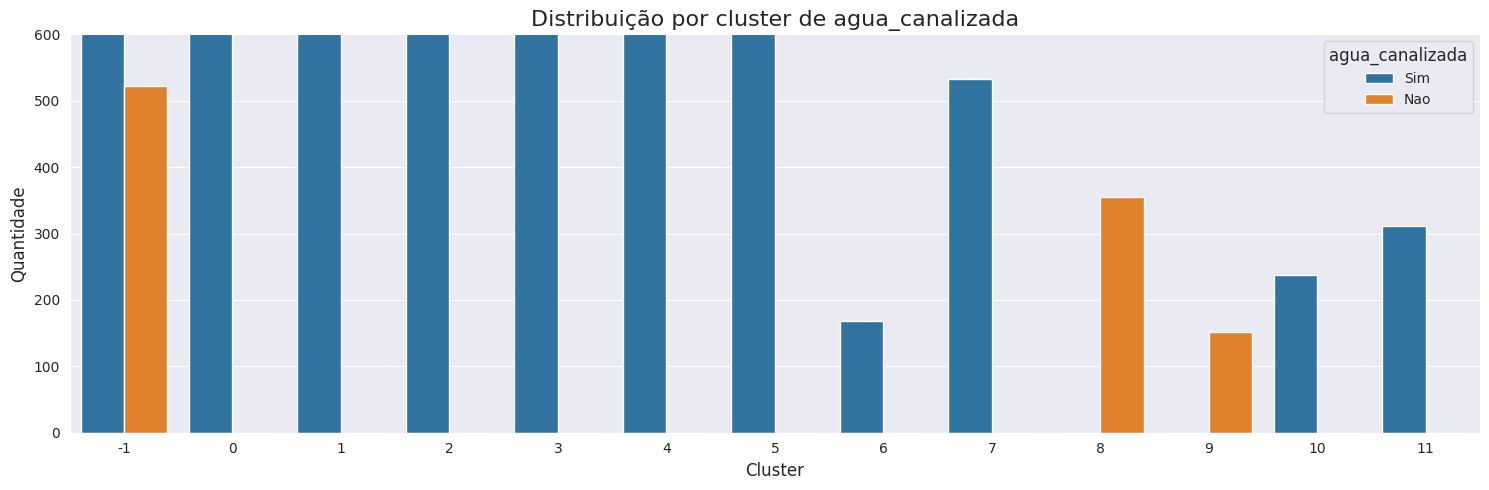

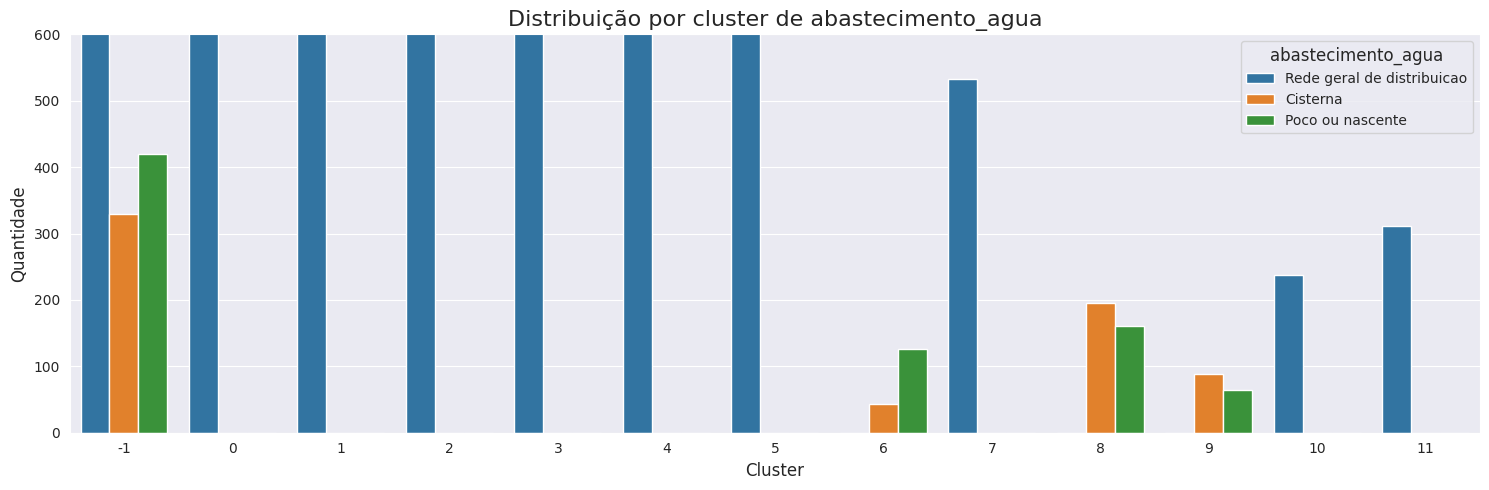

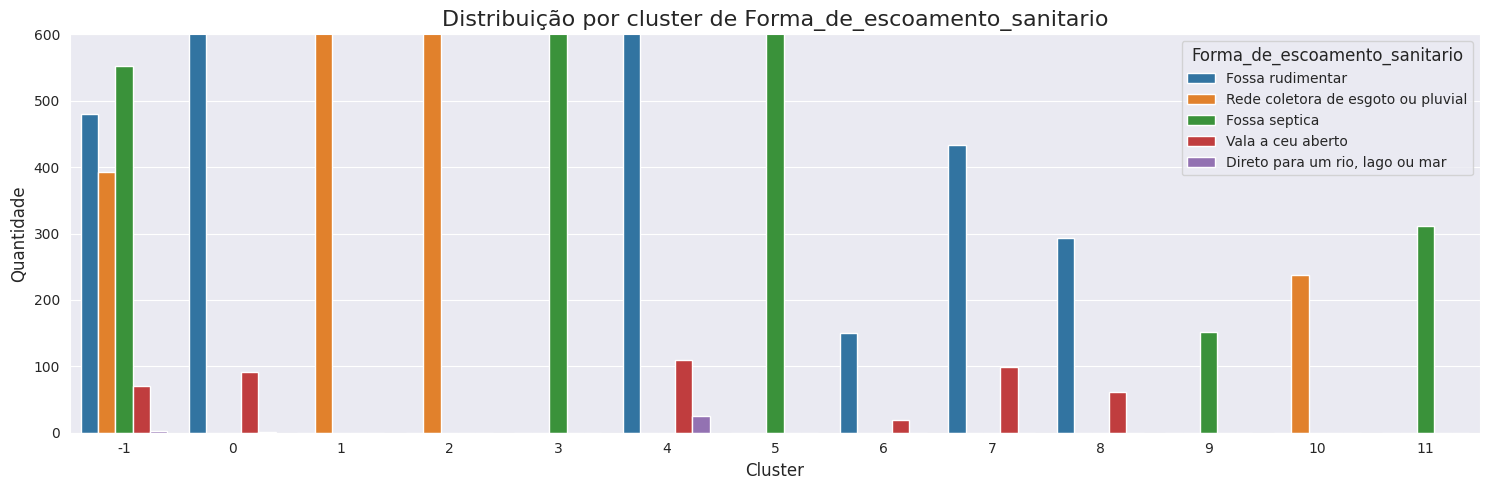

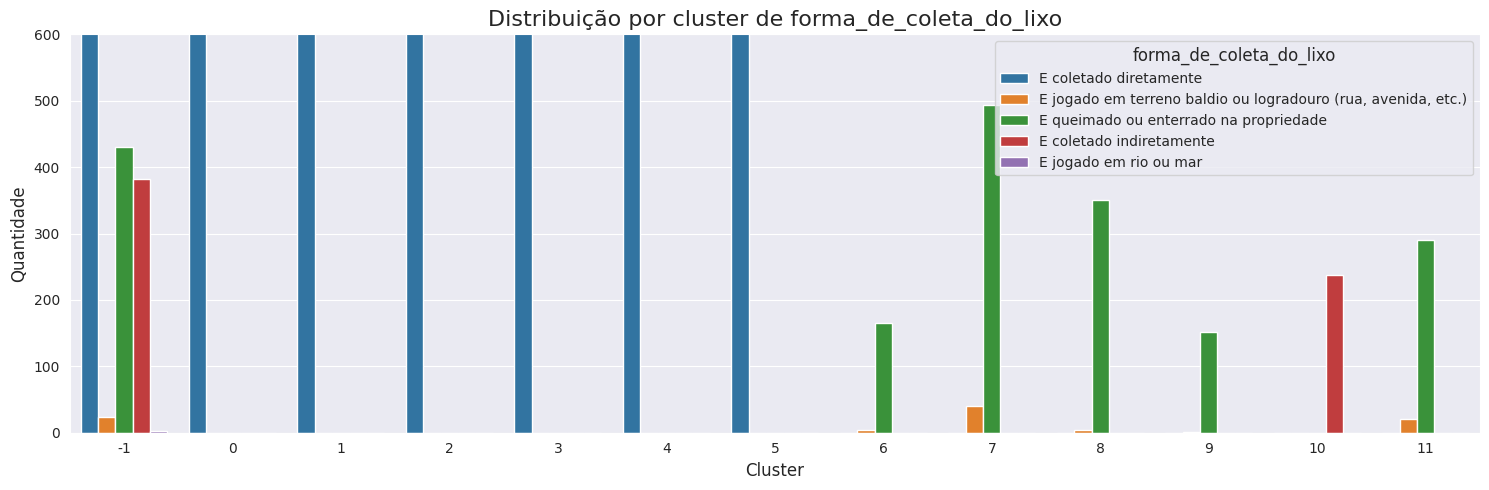

In [ ]:
for col in v_saneamento_2:
    plt.subplots(figsize=(15, 5))
    ax = sns.countplot(x='Vulnerabilidade_Saneamento', hue=col, data=dados_clusterizados)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Quantidade', fontsize=12)
    plt.title(f'Distribuição por cluster de {col}', fontsize=16)
    plt.legend(title=col, fontsize=10, title_fontsize=12)
    ax.set_ylim([0, 600]) # define o valor mínimo e máximo da escala do eixo y
    plt.tight_layout()
    plt.show()


Insigths a partir da analise dos clusters:

1. Em relacao ao calcamento os seuintes clusters possuem menos infraestrutura: -1, 0, 2, 3, 6, 7, 8, 9, 11;
2. Quando vamos para agua canalizada ja passam a ser os clusters: -1, 8, 9.
3. Em abastecimento de agua: -1, 6, 8, 9;
4. Na forma de escoamento sanitario: -1, 0, 4, 6, 7, 8, Se destacando o cluster 4 por existirem familias que jogam no rio, mar ou mar;
5. Ja, no que se refere a coleta de lixo, os clusters mais vulneraveis sao: -1, 6, 7, 8, 9, 11.

Portanto, poderiamos elencar em ordem de prioridade os clusters **-1, 8, 9, 6, 7, 11, 0, 4, 3, 2**.

# DEFINIÇÃO - Familias com Maior Grau de Vulnerabilidade

In [ ]:
print(dados_clusterizados.shape)
dados_clusterizados.head()

(34432, 20)


ID_Familiar Localização Nome_da_localidade  \
0            1    DISTRITO           JAIBARAS   
1            3    DISTRITO           BILHEIRA   
2            4    DISTRITO          TAPERUABA   
3            5    DISTRITO           CARACARA   
4            6        SEDE           COHAB II   

  faixa_da_renda_familiar_per_capita Recebe_PBF_familia Situacao_do_domicilio  \
0         Entre R$89,01 ate R$178,00                Sim                Rurais   
1                  Acima de 1/2 S.M.                Nao                Rurais   
2                        Até R$89,00                Sim               Urbanas   
3        Entre R$178,01 ate 1/2 S.M.                Nao                Rurais   
4         Entre R$89,01 ate R$178,00                Sim               Urbanas   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
1                  Ceramica, lajota ou pedra   
2                                    Cimento   
3                                    Cimento   
4                  Ceramica, lajota ou pedra   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
1                  Alvenaria/tijolo com revestimento                  Sim   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                  Alvenaria/tijolo com revestimento                  Sim   

           abastecimento_agua       Forma_de_escoamento_sanitario  \
0  Rede geral de distribuicao                    Fossa rudimentar   
1  Rede geral de distribuicao                    Fossa rudimentar   
2  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
3                    Cisterna                       Fossa septica   
4  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   

                             forma_de_coleta_do_lixo  \
0                             E coletado diretamente   
1                             E coletado diretamente   
2                             E coletado diretamente   
3  E jogado em terreno baldio ou logradouro (rua,...   
4                             E coletado diretamente   

             Tipo_de_iluminacao calcamento_em_frente_ao_seu_domicilio  \
0  Eletrica com medidor proprio                            Nao existe   
1  Eletrica com medidor proprio                            Nao existe   
2  Eletrica com medidor proprio                                 Total   
3  Eletrica com medidor proprio                            Nao existe   
4  Eletrica com medidor proprio                               Parcial   

   Ônus excessivo com aluguel  adensamento_habitacional  \
0                       False                     False   
1                       False                     False   
2                       False                     False   
3                       False                     False   
4                        True                     False   

   Comprometimento_renda_despesas  Vulnerabilidade_Familia  \
0                        1.781955                        0   
1                        0.180361                        1   
2                       15.133333                        2   
3                        0.370000                        3   
4                        1.066176                        0   

   Vulnerabilidade_Residencia  Vulnerabilidade_Saneamento  
0                           0                           0  
1                           0                           0  
2                           1                           1  
3                           1                          -1  
4                           0                           2

1. Portanto, se fossemos elecar agrupamentos de vulnerabilidade da familia em ordem de prioridade estariam os clusters: **4, 9, 10, 6, -1, 2 e 0**.

2. Portanto, poderiamo elencar em ordem de prioridade dos clusters de vulnerabilidade da residencia seriam: **-1, 2 e 4**.

3. Portanto, poderiamos elencar em ordem de prioridade dos clusters de vulnerabilidade de saneamento seriam: **-1, 8, 9, 6, 7, 11, 0, 4, 3, 2**.

## Criar dataset de vulnerabilidade

In [ ]:
import pandas as pd

lista_vulnerabilidade_familia = [4, 9, 10, 6, -1, 2, 0]
vf = dados_clusterizados[dados_clusterizados["Vulnerabilidade_Familia"].isin(lista_vulnerabilidade_familia)]

lista_vulnerabilidade_residencia = [-1, 2, 4]
vr = dados_clusterizados[dados_clusterizados["Vulnerabilidade_Familia"].isin(lista_vulnerabilidade_residencia)]

lista_vulnerabilidade_saneamento = [-1, 8, 9, 6, 7, 11, 0, 4, 3, 2]
vs = dados_clusterizados[dados_clusterizados["Vulnerabilidade_Familia"].isin(lista_vulnerabilidade_saneamento)]

clusters_vulneraveis = pd.concat([vf, vr, vs]).drop_duplicates(subset="ID_Familiar").reset_index(drop=True)
print(clusters_vulneraveis.shape)
clusters_vulneraveis.head()


(26974, 20)


ID_Familiar Localização Nome_da_localidade  \
0            1    DISTRITO           JAIBARAS   
1            4    DISTRITO          TAPERUABA   
2            6        SEDE           COHAB II   
3           10    DISTRITO           CARACARA   
4           11    DISTRITO           BILHEIRA   

  faixa_da_renda_familiar_per_capita Recebe_PBF_familia Situacao_do_domicilio  \
0         Entre R$89,01 ate R$178,00                Sim                Rurais   
1                        Até R$89,00                Sim               Urbanas   
2         Entre R$89,01 ate R$178,00                Sim               Urbanas   
3                        Até R$89,00                Sim               Urbanas   
4                        Até R$89,00                Nao                Rurais   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
1                                    Cimento   
2                  Ceramica, lajota ou pedra   
3                                    Cimento   
4                                    Cimento   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
1                  Alvenaria/tijolo com revestimento                  Sim   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                                    Taipa revestida                  Sim   

           abastecimento_agua       Forma_de_escoamento_sanitario  \
0  Rede geral de distribuicao                    Fossa rudimentar   
1  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
2  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
3  Rede geral de distribuicao                       Fossa septica   
4  Rede geral de distribuicao                       Fossa septica   

  forma_de_coleta_do_lixo            Tipo_de_iluminacao  \
0  E coletado diretamente  Eletrica com medidor proprio   
1  E coletado diretamente  Eletrica com medidor proprio   
2  E coletado diretamente  Eletrica com medidor proprio   
3  E coletado diretamente  Eletrica com medidor proprio   
4  E coletado diretamente  Eletrica com medidor proprio   

  calcamento_em_frente_ao_seu_domicilio  Ônus excessivo com aluguel  \
0                            Nao existe                       False   
1                                 Total                       False   
2                               Parcial                        True   
3                                 Total                       False   
4                            Nao existe                       False   

   adensamento_habitacional  Comprometimento_renda_despesas  \
0                     False                        1.781955   
1                     False                       15.133333   
2                     False                        1.066176   
3                     False                        1.233333   
4                     False                        1.805556   

   Vulnerabilidade_Familia  Vulnerabilidade_Residencia  \
0                        0                           0   
1                        2                           1   
2                        0                           0   
3                        2                           1   
4                        4                           2   

   Vulnerabilidade_Saneamento  
0                           0  
1                           1  
2                           2  
3                           5  
4                           3

## Atribuir pesos

In [ ]:
# Criando um variavel dos clusters ponderados
clusters_vulneraveis_ponderados = clusters_vulneraveis.copy()

In [ ]:
# Função para identificar os valores que não existem na lista dos clusters de vulnerabilidade
# definidos  lista de vulnerabilidade
def verificar_valores_faltantes(lista, coluna):
    valores_unicos = clusters_vulneraveis_ponderados[coluna].unique()
    valores_faltantes = list(set(valores_unicos) - set(lista))
    return valores_faltantes

# substitui os valores faltantes na lista de vulnerabilidade por padrao
def substituir_valores_faltantes(valores_faltantes, dataframe, coluna, valor_peso_padrao):
    dataframe.loc[dataframe[coluna].isin(valores_faltantes), coluna] = valor_peso_padrao



In [ ]:
# Define o dicionario de pesos
def calcular_pesos(lista, peso_inicial, peso_padrao):


    peso_incremento = -0.1

    pesos = [peso_inicial]
    peso_atual = peso_inicial

    for _ in range(len(lista) - 1):
        peso_atual += peso_incremento
        pesos.append(peso_atual)

    # Arredondar os pesos para duas casas decimais após o zero
    pesos_arredondados = [round(peso, 2) for peso in pesos]

    lista_ponderada = {item: peso for item, peso in zip(lista, pesos_arredondados)}

    lista_ponderada[peso_padrao] = peso_padrao

    return lista_ponderada


In [ ]:
# Criando dicionario de pesos levando em consideração a ordem da lista dentro do
# intervalo dos pesos iniciais definidos com decremento de - 0.1
valores_faltantes1 = verificar_valores_faltantes(lista_vulnerabilidade_familia, "Vulnerabilidade_Familia")

# Definição do peso padrão para os clusters fora da lista dos mais vulneraveis
peso_padrao_vf = 0.1
substituir_valores_faltantes(valores_faltantes1, clusters_vulneraveis_ponderados, "Vulnerabilidade_Familia", peso_padrao_vf)

# Atribuindo o peso para os clusters mais vulneraveis
Peso_max_vf = 1.1
pesos_vulnerabilidade_familia = calcular_pesos(lista_vulnerabilidade_familia, Peso_max_vf, peso_padrao_vf)

# Visualizar dicionário de pesos
print(pesos_vulnerabilidade_familia)

{4: 1.1, 9: 1.0, 10: 0.9, 6: 0.8, -1: 0.7, 2: 0.6, 0: 0.5, 0.1: 0.1}


In [ ]:
# Identificando clusters fora da lista de vulnerabilidade repassada
valores_faltantes2 = verificar_valores_faltantes(lista_vulnerabilidade_residencia, "Vulnerabilidade_Residencia")

# Definição do peso padrão para os clusters fora da lista dos mais vulneraveis
peso_padrao_vr = 0.1
substituir_valores_faltantes(valores_faltantes2, clusters_vulneraveis_ponderados, "Vulnerabilidade_Residencia", peso_padrao_vr)

# Atribuindo o peso para os clusters mais vulneraveis
Peso_max_vr = 1.1
pesos_vulnerabilidade_residencia = calcular_pesos(lista_vulnerabilidade_residencia, Peso_max_vr, peso_padrao_vr)

# Visualizar dicionário de pesos
print(pesos_vulnerabilidade_residencia)


{-1: 1.1, 2: 1.0, 4: 0.9, 0.1: 0.1}


In [ ]:
# Identificando clusters fora da lista de vulnerabilidade repassada
valores_faltantes3 = verificar_valores_faltantes(lista_vulnerabilidade_saneamento, "Vulnerabilidade_Saneamento")

# Definição do peso padrão para os clusters fora da lista dos mais vulneraveis
peso_padrao_vs = 0.1
substituir_valores_faltantes(valores_faltantes3, clusters_vulneraveis_ponderados, "Vulnerabilidade_Saneamento", peso_padrao_vs)

# Atribuindo o peso para os clusters mais vulneraveis
Peso_max_vs = 1.1
pesos_vulnerabilidade_saneamento = calcular_pesos(lista_vulnerabilidade_saneamento, Peso_max_vs, peso_padrao_vs)

print(pesos_vulnerabilidade_saneamento)

{-1: 1.1, 8: 1.0, 9: 0.9, 6: 0.8, 7: 0.7, 11: 0.6, 0: 0.5, 4: 0.4, 3: 0.3, 2: 0.2, 0.1: 0.1}


In [ ]:
# Criando um variavel dos clusters ponderados
clusters_vulneraveis_ponderados_Atribuidos = clusters_vulneraveis_ponderados.copy()

# Atribuindo os pesos aos clusters definidos
clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Familia"] = clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Familia"].map(pesos_vulnerabilidade_familia)

clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Residencia"] = clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Residencia"].map(pesos_vulnerabilidade_residencia)

clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Saneamento"] = clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Saneamento"].map(pesos_vulnerabilidade_saneamento)


In [ ]:
clusters_vulneraveis_ponderados_Atribuidos.head()

ID_Familiar Localização Nome_da_localidade  \
0            1    DISTRITO           JAIBARAS   
1            4    DISTRITO          TAPERUABA   
2            6        SEDE           COHAB II   
3           10    DISTRITO           CARACARA   
4           11    DISTRITO           BILHEIRA   

  faixa_da_renda_familiar_per_capita Recebe_PBF_familia Situacao_do_domicilio  \
0         Entre R$89,01 ate R$178,00                Sim                Rurais   
1                        Até R$89,00                Sim               Urbanas   
2         Entre R$89,01 ate R$178,00                Sim               Urbanas   
3                        Até R$89,00                Sim               Urbanas   
4                        Até R$89,00                Nao                Rurais   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
1                                    Cimento   
2                  Ceramica, lajota ou pedra   
3                                    Cimento   
4                                    Cimento   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
1                  Alvenaria/tijolo com revestimento                  Sim   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                                    Taipa revestida                  Sim   

           abastecimento_agua       Forma_de_escoamento_sanitario  \
0  Rede geral de distribuicao                    Fossa rudimentar   
1  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
2  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
3  Rede geral de distribuicao                       Fossa septica   
4  Rede geral de distribuicao                       Fossa septica   

  forma_de_coleta_do_lixo            Tipo_de_iluminacao  \
0  E coletado diretamente  Eletrica com medidor proprio   
1  E coletado diretamente  Eletrica com medidor proprio   
2  E coletado diretamente  Eletrica com medidor proprio   
3  E coletado diretamente  Eletrica com medidor proprio   
4  E coletado diretamente  Eletrica com medidor proprio   

  calcamento_em_frente_ao_seu_domicilio  Ônus excessivo com aluguel  \
0                            Nao existe                       False   
1                                 Total                       False   
2                               Parcial                        True   
3                                 Total                       False   
4                            Nao existe                       False   

   adensamento_habitacional  Comprometimento_renda_despesas  \
0                     False                        1.781955   
1                     False                       15.133333   
2                     False                        1.066176   
3                     False                        1.233333   
4                     False                        1.805556   

   Vulnerabilidade_Familia  Vulnerabilidade_Residencia  \
0                      0.5                         0.1   
1                      0.6                         0.1   
2                      0.5                         0.1   
3                      0.6                         0.1   
4                      1.1                         1.0   

   Vulnerabilidade_Saneamento  
0                         0.5  
1                         0.1  
2                         0.2  
3                         0.1  
4                         0.3

  O peso inicial de cada cooluna vai determinar a importância de cada categoria criada, por exemplo se eu determinar a infra estrutura residencial como sendo a de maior peso, isso influencia no cálculo final do grau de vulnerabilidade, tornando essa caracteristica mais relevante.

In [ ]:
# Criar uma coluna de Grau de vulnerabilidade com a somatoria dos pesos
clusters_vulneraveis_ponderados_Atribuidos["Grau_de_Vulnerabilidade"] = clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Familia"] + clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Residencia"] + clusters_vulneraveis_ponderados_Atribuidos["Vulnerabilidade_Saneamento"]

clusters_vulneraveis_ponderados_Atribuidos.head()


ID_Familiar Localização Nome_da_localidade  \
0            1    DISTRITO           JAIBARAS   
1            4    DISTRITO          TAPERUABA   
2            6        SEDE           COHAB II   
3           10    DISTRITO           CARACARA   
4           11    DISTRITO           BILHEIRA   

  faixa_da_renda_familiar_per_capita Recebe_PBF_familia Situacao_do_domicilio  \
0         Entre R$89,01 ate R$178,00                Sim                Rurais   
1                        Até R$89,00                Sim               Urbanas   
2         Entre R$89,01 ate R$178,00                Sim               Urbanas   
3                        Até R$89,00                Sim               Urbanas   
4                        Até R$89,00                Nao                Rurais   

  Material_predominante_no_piso_do_domicilio  \
0                  Ceramica, lajota ou pedra   
1                                    Cimento   
2                  Ceramica, lajota ou pedra   
3                                    Cimento   
4                                    Cimento   

  Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
0                  Alvenaria/tijolo com revestimento                  Sim   
1                  Alvenaria/tijolo com revestimento                  Sim   
2                  Alvenaria/tijolo com revestimento                  Sim   
3                  Alvenaria/tijolo com revestimento                  Sim   
4                                    Taipa revestida                  Sim   

           abastecimento_agua       Forma_de_escoamento_sanitario  \
0  Rede geral de distribuicao                    Fossa rudimentar   
1  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
2  Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
3  Rede geral de distribuicao                       Fossa septica   
4  Rede geral de distribuicao                       Fossa septica   

  forma_de_coleta_do_lixo            Tipo_de_iluminacao  \
0  E coletado diretamente  Eletrica com medidor proprio   
1  E coletado diretamente  Eletrica com medidor proprio   
2  E coletado diretamente  Eletrica com medidor proprio   
3  E coletado diretamente  Eletrica com medidor proprio   
4  E coletado diretamente  Eletrica com medidor proprio   

  calcamento_em_frente_ao_seu_domicilio  Ônus excessivo com aluguel  \
0                            Nao existe                       False   
1                                 Total                       False   
2                               Parcial                        True   
3                                 Total                       False   
4                            Nao existe                       False   

   adensamento_habitacional  Comprometimento_renda_despesas  \
0                     False                        1.781955   
1                     False                       15.133333   
2                     False                        1.066176   
3                     False                        1.233333   
4                     False                        1.805556   

   Vulnerabilidade_Familia  Vulnerabilidade_Residencia  \
0                      0.5                         0.1   
1                      0.6                         0.1   
2                      0.5                         0.1   
3                      0.6                         0.1   
4                      1.1                         1.0   

   Vulnerabilidade_Saneamento  Grau_de_Vulnerabilidade  
0                         0.5                      1.1  
1                         0.1                      0.8  
2                         0.2                      0.8  
3                         0.1                      0.8  
4                         0.3                      2.4

## Visualizar familias em maior situação de vulnerabilidade

In [ ]:
# Visualizar as instâncias do DataFrame clusters_vulneraveis_ponderados
top_10_familias_vulneraveis = clusters_vulneraveis_ponderados_Atribuidos.sort_values(by="Grau_de_Vulnerabilidade", ascending=False).head(10)

top_10_familias_vulneraveis


ID_Familiar Localização Nome_da_localidade  \
16625        36366    DISTRITO      RAFAEL ARRUDA   
10573        20303    DISTRITO           CARACARA   
16532        36047    DISTRITO          APRAZIVEL   
2103          4280    DISTRITO          TAPERUABA   
8410         16207    DISTRITO         ARACATIACU   
16611        36317    DISTRITO              PATOS   
1685          3474    DISTRITO             JORDAO   
4816          9969    DISTRITO              PATOS   
16538        36077        SEDE             SUMARE   
15162        31429        SEDE          BOQUEIRAO   

      faixa_da_renda_familiar_per_capita Recebe_PBF_familia  \
16625                        Até R$89,00                Nao   
10573                        Até R$89,00                Nao   
16532                        Até R$89,00                Nao   
2103                         Até R$89,00                Nao   
8410                         Até R$89,00                Nao   
16611                        Até R$89,00                Nao   
1685                         Até R$89,00                Nao   
4816                         Até R$89,00                Nao   
16538                        Até R$89,00                Nao   
15162                        Até R$89,00                Nao   

      Situacao_do_domicilio Material_predominante_no_piso_do_domicilio  \
16625                Rurais                  Ceramica, lajota ou pedra   
10573                Rurais                                    Cimento   
16532                Rurais                                    Cimento   
2103                 Rurais                                      Terra   
8410                 Rurais                                      Terra   
16611               Urbanas                                    Cimento   
1685                 Rurais                                    Cimento   
4816                 Rurais                                    Cimento   
16538               Urbanas                                    Cimento   
15162                Rurais                                    Cimento   

      Material_predominante_nas_paredes_externas_do_domicilio agua_canalizada  \
16625                                    Taipa revestida                  Sim   
10573                  Alvenaria/tijolo sem revestimento                  Sim   
16532                  Alvenaria/tijolo sem revestimento                  Nao   
2103                   Alvenaria/tijolo sem revestimento                  Sim   
8410                                 Taipa nao revestida                  Nao   
16611                                Taipa nao revestida                  Sim   
1685                                     Taipa revestida                  Nao   
4816                                     Taipa revestida                  Sim   
16538                                    Taipa revestida                  Sim   
15162                                    Taipa revestida                  Nao   

               abastecimento_agua       Forma_de_escoamento_sanitario  \
16625            Poco ou nascente  Rede coletora de esgoto ou pluvial   
10573  Rede geral de distribuicao                    Fossa rudimentar   
16532            Poco ou nascente                       Fossa septica   
2103   Rede geral de distribuicao  Rede coletora de esgoto ou pluvial   
8410                     Cisterna                    Fossa rudimentar   
16611            Poco ou nascente                    Fossa rudimentar   
1685                     Cisterna                    Fossa rudimentar   
4816             Poco ou nascente                    Fossa rudimentar   
16538  Rede geral de distribuicao                       Fossa septica   
15162                    Cisterna                    Fossa rudimentar   

                      forma_de_coleta_do_lixo            Tipo_de_iluminacao  \
16625                E coletado indiretamente  Eletrica com medidor proprio   
10573  E queimado ou enterrado na propriedade          Eletr